# **Installed the required packages and Download the relevant functions**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

import spacy
print(spacy.__version__)
# To download the spacy langauge module
!python -m spacy download en_core_web_sm

import nltk
nltk.download('stopwords')  # Loading the stopwords
nltk.download('punkt')    # Loading the punkt module, used in Tokenization
nltk.download('omw-1.4')   # Dependency for Tokenization
nltk.download('wordnet')   # Loading the wordnet module, used in stemming and lemmatization
# downloading vader lexicon
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Used in Stemming
from nltk.stem.porter import PorterStemmer
# Used in Lemmatization
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize

# To download the spacy langauge module
!python -m spacy download en_core_web_sm
!pip install fasttext-langdetect
!pip install --user gensim==3.8.3
import gensim
print(gensim.__version__)
from gensim.models import Word2Vec
!pip install -U imbalanced-learn

#Glove Vectorization
from tqdm import tqdm
from nltk.tokenize import word_tokenize
embeddings_index = {}
f = open(r'/content/drive/MyDrive/Colab Notebooks/glove.6B/glove.6B.300d.txt', encoding='utf8')

for line in tqdm(f):
  # Splitting the each line
  values = line.split()
  word = values[0]
  coefs = np.array(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
3.6.1
2023-12-24 05:25:16.246119: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-12-24 05:25:22.630248: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-12-24 05:25:22.630311: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 19.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.loa

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


2023-12-24 05:25:51.089689: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-12-24 05:25:54.369108: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-12-24 05:25:54.369154: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-wi

400000it [00:38, 10447.95it/s]


# **Import dataset from CSV file using Pandas CSV function**
# **Identifiy the number of rows and columns in dataset**


In [2]:
#import dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Set - industrial_safety_and_health_database_with_accidents_description.csv')
#Validation of dataset
print('\n1. Data types of each attributes in the data: \n')
print(data.info())
print('\n2. Rows & columns of dataset: \n',data.shape);


1. Data types of each attributes in the data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB
None

2. Rows & columns of dataset: 
 (425, 11)


#**DATA CLEANSING PROCESS**


*   Identifty the number of NULL vales in each attributes of the data
*   Find number of duplicate records after removing index value and remove the duplicate records
*   Rename attribute for further usage
*   Change datatype of attribute relevant to data value
*   Derive Month and year from date attribute

In [3]:
# Data cleansing [ 5 points ]

#find and remove null values:
print("1. No of NULL values in each attributes is : \n\n",data.isna().sum())

#find and remove duplicate rows:
data.drop(['Unnamed: 0'], axis=1,inplace=True)
print("\n\n2. No of duplicate records in file :",data.duplicated().sum())
if data.duplicated().sum() >0 :
  data_copy = data.copy()
  data.drop_duplicates(keep='first',inplace=True)
  print("After removing duplicates, No of duplicate records in file :",data.duplicated().sum())
  print('\nRows & columns of dataset: \n',data.shape);

#Rename the column of dataset:
print("\n\n3. Rename column - data, countries, genre and employee type")
data.rename(columns = {'Data':'Date', 'Countries':'Country',
                              'Genre':'Gender','Employee or Third Party':'Employee type'}, inplace = True)
print(data.iloc[0])

# change data type of "Date" attribute from object to datetime
print("\n\n4. Change data type of 'Date' attribute from object to datetime")
data['Date']= pd.to_datetime(data['Date'])
print(data.info())

#Extract month and year from date field and create new attributes
print("\n\n5. Create new attributes - month and year from datetime")
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
print(data.info())



1. No of NULL values in each attributes is : 

 Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64


2. No of duplicate records in file : 7
After removing duplicates, No of duplicate records in file : 0

Rows & columns of dataset: 
 (418, 10)


3. Rename column - data, countries, genre and employee type
Date                                                      2016-01-01 00:00:00
Country                                                            Country_01
Local                                                                Local_01
Industry Sector                                                        Mining
Accident Level                                                              I
Potential Acc

# ***Data Cleansing Summary:***


*   Removed 'Unnamed: 0' column and renamed - 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in the dataset.
*   Removed 7 duplicate instances in the dataset.

*   No missing values in dataset.
*   There are 418 rows and 10 columns after data cleansing.







## ***EDA***

Performing below analysis

*   Univariate
*   Bivariate



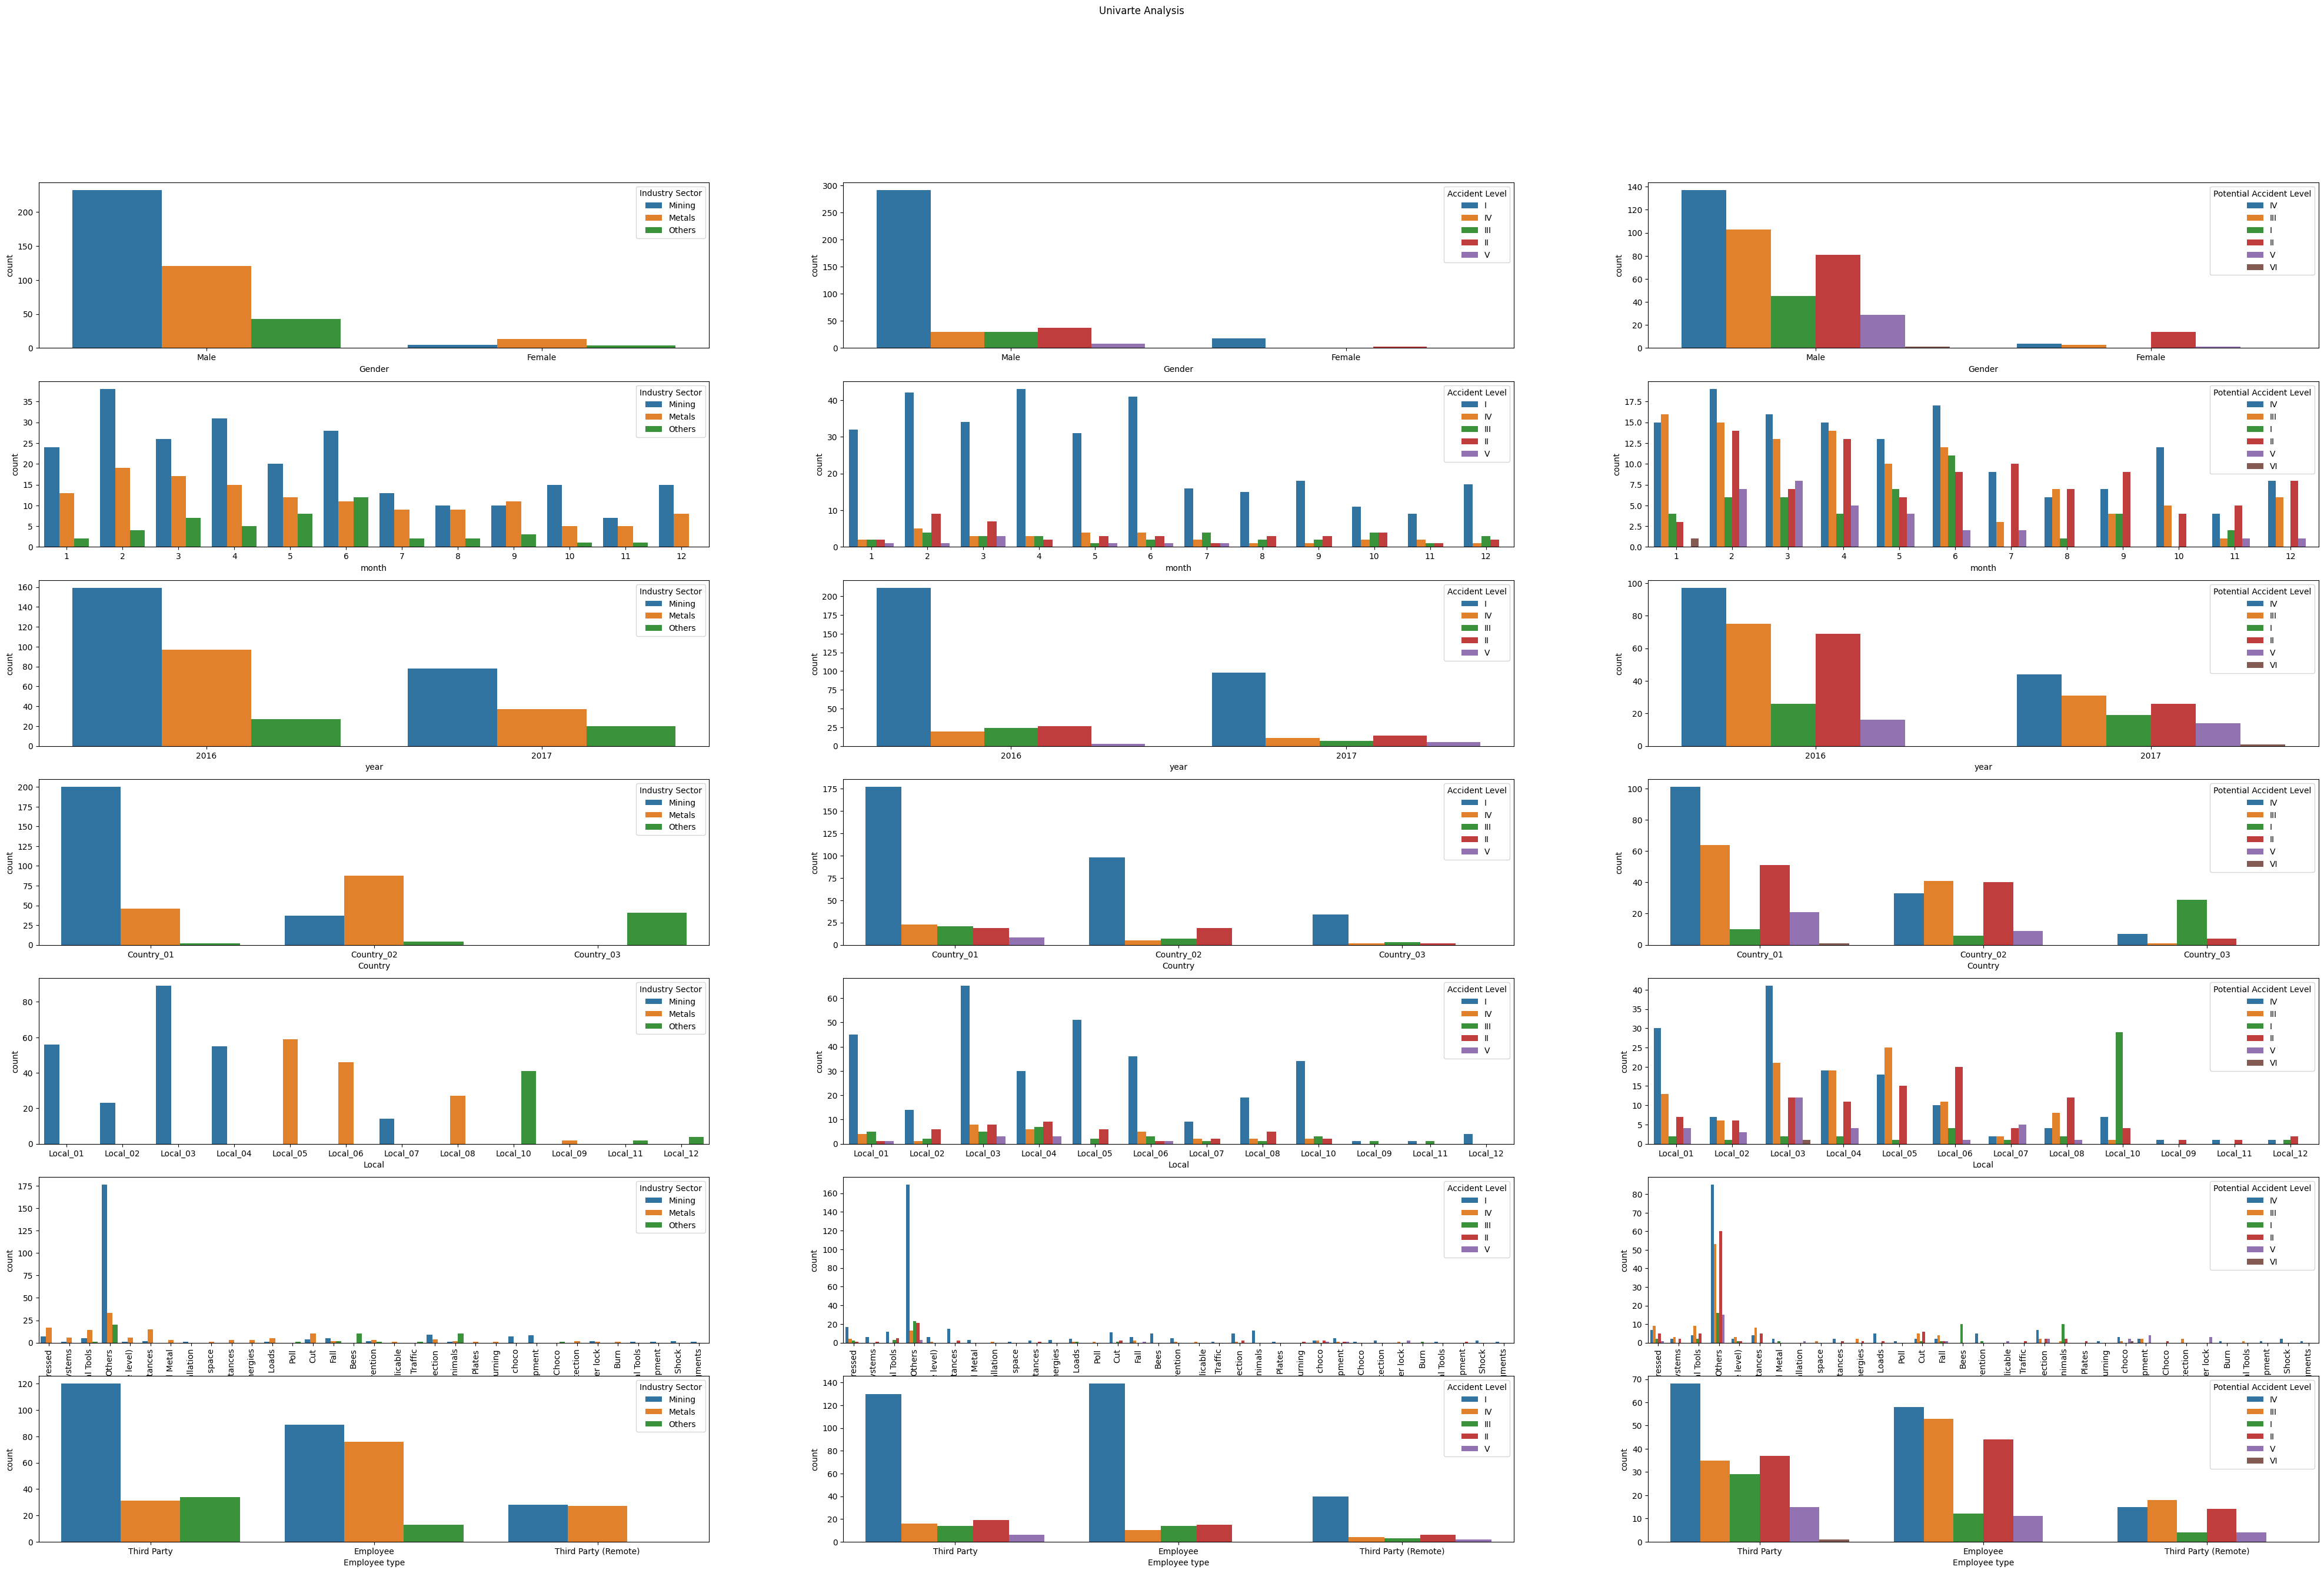

In [7]:
fig,axes = plt.subplots(7,3,figsize=(50,30))
fig.suptitle('Univarte Analysis')
axes[5][0].tick_params(axis='x', rotation=90)
axes[5][1].tick_params(axis='x', rotation=90)
axes[5][2].tick_params(axis='x', rotation=90)
sns.countplot(ax=axes[0,0], data=data, x='Gender', hue='Industry Sector');
sns.countplot(ax=axes[0,1], data=data, x='Gender', hue='Accident Level');
sns.countplot(ax=axes[0,2], data=data, x='Gender', hue='Potential Accident Level');
sns.countplot(ax=axes[1,0], data=data, x='month', hue='Industry Sector');
sns.countplot(ax=axes[1,1], data=data, x='month', hue='Accident Level');
sns.countplot(ax=axes[1,2], data=data, x='month', hue='Potential Accident Level');
sns.countplot(ax=axes[2,0], data=data, x='year', hue='Industry Sector');
sns.countplot(ax=axes[2,1], data=data, x='year', hue='Accident Level');
sns.countplot(ax=axes[2,2], data=data, x='year', hue='Potential Accident Level');
sns.countplot(ax=axes[3,0], data=data, x='Country', hue='Industry Sector');
sns.countplot(ax=axes[3,1], data=data, x='Country', hue='Accident Level');
sns.countplot(ax=axes[3,2], data=data, x='Country', hue='Potential Accident Level');
sns.countplot(ax=axes[4,0], data=data, x='Local', hue='Industry Sector');
sns.countplot(ax=axes[4,1], data=data, x='Local', hue='Accident Level');
sns.countplot(ax=axes[4,2], data=data, x='Local', hue='Potential Accident Level');
sns.countplot(ax=axes[5,0], data=data, x='Critical Risk', hue='Industry Sector');
sns.countplot(ax=axes[5,1], data=data, x='Critical Risk', hue='Accident Level');
sns.countplot(ax=axes[5,2], data=data, x='Critical Risk', hue='Potential Accident Level');
sns.countplot(ax=axes[6,0], data=data, x='Employee type', hue='Industry Sector');
sns.countplot(ax=axes[6,1], data=data, x='Employee type', hue='Accident Level');
sns.countplot(ax=axes[6,2], data=data, x='Employee type', hue='Potential Accident Level');
plt.show();

# **Observations :**


*   Male employees are very high compared to Female employees in other industry sector
*   Most of male employees has faced Level 1 accidenT
*   All level of accidents are facing by most of male employee
*   Number of accidents are registered in 2016 than 2017
*   Number of accidents are registered in first half yearly of the year
*   Number of accidents are registered in country_1 than other regions
*   Number of accidents are registered in OTHERS critical risk category
*   Number of potential accidents are registered in OTHERS critical risk category
*   Number of accidents are registered in Employee or Third Party categor
*   Number of potential accidents are registered in Employee or Third Party category
*   74% of accidents are captured in Low accidents level
*   34% of potential accidents is captured in high medium potential accident level
*   25% of potential accidents is captured in medium potential accident le
*   23% of potential accidents is captured in low potential accident lev
*   Data is imbalanced and use SMOTE or Oversampling to balance the data







Accident Level: 
 I      0.739234
II     0.095694
III    0.074163
IV     0.071770
V      0.019139
Name: Accident Level, dtype: float64
Potential Accident Level: 
 IV     0.337321
III    0.253589
II     0.227273
I      0.107656
V      0.071770
VI     0.002392
Name: Potential Accident Level, dtype: float64


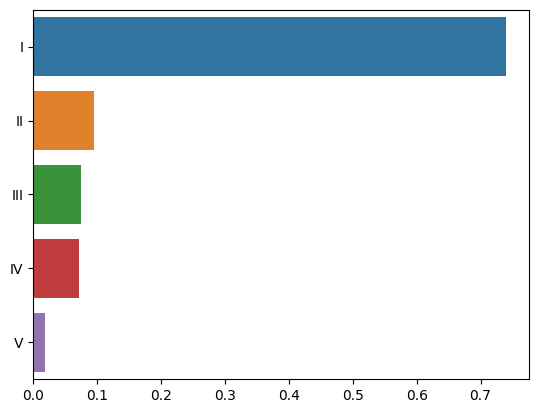

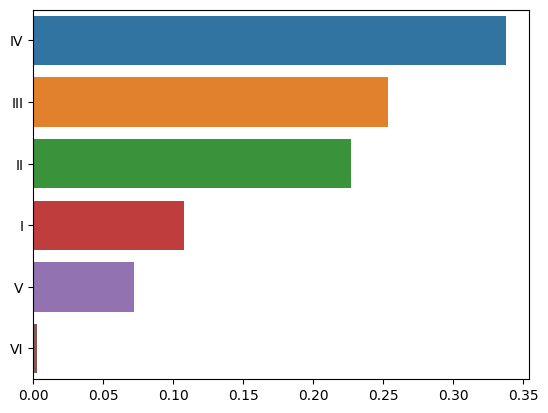

In [ ]:
acc_level =  data['Accident Level'].value_counts(normalize=True)
print("Accident Level: \n",acc_level)
pot_acc_level =  data['Potential Accident Level'].value_counts(normalize=True)
print("Potential Accident Level: \n",pot_acc_level)

sns.barplot(x=acc_level.values, y=acc_level.index)
plt.show()

sns.barplot(x=pot_acc_level.values, y=pot_acc_level.index)
plt.show()

# ***Univariate Analysis***

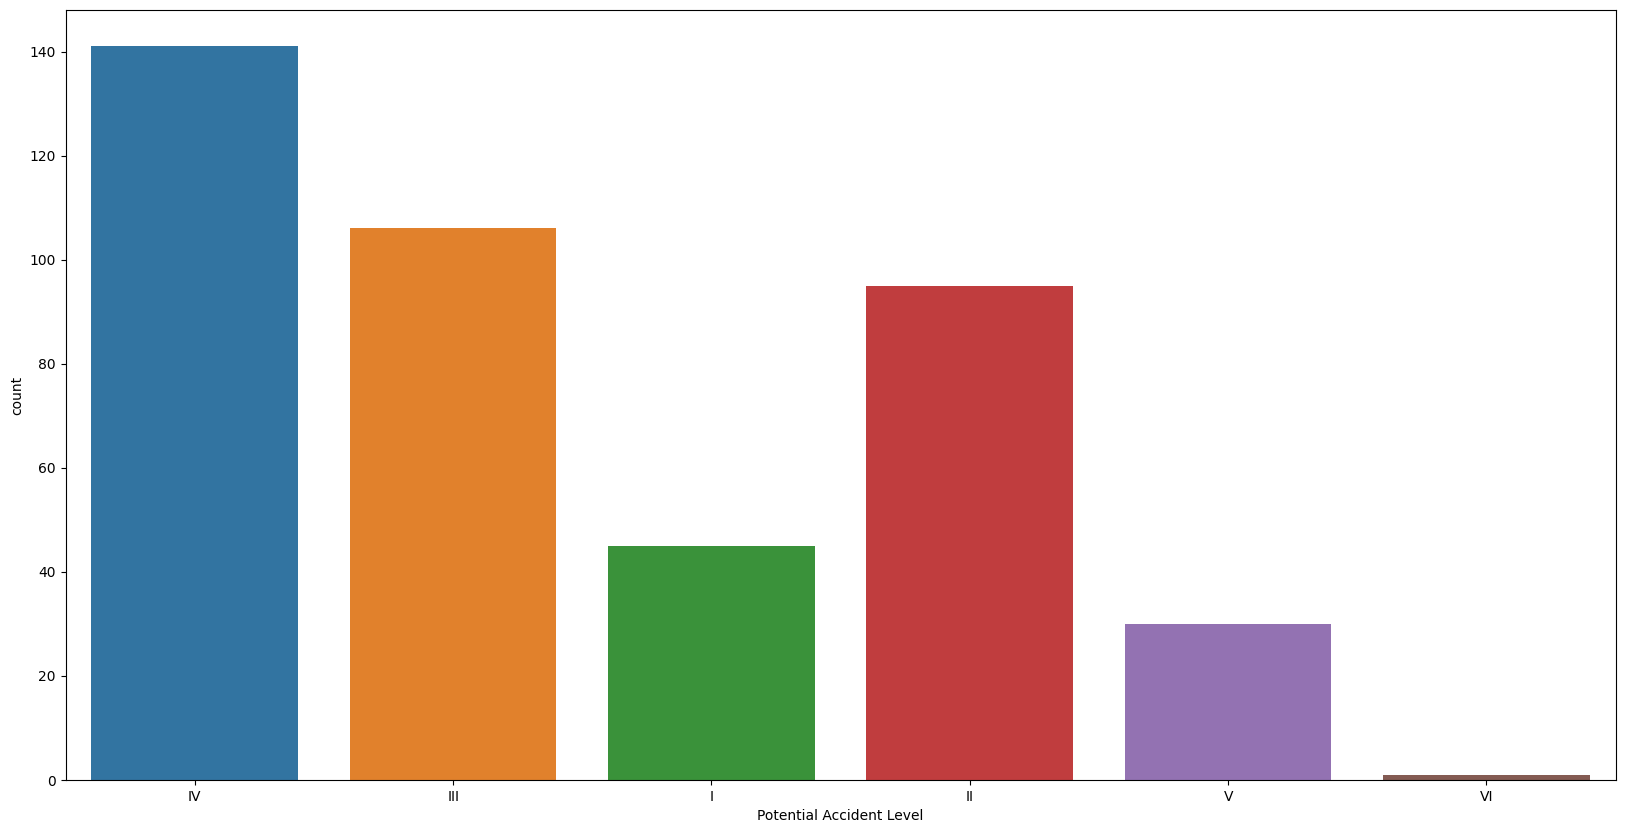

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=data, x='Potential Accident Level', ax=ax);

* The dataset provided is imbalanced.
* Potential Accident Level IV has highest number of records ie 138.
* Potential Accident Level III has second highest number of records ie 106.
* Potential Accident Level II has third highest number of records ie 95.
* Potential Accident Level VI has lowest number of records ie 1.

In [ ]:
data['Industry Sector'].value_counts()

Mining    237
Metals    134
Others     47
Name: Industry Sector, dtype: int64

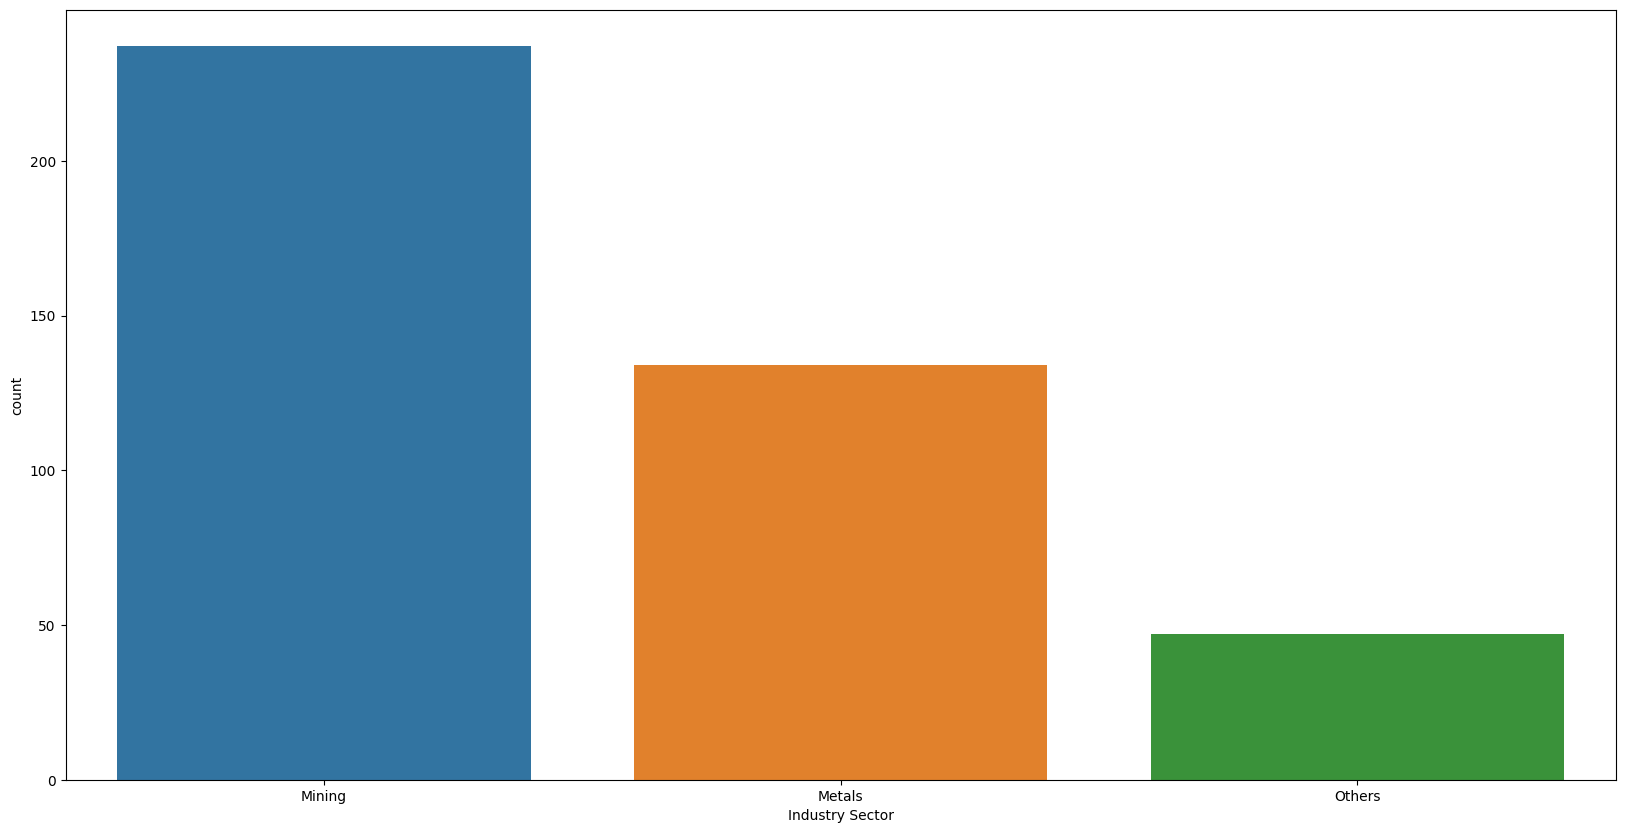

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=data, x='Industry Sector', ax=ax);


* In dataset, Mining is the largest industry sector.

In [ ]:
data['Gender'].value_counts()

Male      396
Female     22
Name: Gender, dtype: int64

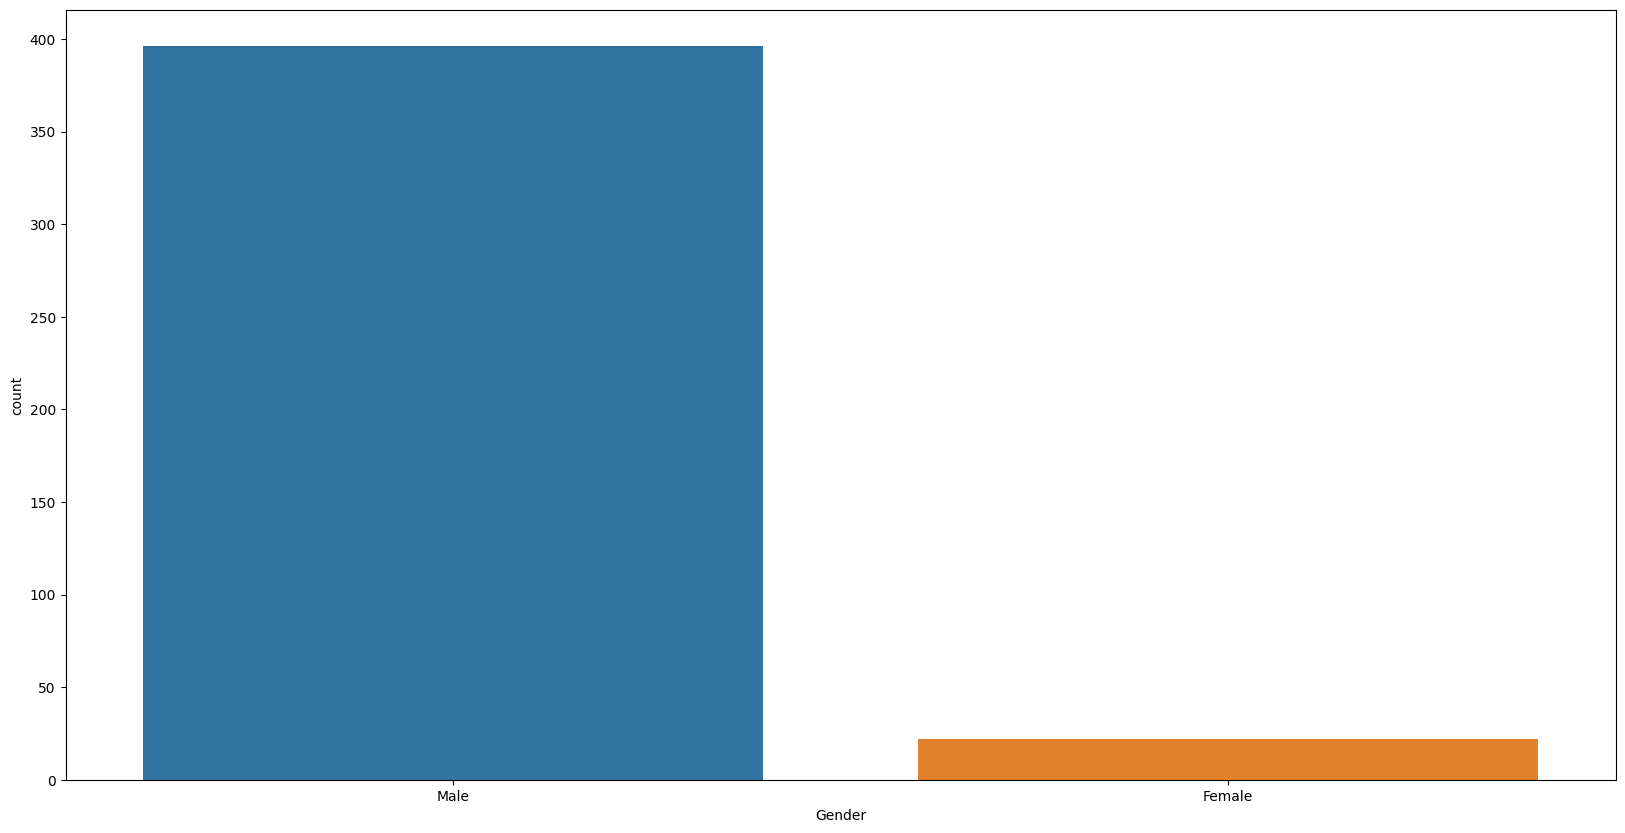

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=data, x='Gender', ax=ax);

* There are 2 categories - Male & Female.
* In dataset, Male population is higher than Females.
* Male population is 390.
* Female population is 21.

In [ ]:
data['Employee type'].value_counts()

Third Party             185
Employee                178
Third Party (Remote)     55
Name: Employee type, dtype: int64

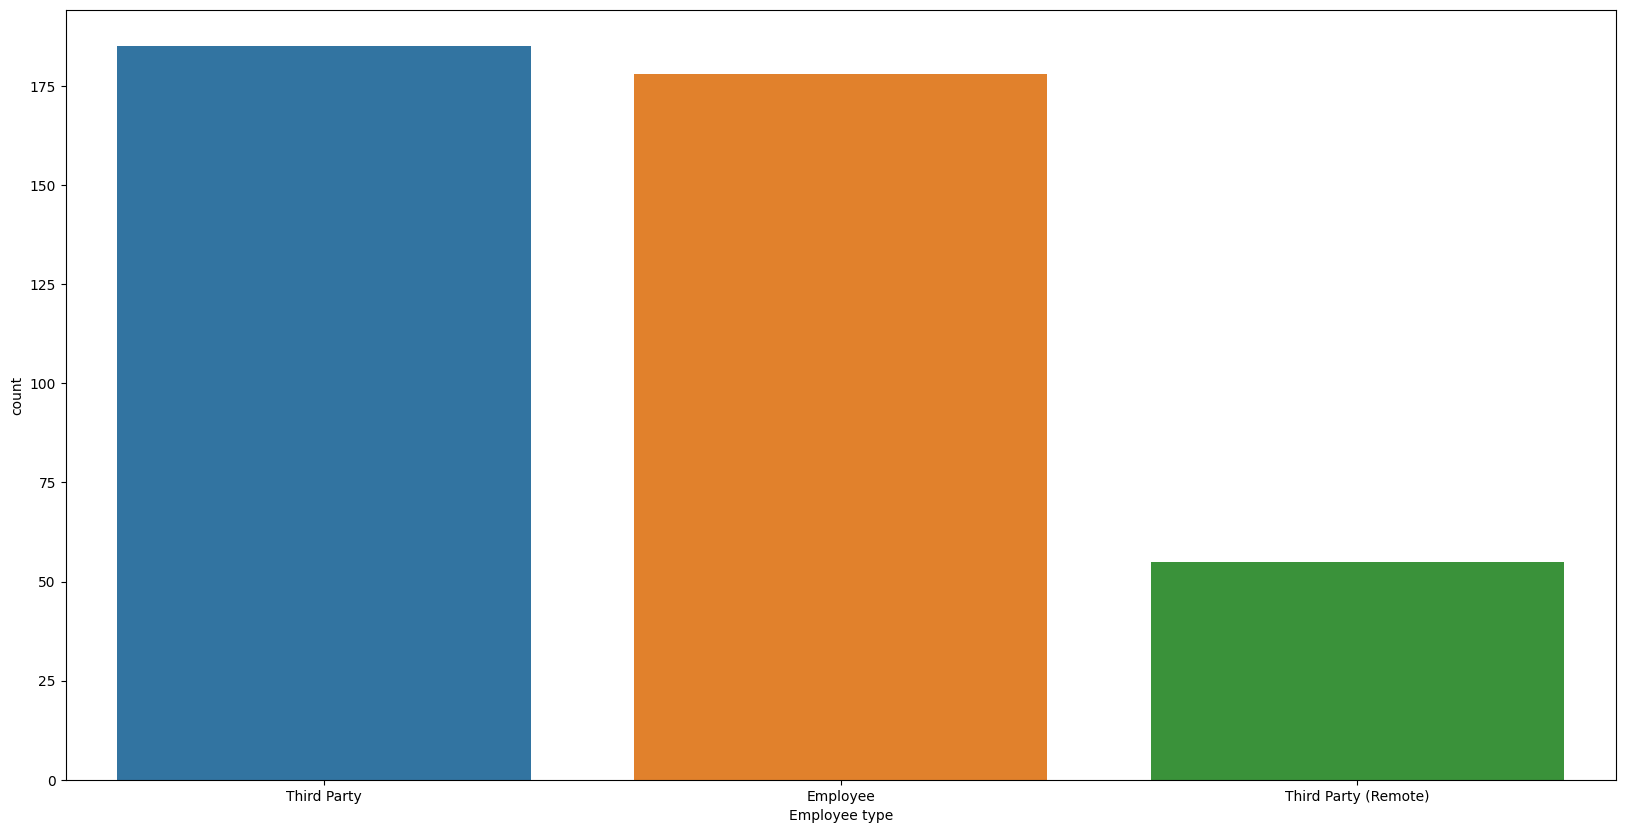

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=data, x='Employee type', ax=ax);

In [ ]:
data['Country'].value_counts()

Country_01    248
Country_02    129
Country_03     41
Name: Country, dtype: int64

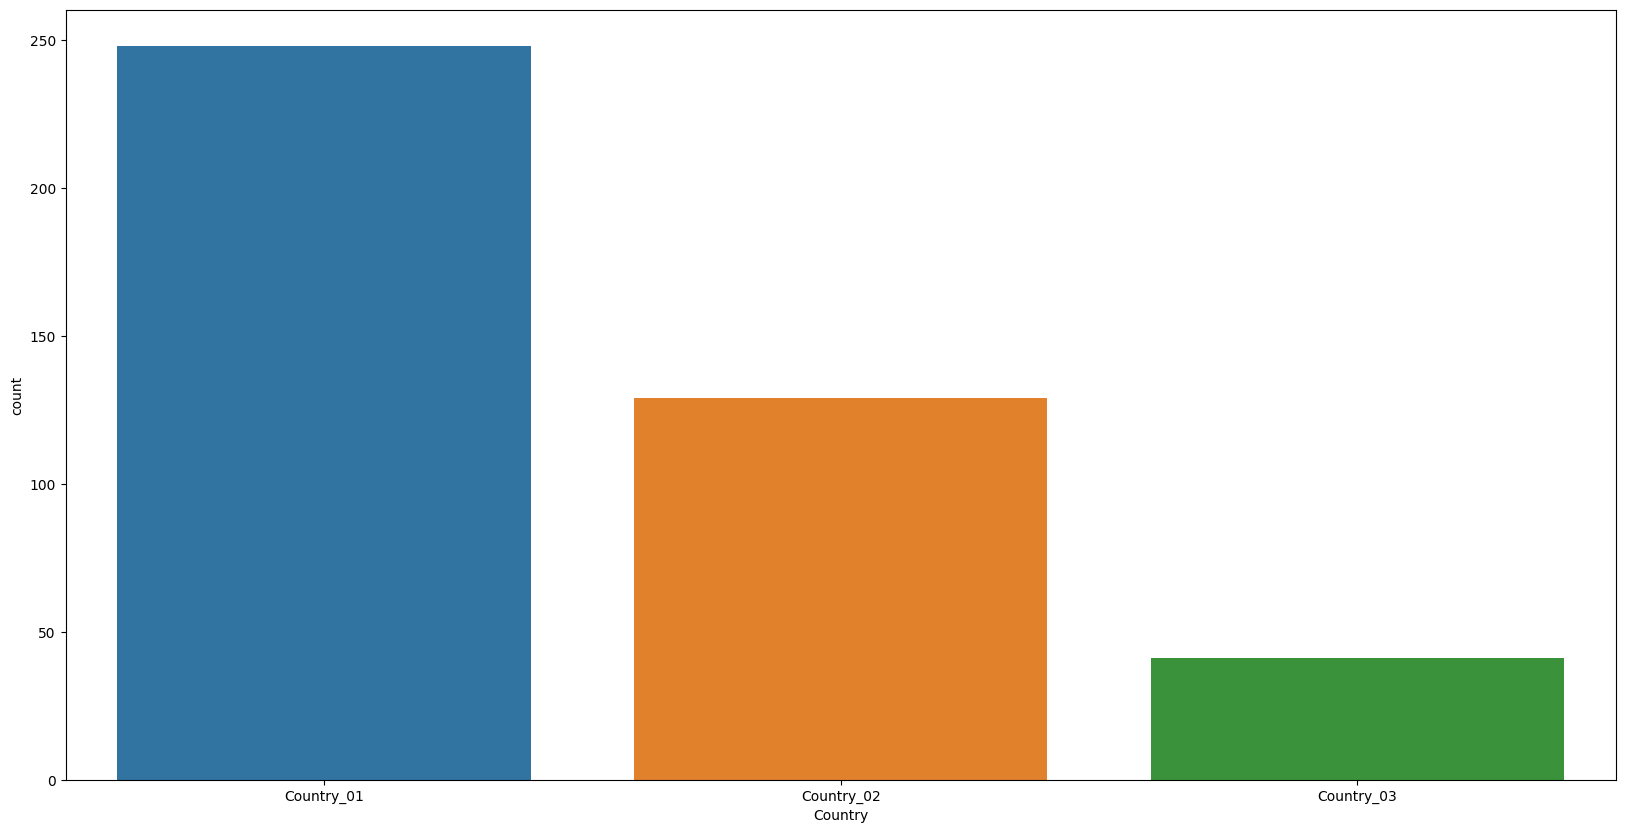

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=data, x='Country', ax=ax);

* Under Employee or Third Party column there are 3 categories -
  Third Party, Employee & Third Party (Remote).
* Third Party category is highest - 180.
* Employee category is second highest - 176.
* Third Party (Remote) category is third highest - 55.
* Country-01 is the maximum value.

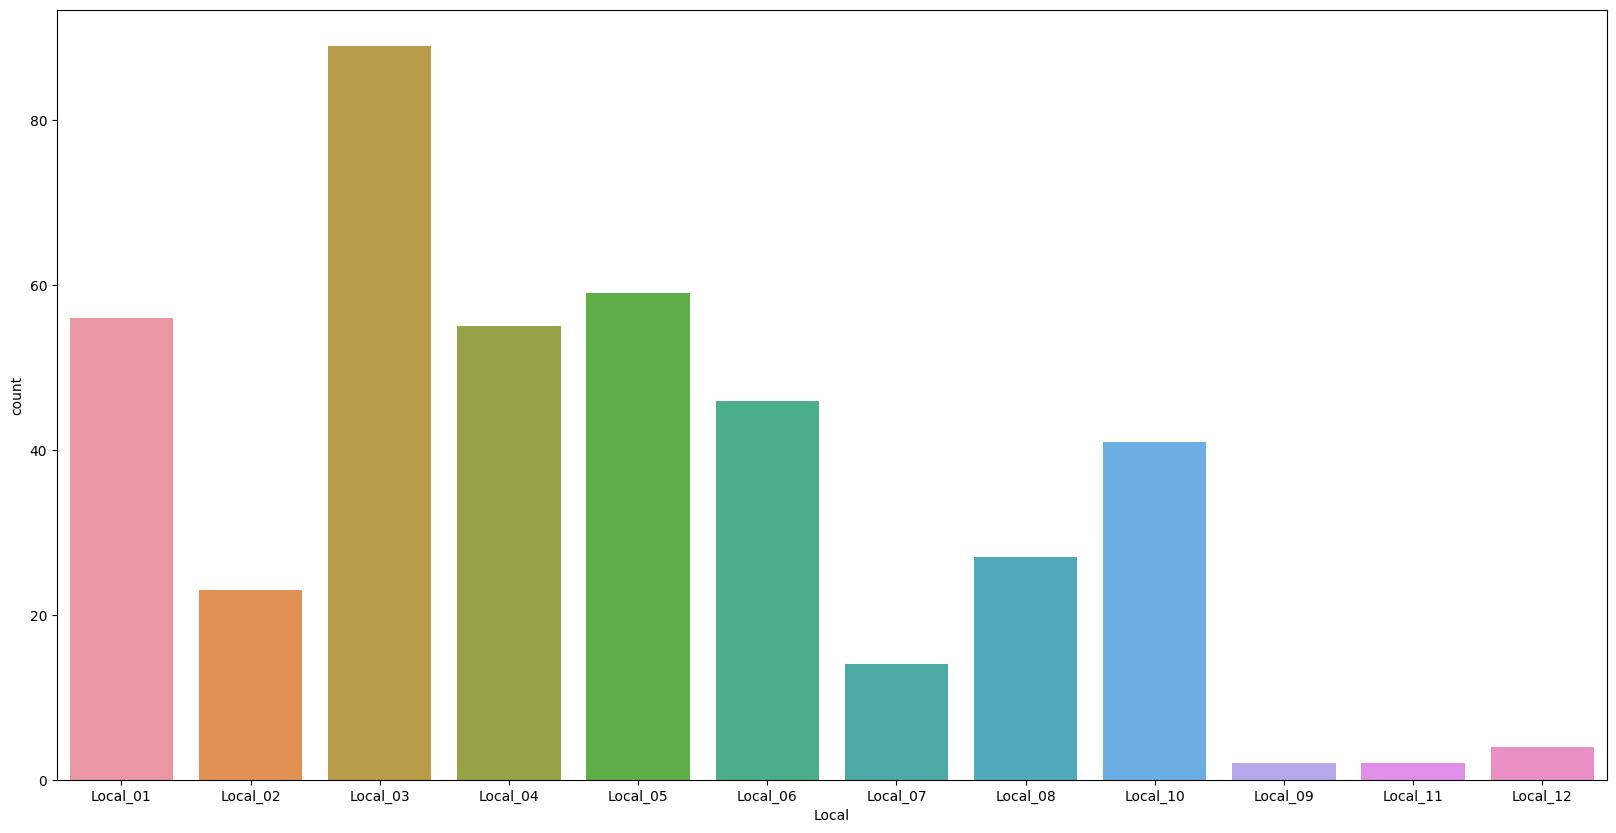

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=data, x='Local', ax=ax);

* Local_03 has recorded maximum number of accidents.
* This is followed by Local-05, Local-01 and so on.

In [ ]:
data['Critical Risk'].value_counts()

Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Venomous Animals                              13
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Machine Protection                             2
Electrical Shock    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Pressed'),
  Text(1, 0, 'Pressurized Systems'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Fall prevention (same level)'),
  Text(5, 0, 'Chemical substances'),
  Text(6, 0, 'Liquid Metal'),
  Text(7, 0, 'Electrical installation'),
  Text(8, 0, 'Confined space'),
  Text(9, 0, 'Pressurized Systems / Chemical Substances'),
  Text(10, 0, 'Blocking and isolation of energies'),
  Text(11, 0, 'Suspended Loads'),
  Text(12, 0, 'Poll'),
  Text(13, 0, 'Cut'),
  Text(14, 0, 'Fall'),
  Text(15, 0, 'Bees'),
  Text(16, 0, 'Fall prevention'),
  Text(17, 0, '\nNot applicable'),
  Text(18, 0, 'Traffic'),
  Text(19, 0, 'Projection'),
  Text(20, 0, 'Venomous Animals'),
  Text(21, 0, 'Plates'),
  Text(22, 0, 'Projection/Burning'),
  Text(23, 0, 'remains of choco'),
  Text(24, 0, 'Vehicles and Mobile Equipment'),
  Text(

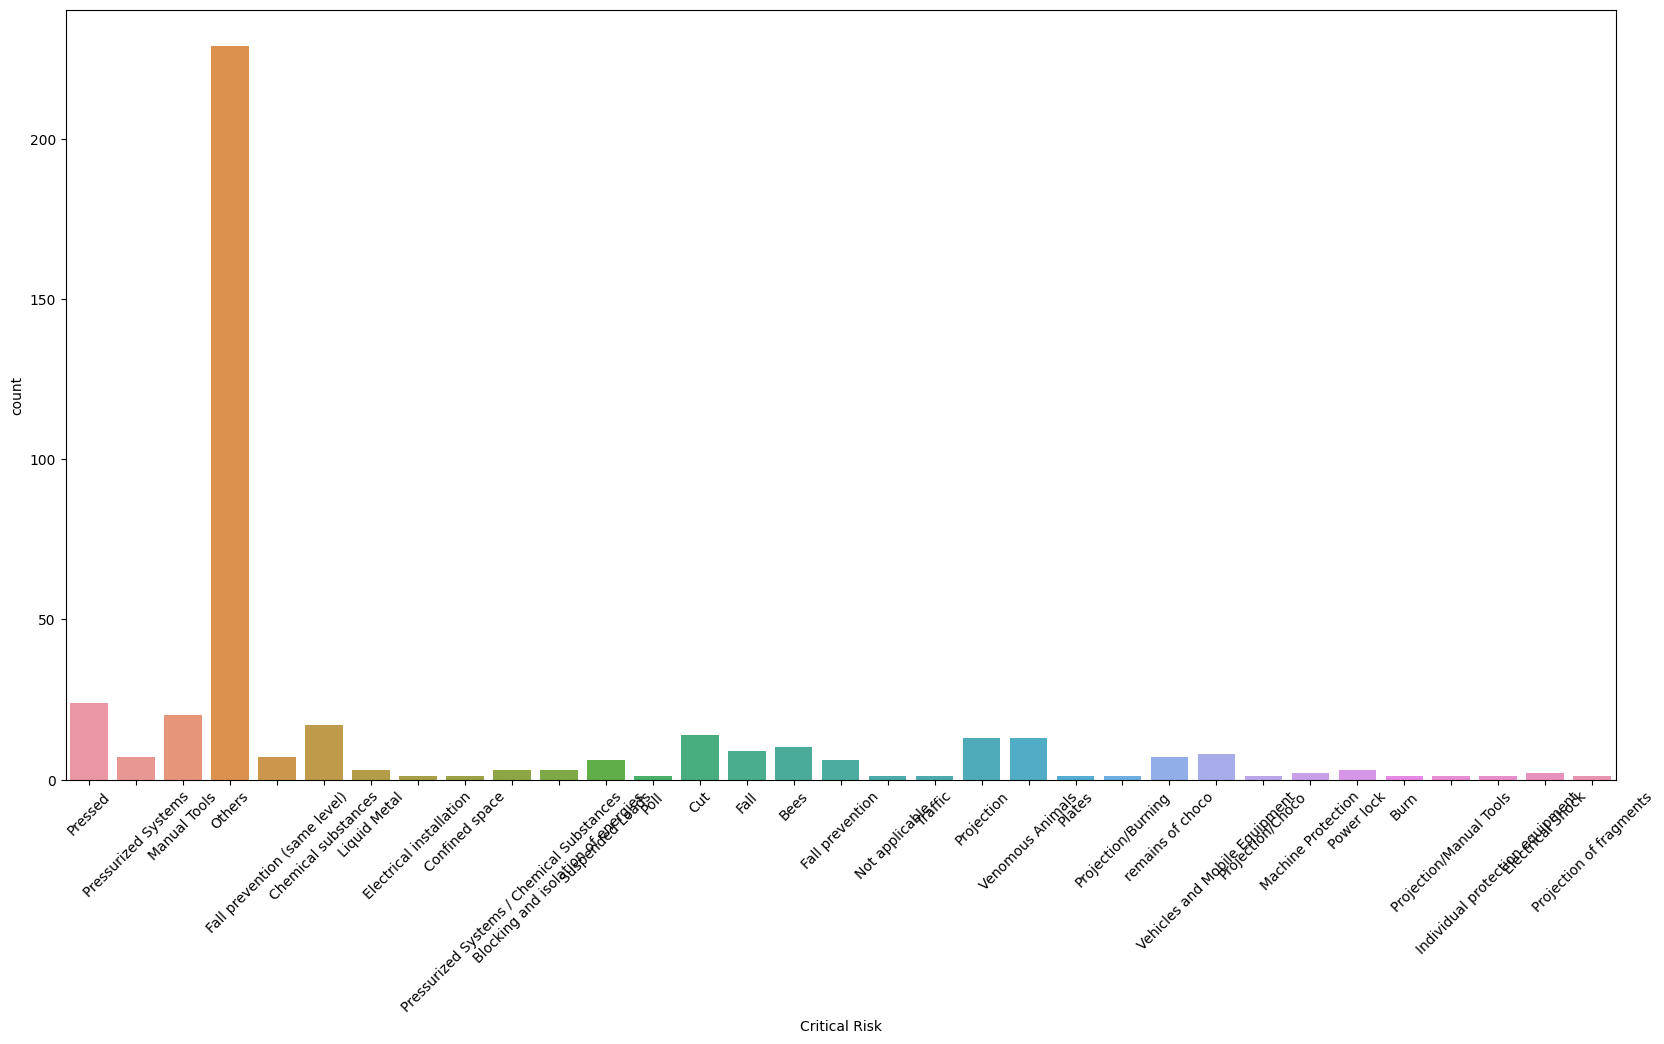

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=data, x='Critical Risk', ax=ax);
plt.xticks(rotation=45)

Under Critical Risk column there are 33 categories -
* Pressed.
* Manual Tools
* Chemical substances
* Venomous Animals
* Cut
* Projection
* Bees
* Fall
* Vehicles and Mobile Equipment
* Fall prevention (same level)
* remains of choco
* Pressurized Systems
* Fall prevention
* Suspended Loads
* Blocking and isolation of energies
* Pressurized Systems / Chemical Substances
* Power lock
* Liquid Metal, Projection of fragments
* Machine Protection
* Electrical Shock
* Individual protection equipment
* Projection/Manual Tools
* Burn
* Poll
* Projection/Choco
* Projection/Burning
* Plates
* Confined space
* Traffic
* Not applicable
* Electrical installation
* Others
*  In dataset, Others category is highest - 223.
* Pressed is second highest - 24.
* Manual Tools category is third highest - 20.

# ***Bivariate Analysis***

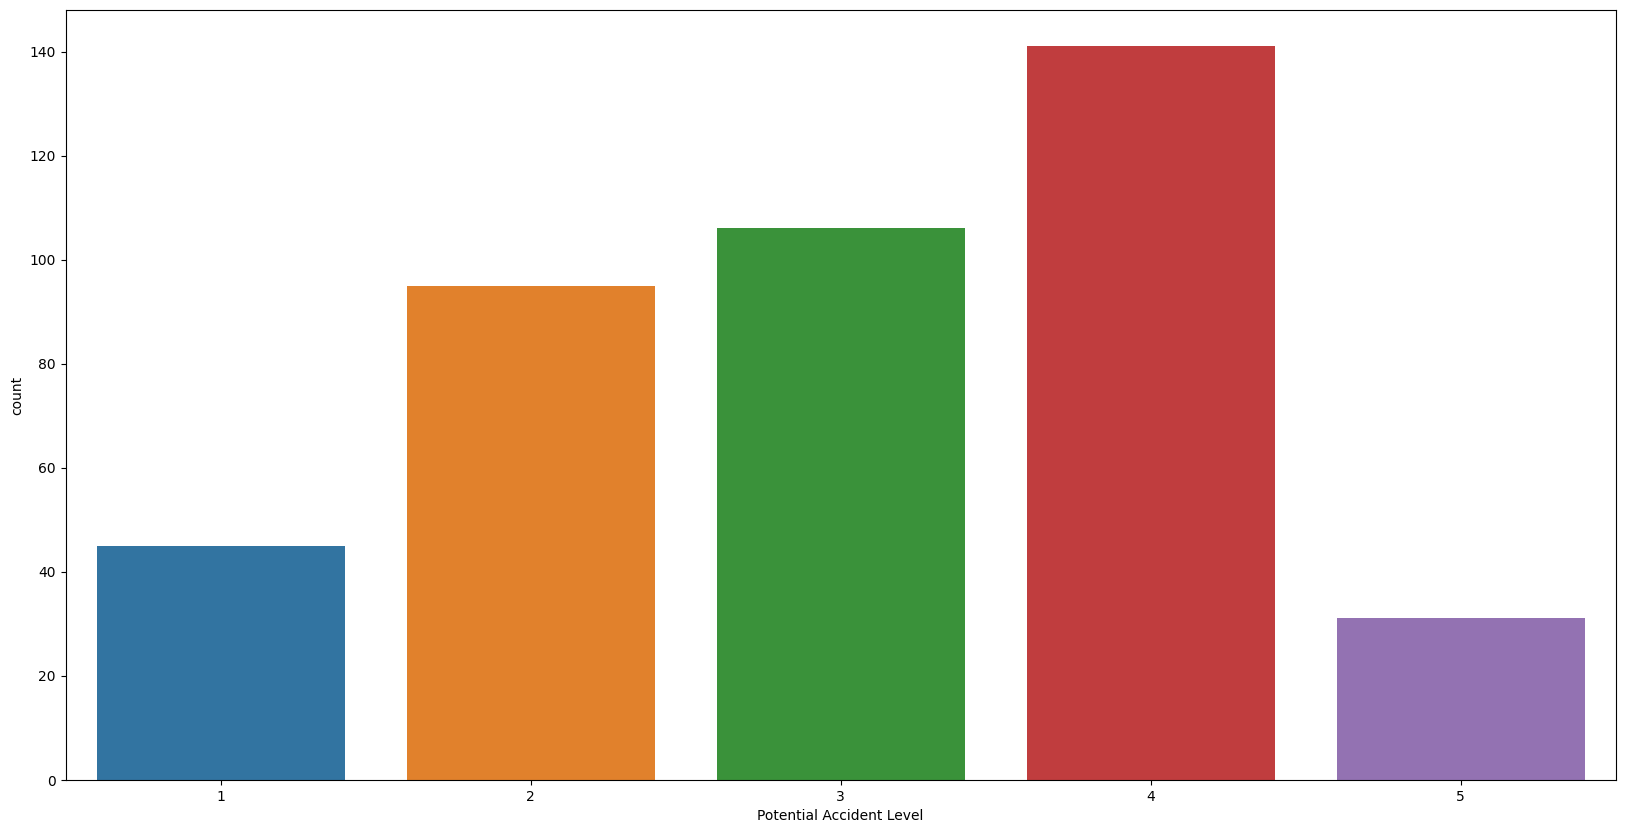

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=data, x='Potential Accident Level', ax=ax);

* Level VI has only 1 record in dataset hence shifted.
* Number of records for rest of the levels remains same.

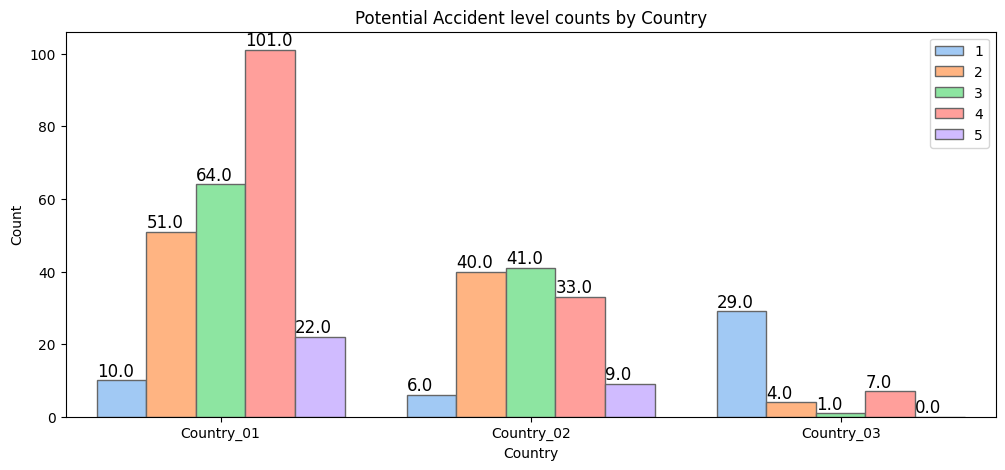

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(x='Country', hue='Potential Accident Level', data=data, hue_order=data['Potential Accident Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

total = sum(data['Country'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext=(0, 3),
                 textcoords='offset points')

plt.title('Potential Accident level counts by Country')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

* Country_01 has more number of severe accidents especially Level IV
* Country_02 has moderate accidents across all the levels
* Country_03 'level I' accidents counts is more compared to country_01 and country_02 but less severe accidents.

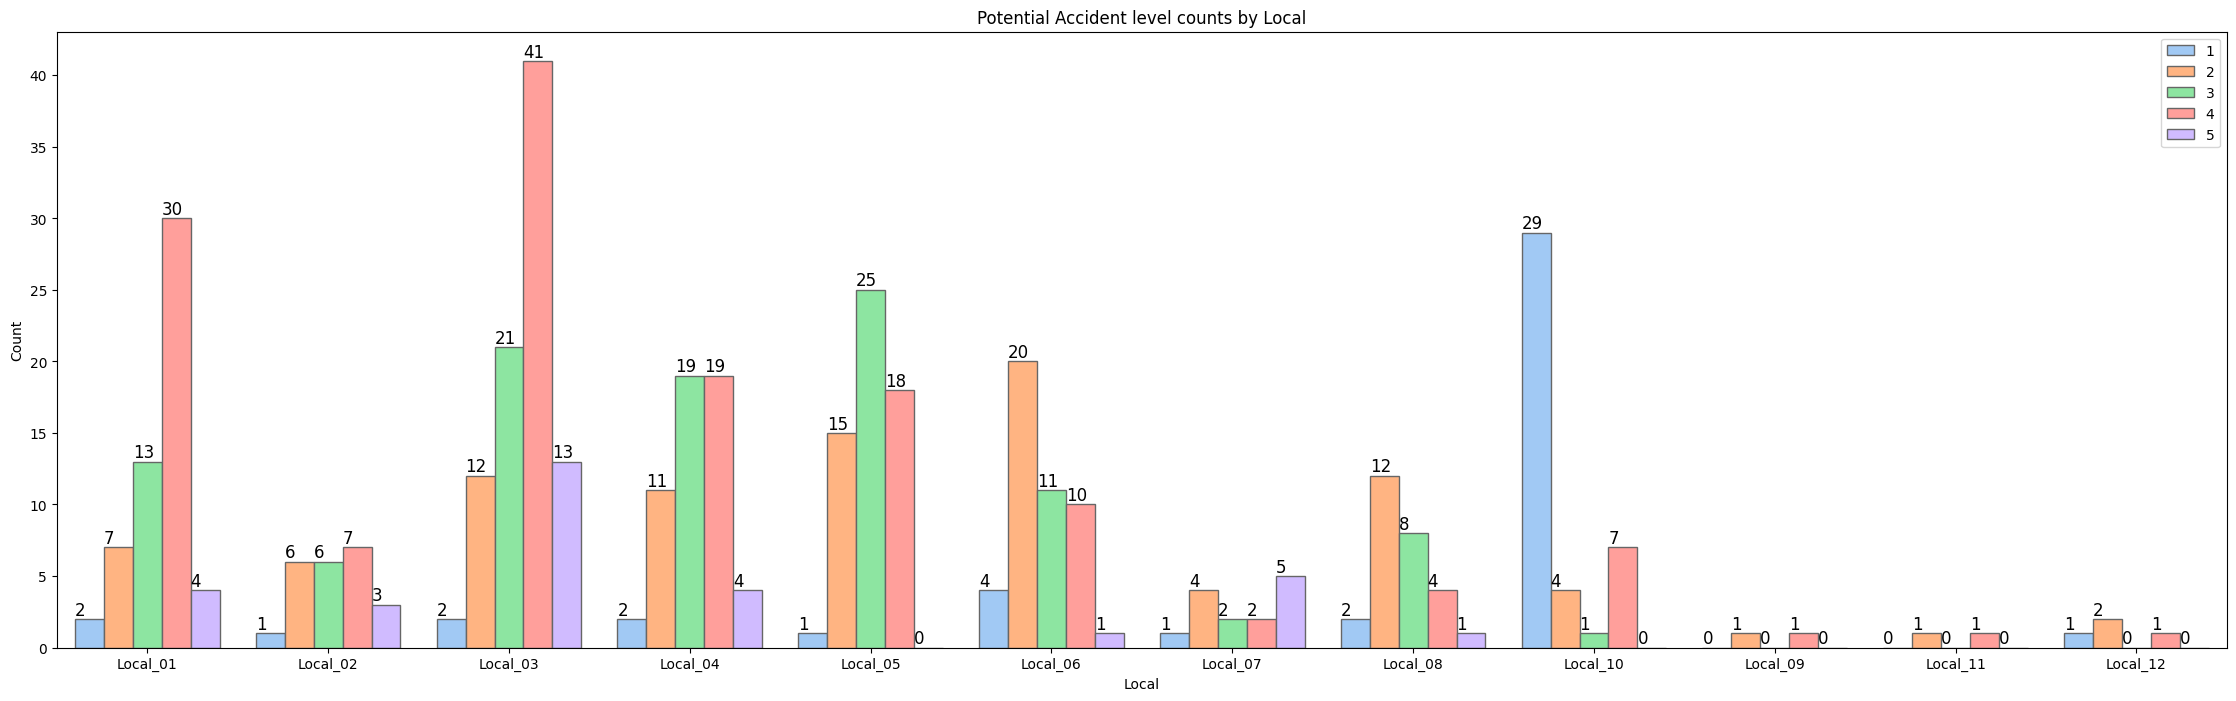

In [ ]:
plt.figure(figsize=(28,8))
ax = sns.countplot(x=data['Local'], hue=data['Potential Accident Level'], hue_order=data['Potential Accident Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

total = sum(data['Local'].value_counts())
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3),
                 textcoords = 'offset points')

plt.title('Potential Accident level counts by Local');
plt.ylabel('Count');
plt.legend(loc='upper right')

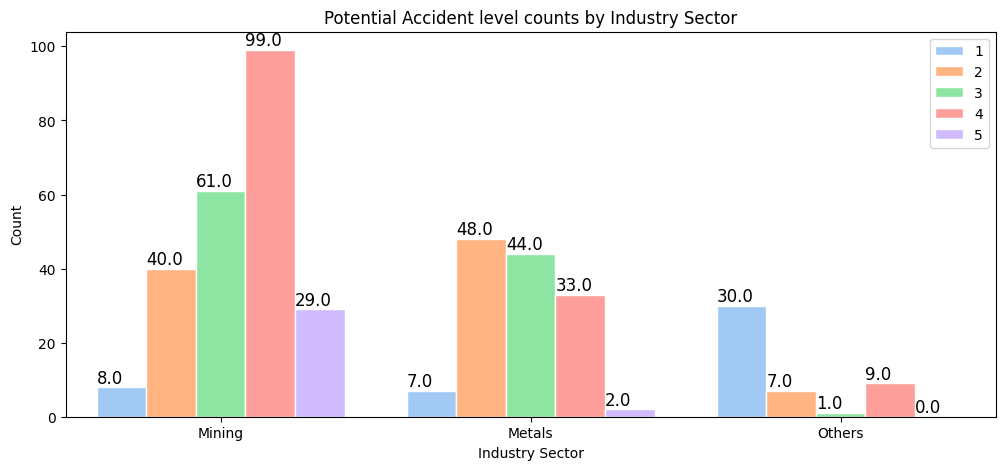

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x=data['Industry Sector'], hue=data['Potential Accident Level'], hue_order=data['Potential Accident Level'].value_counts().sort_index().index,palette='pastel', edgecolor='1.0', saturation=1)

total = sum(data['Industry Sector'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3),
                 textcoords = 'offset points')

plt.title('Potential Accident level counts by Industry Sector');
plt.ylabel('Count');
plt.legend(loc='upper right')

* Out of all industries, Mining Industry has seen some accidents whose level is the most severe and the corresponding potential Accident level is also highest.
* This is followed by Metal industry and other.
* Severity levels of the incidents are more in Mining sector.

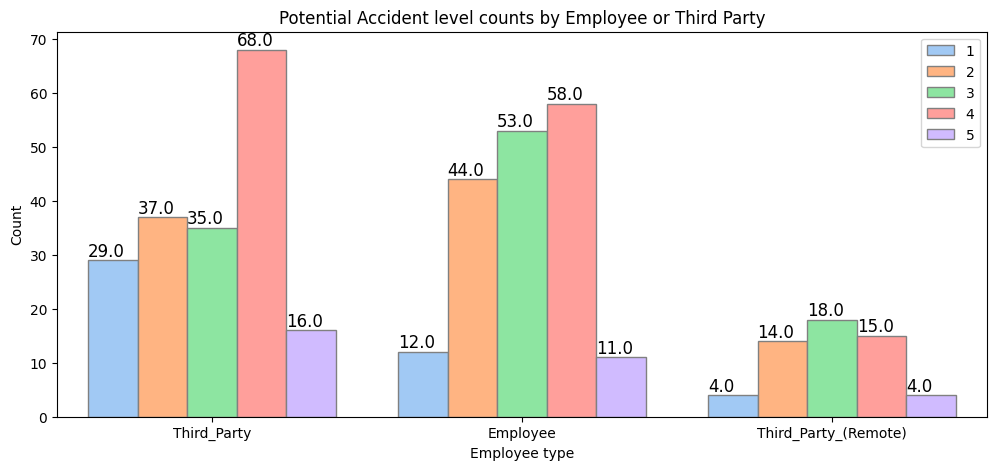

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x=data['Employee type'], hue=data['Potential Accident Level'], hue_order=data['Potential Accident Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.5', saturation=1);

total = sum(data['Employee type'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3),
                 textcoords = 'offset points')

plt.title('Potential Accident level counts by Employee or Third Party');
plt.ylabel('Count');
plt.legend(loc='upper right')

* Third Party Employees are more involved in Accidents
* We can observe that apart from Accident_Level_1 the people are also facing severe accidents (Accident_Level_IV) in the industry.

Local_03 (which also belongs to Country_01) is where most of the accidents happen

# ***Text preprocessing***


*   Eliminate All special Characters and Numbers
*   Lowercase all textual data
*   Remove all Stopwords
*   Remove all extra white spaces
*   Remove puncattions
*   Creating the cleaned text



In [4]:
#A. Eliminate All special Characters and Numbers
#B. Lowercase all textual data
#C. Remove all Stopwords
#D. Remove all extra white spaces
#F. Remove puncattions
# Creating the cleaned text
data['cleaned_text'] = ''
en = spacy.load('en_core_web_sm')
all_stopwords = en.Defaults.stop_words

def clean_txt(df):
    # removing the special characetrs, numbers from the data
    data = re.sub('[^a-zA-Z]', ' ', df)
    data = data.lower()
    data_tokens = word_tokenize(data)
    data = [word for word in data_tokens if word not in all_stopwords]
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for ele in data:
        if ele in punc:
            data.replace(ele, "")
    data = set(data)
    data = ' '.join(data)
    data = data.strip()
    return data

data["Description"] = data["Description"].astype(str)
data['cleaned_text'] = data['Description'].apply(clean_txt)

# **Apply Lemmatization on description attribute**

In [5]:
#Lemmatation:
def lemmatize(df):
  wnl = WordNetLemmatizer()
  str_words = str(df)
  example_words = str_words.split(" ")
  final = []
  for word in example_words:
    final.append((wnl.lemmatize(word, pos="v")))
  return (' '.join(final))

data["cleaned_text"] = data["cleaned_text"].astype(str)
data['lemm_text'] = data['cleaned_text'].apply(lemmatize)

#Removing multiple spaces between words
data['lemm_text'] = data['lemm_text'].apply(lambda x: re.sub(' +', ' ', x))

In [6]:
print('--'*45); print('Get the number of words, find the maximum number of words and print the maximum number of words');
print('Number of words ranges from 10 to 98.'); print('--'*45)

#Minimum and Maximum number of words
print("Minimum and Maximum number of words before NLP preprocessing:")
print('--'*45)
data['org_nb_words'] = data['Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(data['org_nb_words'].min()))
print('Maximum number of words: {}'.format(data['org_nb_words'].max()))
print('--'*25)
print('Line with maximum number of words:\n {}'.format(data[data['org_nb_words'] == data['org_nb_words'].max()]['Description'].values[0]))

#Minimum and Maximum number of words
print("\n\nMinimum and Maximum number of words after NLP preprocessing:")
print('--'*45)
data['nb_words'] = data['lemm_text'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(data['nb_words'].min()))
print('Maximum number of words: {}'.format(data['nb_words'].max()))
print('Line with maximum number of words:\n {}'.format(data[data['nb_words'] == data['nb_words'].max()]['lemm_text'].values[0]))

------------------------------------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Number of words ranges from 10 to 98.
------------------------------------------------------------------------------------------
Minimum and Maximum number of words before NLP preprocessing:
------------------------------------------------------------------------------------------
Minimum number of words: 16
Maximum number of words: 183
--------------------------------------------------
Line with maximum number of words:
 When performing the sleeve removal maneuver, when the hole was 600 meters deep, General da Silva pressed only one side of the locking nut of the rods, which together with the jack, holds the entire weight of the rods in the maneuver. As the locking procedure was not effective, the weight of the rods was only secured by the steel wire rope of the probe winch. At the moment that driller

# ***Word Count on original datasect***

There are 153160 words in the combination of all texts.


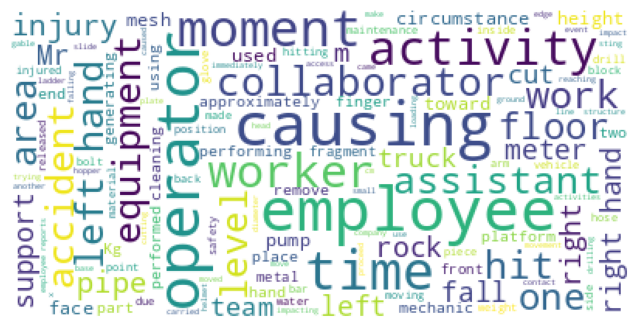

In [ ]:
all_texts = " ".join(texts for texts in data.Description)
print ("There are {} words in the combination of all texts.".format(len(all_texts)))
wordcloud = WordCloud(max_font_size = 40, max_words = 200, background_color="white").generate(all_texts)
plt.figure(figsize = (8,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# ***Word Count on Cleaned Text***

There are 85571 words in the combination of all texts.


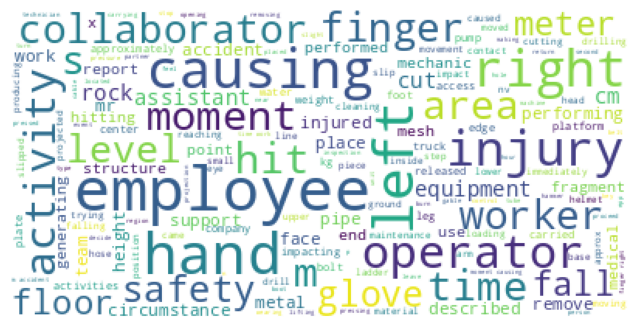

In [ ]:
clean_texts = " ".join(texts for texts in data.cleaned_text)
print ("There are {} words in the combination of all texts.".format(len(clean_texts)))
wordcloud1 = WordCloud(max_font_size = 40, max_words = 200, background_color="white").generate(clean_texts)
plt.figure(figsize = (8,16))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

# ***Word Count on Lemmatized Text***

There are 79916 words in the combination of all texts.


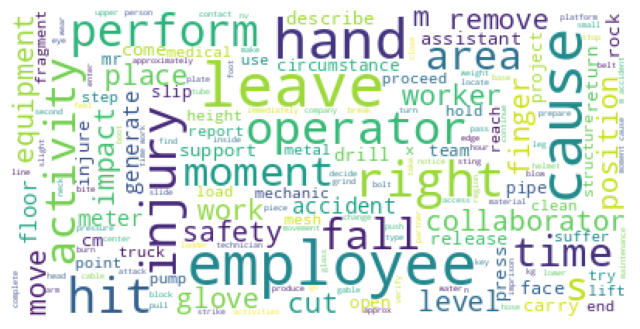

In [ ]:
lemm_texts = " ".join(texts for texts in data.lemm_text)
print ("There are {} words in the combination of all texts.".format(len(lemm_texts)))
wordcloud2 = WordCloud(max_font_size = 40, max_words = 200, background_color="white").generate(lemm_texts)
plt.figure(figsize = (8,16))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [7]:
data_original = data.copy()
print(data_original.head(2))

        Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   

  Potential Accident Level Gender Employee type        Critical Risk  \
0                       IV   Male   Third Party              Pressed   
1                       IV   Male      Employee  Pressurized Systems   

                                         Description  year  month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   

                                        cleaned_text  \
0  centralizer equipment seeing fingers intermedi...   
1  pump hospital emergency piping sulphide later ...   

                                           lemm_text  org_nb_words  nb_words  
0  centralizer equipment see finger intermediate ...            80        29  
1  pump hospital emergenc

# ***List the number of accident categories and occurence***

In [8]:
print(data_original['Accident Level'].value_counts())
print(data_original['Potential Accident Level'].value_counts())

I      309
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64
IV     141
III    106
II      95
I       45
V       30
VI       1
Name: Potential Accident Level, dtype: int64


# ***Transform data by removing or replacing relevant information***


*   Remove punctations and add connector strings
*   Convert text data into numerical data using one hot encoding, adding dummy
*   Append numberical data to original dataset
*   Merge level 6 to Level 5 in potential accident level


In [9]:
data = data_original

# To replace white space everywhere in Employee type
data['Employee type'] = data['Employee type'].str.replace(' ', '_')

# To replace white space everywhere inCritical Risk
data['Critical Risk'] = data['Critical Risk'].str.replace('/', '')
data['Critical Risk'] = data['Critical Risk'].str.replace(' ', '_')
data['Critical Risk'] = data['Critical Risk'].str.replace('(', '')
data['Critical Risk'] = data['Critical Risk'].str.replace(')', '')
data['Critical Risk'] = data['Critical Risk'].str.replace('\n', '')

# Dummy variables encoding
Country_dummies = pd.get_dummies(data['Country'], prefix='Country')
Local_dummies = pd.get_dummies(data['Local'], prefix='Local')
Gender_dummies = pd.get_dummies(data['Gender'], prefix='Gender')
IS_dummies = pd.get_dummies(data['Industry Sector'], prefix='IS')
EmpType_dummies = pd.get_dummies(data['Employee type'], prefix='EmpType')
CR_dummies = pd.get_dummies(data['Critical Risk'], prefix='CR')

# Merge the above dataframe with the original dataframe ind_feat_df
data = data.join(Country_dummies).join(Local_dummies).join(Gender_dummies).join(IS_dummies).join(EmpType_dummies).join(CR_dummies)
data['Accident Level'] = data['Accident Level'].map({'I':1, 'II':2, 'III':3, 'IV':4, 'V':5})
data['Potential Accident Level'] = data['Potential Accident Level'].map({'I':1, 'II':2, 'III':3, 'IV':4, 'V':5, 'VI':5})

print(data['Accident Level'].value_counts())
print(data['Potential Accident Level'].value_counts())

1    309
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64
4    141
3    106
2     95
1     45
5     31
Name: Potential Accident Level, dtype: int64


In [10]:
data.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,...,CR_Projection,CR_ProjectionBurning,CR_ProjectionChoco,CR_ProjectionManual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco
0,2016-01-01,Country_01,Local_01,Mining,1,4,Male,Third_Party,Pressed,While removing the drill rod of the Jumbo 08 f...,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized_Systems,During the activation of a sodium sulphide pum...,...,0,0,0,0,0,0,0,0,0,0


# ***Apply below vectorization to description attribute***

*   Bag of Words - Count Vectorization
*   TD - IDF
*   Word2Vec
*   Glove



In [ ]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split
X = data['lemm_text']
print(X.shape)

# ***TD IDF and Count Vectorization Applied***

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#Vectorization using different methods
#TDIDF Vectorization
############################################
#Generate TD IDF vectorization and append existing dataframe
X_tfidf = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=300, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X_data = vec_tfidf.fit_transform(data['lemm_text']).toarray()
    tfs = pd.DataFrame(X_data, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names_out()])
    X_tfidf = pd.concat([X_tfidf.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)
print(X_tfidf.shape)

#Bag of words Vectorization
############################################
#Generate Bag of words vectorization and append existing dataframe
X_countV = pd.DataFrame()
for i in [1,2,3]:
  countV = CountVectorizer(max_features=300, stop_words='english', lowercase=True, ngram_range=(i,i))
  X_data = countV.fit_transform(data['lemm_text']).toarray()
  count_vect_df = pd.DataFrame(X_data, columns=["CountV_" + n for n in countV.get_feature_names_out()] )
  X_countV = pd.concat([X_countV.reset_index(drop=True), count_vect_df.reset_index(drop=True)], axis=1)
print(X_countV.shape)

(418, 900)
(418, 900)


# ***Word2Vec applied***

In [ ]:
#Word2Vec
#word2Vec Vectorization
############################################
words_list =[]
for i in data['lemm_text']:
  li = str(i).split(" ")
  words_list.append(li)

# Model creation
model= Word2Vec(words_list, min_count = 10, workers = 4)
words = set(list(model.wv.key_to_index.keys()))
word2vec = {word:model.wv[word] for word in words}
vocab_size = len(set(list(model.wv.key_to_index.keys())))

# Let's see the vocab size
print("Length of the vocab is = ", len(list(word2vec)))

def average_word_vectors(words, model, vocabulary, num_features):
  feature_vector = np.zeros((num_features,), dtype="float64")
  nwords = 0.
  for word in words:
    if word in vocabulary:
      nwords = nwords + 1.
      feature_vector = np.add(feature_vector, model.wv[word])
  if nwords:
    feature_vector = np.divide(feature_vector, nwords)
  return feature_vector

def averaged_word_vectorizer(corpus, model, num_features):
  vocabulary = set(list(model.wv.key_to_index.keys()))
  features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
          for tokenized_sentence in corpus]
  return np.array(features)

feature_size = 100
# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus = words_list, model = model,num_features = feature_size)
X_w2v = pd.DataFrame(w2v_feature_array)
print(X_w2v.shape)

Length of the vocab is =  264
(418, 100)


# ***Glove vectorization applied***

In [ ]:
# This function creates a normalized vector for the whole sentence
def sent2vec(s):
  words = word_tokenize(s)
  N = []
  for w in words:
    try:
      N.append(embeddings_index[w])
    except:
      continue
  N = np.array(N)
  v = N.sum(axis=0)
  if type(v) != np.ndarray:
    return np.zeros(300)
  return v / np.sqrt((v ** 2).sum())

# Create sentence vectors using the above function for training and validation set
X_glove = [sent2vec(x) for x in tqdm(X)]
X_glove = pd.DataFrame(X_glove)

100%|██████████| 418/418 [00:00<00:00, 2990.91it/s]


# ***Remove textual data before appling SMOTE to balance the dataset***

In [ ]:
updated_data = data.copy()
updated_data.drop(
    ['Date','Country','Local','Gender','Industry Sector','Employee type','Critical Risk','Description','cleaned_text','lemm_text'
    ,'org_nb_words','nb_words'],
    axis = 1, inplace = True)
print(data.shape)
print(updated_data.shape)
print(updated_data.info())

(418, 73)
(418, 61)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Accident Level                               418 non-null    int64
 1   Potential Accident Level                     418 non-null    int64
 2   year                                         418 non-null    int64
 3   month                                        418 non-null    int64
 4   Day                                          418 non-null    int64
 5   Country_Country_01                           418 non-null    uint8
 6   Country_Country_02                           418 non-null    uint8
 7   Country_Country_03                           418 non-null    uint8
 8   Local_Local_01                               418 non-null    uint8
 9   Local_Local_02                               418 non-null    uint8
 10  Local_

In [ ]:
print(updated_data['Accident Level'].value_counts())
print(updated_data.shape)

1    309
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64
(418, 61)


# ***Export Vectorized dataframe of Description attribute to CSV file***

In [ ]:
X_tfidf.to_csv("/content/drive/MyDrive/GreatLearning/Capstone project/dataset/X_tfidf.csv")
X_countV.to_csv("/content/drive/MyDrive/GreatLearning/Capstone project/dataset/X_countV.csv")
X_w2v.to_csv("/content/drive/MyDrive/GreatLearning/Capstone project/dataset/X_w2v.csv")
X_glove.to_csv("/content/drive/MyDrive/GreatLearning/Capstone project/dataset/X_glove.csv")

# ***Append vectorization result to existing dataset***
# ***Save final dataset to CSV file***

In [ ]:
print(X_tfidf.shape)
print(X_countV.shape)
print(X_w2v.shape)
print(X_glove.shape)

new_X_tfidf = pd.concat([updated_data, X_tfidf], axis=1).reset_index(drop=True)
new_X_countV = pd.concat([updated_data, X_countV], axis=1).reset_index(drop=True)
new_X_w2v = pd.concat([updated_data, X_w2v], axis=1).reset_index(drop=True)
new_X_glove = pd.concat([updated_data, X_glove], axis=1).reset_index(drop=True)

print(new_X_tfidf.shape)
print(new_X_countV.shape)
print(new_X_w2v.shape)
print(new_X_glove.shape)

#Append the data and export cleansed data into CSV format
extract_data = pd.concat([data, X_tfidf], axis=1).reset_index(drop=True)
extract_data = pd.concat([extract_data, X_countV], axis=1).reset_index(drop=True)
extract_data = pd.concat([extract_data, X_w2v], axis=1).reset_index(drop=True)
extract_data = pd.concat([extract_data, X_glove], axis=1).reset_index(drop=True)

print(extract_data.shape)

extract_data.to_csv("/content/drive/MyDrive/GreatLearning/Capstone project/dataset/cleansed_data.csv")

(418, 900)
(418, 900)
(418, 100)
(418, 300)
(425, 961)
(425, 961)
(425, 161)
(425, 361)
(425, 2273)


In [ ]:
new_X_tfidf = new_X_tfidf.dropna()
new_X_countV = new_X_countV.dropna()
new_X_w2v = new_X_w2v.dropna()
new_X_glove = new_X_glove.dropna()

In [ ]:
print(new_X_tfidf.shape)
print(new_X_countV.shape)
print(new_X_w2v.shape)
print(new_X_glove.shape)

(411, 961)
(411, 961)
(411, 161)
(411, 361)


# ***split the dataset as training and test***
# ***Apply standard scaler to fit attrirute in same range between -1 to 1***

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Split data into training and testing set.

from sklearn.model_selection import train_test_split
# TD IDF
X = new_X_tfidf.drop(['Accident Level','Potential Accident Level'],axis = 1)
y = new_X_tfidf['Accident Level']
X.columns = X.columns.astype(str)
X = scaler.fit_transform(X)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

# Bag of words
X = new_X_countV.drop(['Accident Level','Potential Accident Level'],axis = 1)
y = new_X_countV['Accident Level']
X.columns = X.columns.astype(str)
X = scaler.fit_transform(X)
X_train_countV, X_test_countV, y_train_countV, y_test_countV = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

# Word2Vec
X = new_X_w2v.drop(['Accident Level','Potential Accident Level'],axis = 1)
y = new_X_w2v['Accident Level']
X.columns = X.columns.astype(str)
X = scaler.fit_transform(X)
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

# Glove
X = new_X_glove.drop(['Accident Level','Potential Accident Level'],axis = 1)
y = new_X_glove['Accident Level']
X.columns = X.columns.astype(str)
X = scaler.fit_transform(X)
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)


In [ ]:
print(y_train_glove.value_counts())

1.0    241
2.0     32
3.0     25
4.0     24
5.0      6
Name: Accident Level, dtype: int64


# ***Perform PCA analysis to extract feature with 95% confidence level***

Principal Components analysis for TD IDF vector dataset


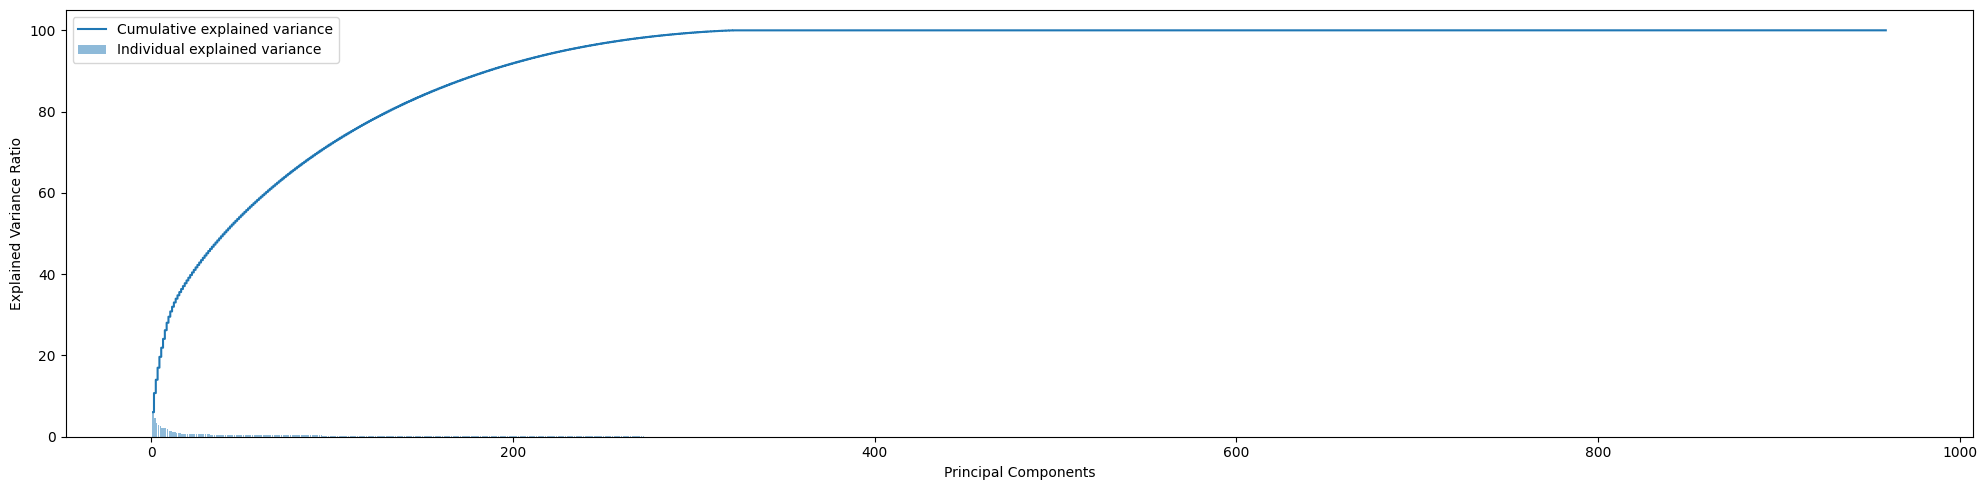

Principal Components analysis for Bag of words vector dataset


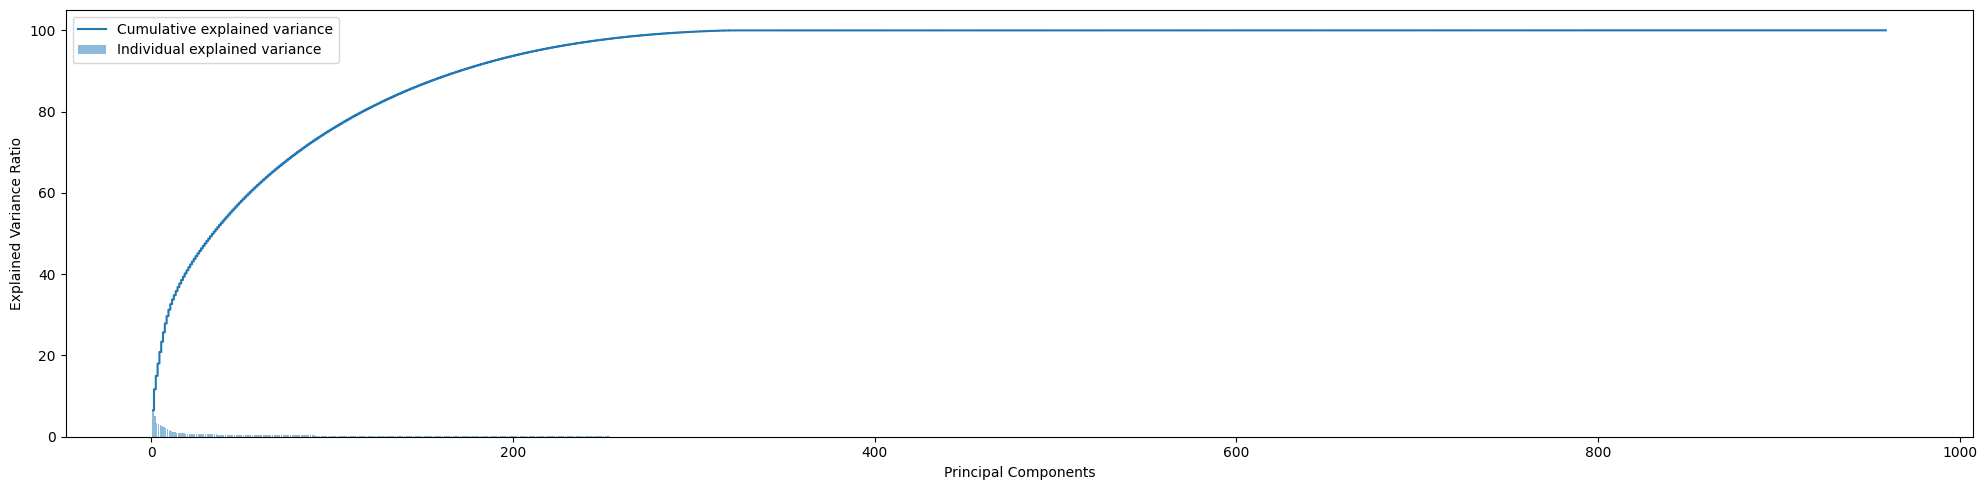

Principal Components analysis for Wrod2Vec vector dataset


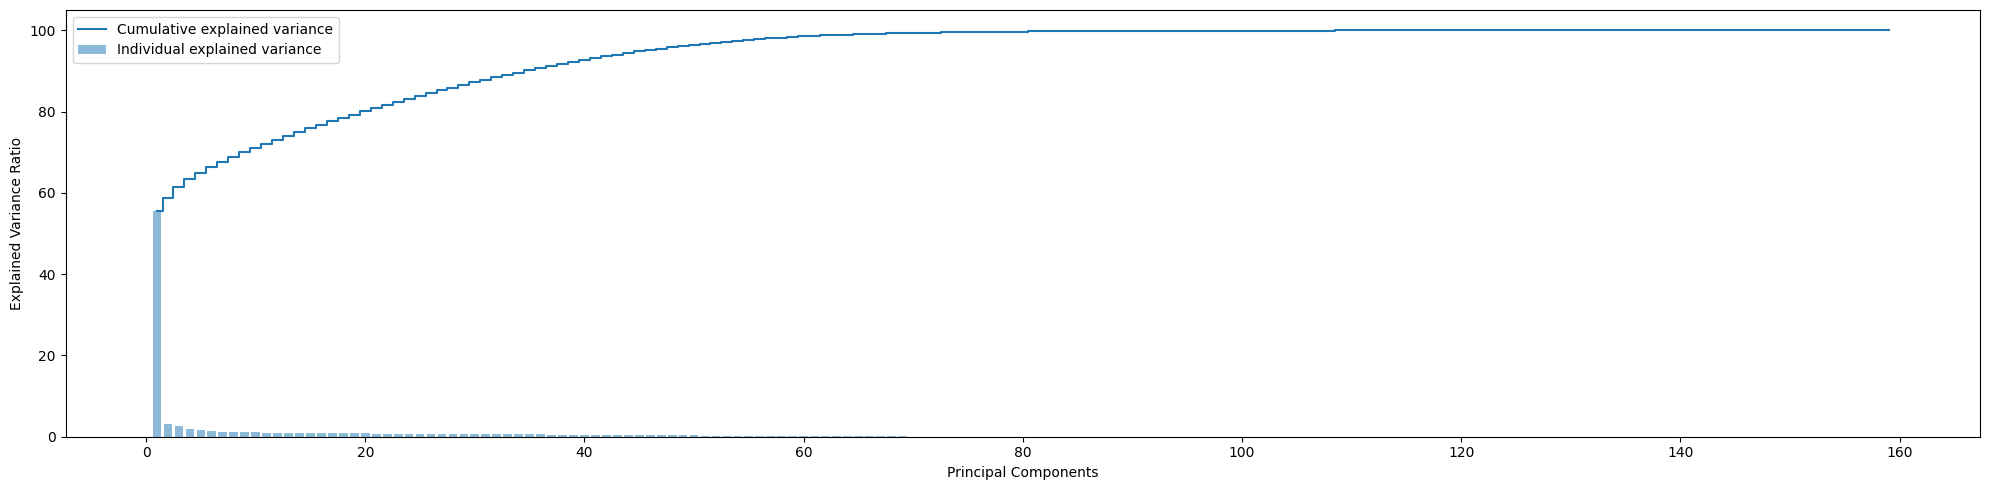

Principal Components analysis for Glove vector dataset


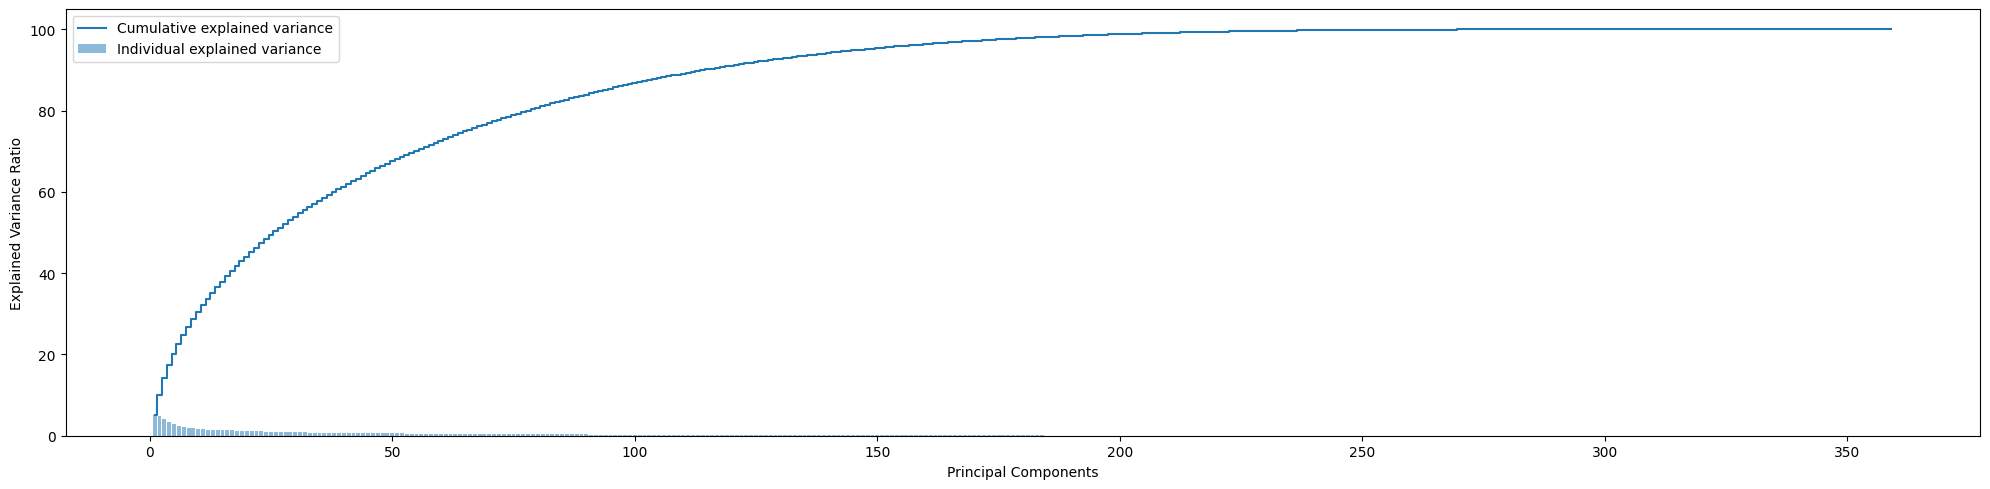

In [ ]:
# generating the covariance matrix and the eigen values for the PCA analysis
print ("Principal Components analysis for TD IDF vector dataset")
cov_matrix = np.cov(X_train_tfidf.T) # the relevanat covariance matrix

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)

# the "cumulative variance explained" analysis
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# generating the covariance matrix and the eigen values for the PCA analysis
print ("Principal Components analysis for Bag of words vector dataset")
cov_matrix = np.cov(X_train_countV.T) # the relevanat covariance matrix

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)

# the "cumulative variance explained" analysis
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# generating the covariance matrix and the eigen values for the PCA analysis
print ("Principal Components analysis for Wrod2Vec vector dataset")
cov_matrix = np.cov(X_train_w2v.T) # the relevanat covariance matrix

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)

# the "cumulative variance explained" analysis
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# generating the covariance matrix and the eigen values for the PCA analysis
print ("Principal Components analysis for Glove vector dataset")
cov_matrix = np.cov(X_train_glove.T) # the relevanat covariance matrix

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)

# the "cumulative variance explained" analysis
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [ ]:
#Applying PCA on training data
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 0.90)
#X_train_tfidf = pca.fit_transform(X_train_tfidf)
#X_test_tfidf = pca.transform(X_test_tfidf)
#X_train_countV = pca.fit_transform(X_train_countV)
#X_test_countV = pca.transform(X_test_countV)
#X_train_w2v = pca.fit_transform(X_train_w2v)
#X_test_w2v = pca.transform(X_test_w2v)
#X_train_glove = pca.fit_transform(X_train_glove)
#X_test_glove = pca.transform(X_test_glove)

In [ ]:
#Balancing the dataset using SMOTE
!pip install imbalanced-learn

# ***Apply SMOTE to balance data***

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_tfidf_resampled = sm.fit_resample(X_train_tfidf, y_train_tfidf)
X_train_countV_resampled, y_train_countV_resampled = sm.fit_resample(X_train_countV, y_train_countV)
X_train_w2v_resampled, y_train_w2v_resampled = sm.fit_resample(X_train_w2v, y_train_w2v)
X_train_glove_resampled, y_train_glove_resampled = sm.fit_resample(X_train_glove, y_train_glove)

In [ ]:
#Before resampling
print(X_train_tfidf.shape)
print(X_train_countV.shape)
print(X_train_w2v.shape)
print(X_train_glove.shape)
print(y_train_tfidf.shape)
print(y_train_countV.shape)
print(y_train_w2v.shape)
print(y_train_glove.shape)

#After resampling
print(X_train_tfidf_resampled.shape)
print(X_train_countV_resampled.shape)
print(X_train_w2v_resampled.shape)
print(X_train_glove_resampled.shape)
print(y_train_tfidf_resampled.shape)
print(y_train_countV_resampled.shape)
print(y_train_w2v_resampled.shape)
print(y_train_glove_resampled.shape)

print(y_train_glove.value_counts())
print(y_train_glove_resampled.value_counts())

(328, 959)
(328, 959)
(328, 159)
(328, 359)
(328,)
(328,)
(328,)
(328,)
(1205, 959)
(1205, 959)
(1205, 159)
(1205, 359)
(1205,)
(1205,)
(1205,)
(1205,)
1.0    241
2.0     32
3.0     25
4.0     24
5.0      6
Name: Accident Level, dtype: int64
1.0    241
4.0    241
2.0    241
3.0    241
5.0    241
Name: Accident Level, dtype: int64


# ***Build Base model using machine learning classifier***

*   SVM
*   Random Forest
*   XGB Classifer
*   Logistic
*   Decision Tree




In [36]:
#Building base model using SVM and Random Forest
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score, classification_report
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

resultsDf = pd.DataFrame()

def build_svm_model(index,tuning,resultsDf,X_train,X_test,y_train,y_test,vector_model,dataset_type):
  # intializing SVC model
  model = SVC(random_state = 42)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, pred)
  train_accuracy_score = model.score(X_train, y_train)
  test_accuracy_score = model.score(X_test, y_test)
  recall = recall_score(y_test, pred, average='weighted', zero_division=1)
  precision = precision_score(y_test, pred, average='weighted', zero_division=1)
  resultsDf = pd.DataFrame({'Model': 'SVC', 'hyper tune': tuning, 'Vector Model': vector_model, 'Balanced_Unbalanced': dataset_type,
                            'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 'Precision': precision,
                            'Recall': recall}, index=[index])
  print("Classification report for SVC model using ",vector_model,",", dataset_type," and without tuning base model \n",classification_report(y_test, pred))
  return (resultsDf,acc_score,recall,precision)

def build_random_forest_model(index,tuning,resultsDf,X_train,X_test,y_train,y_test,vector_model,dataset_type):
  # intializing Random Forest model
  model = RandomForestClassifier(random_state = 42)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, pred)
  train_accuracy_score = model.score(X_train, y_train)
  test_accuracy_score = model.score(X_test, y_test)
  recall = recall_score(y_test, pred, average='weighted', zero_division=1)
  precision = precision_score(y_test, pred, average='weighted', zero_division=1)
  resultsDf = pd.DataFrame({'Model': 'Randsom Forest', 'hyper tune': tuning, 'Vector Model': vector_model, 'Balanced_Unbalanced': dataset_type,
                            'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 'Precision': precision,
                            'Recall': recall}, index=[index])
  print("Classification report for Random Forest model using ",vector_model,",", dataset_type," and without tuning base model \n",classification_report(y_test, pred))
  return (resultsDf,acc_score,recall,precision)

def XGBClassifier_model(index,tuning,resultsDf,X_train,X_test,y_train,y_test,vector_model,dataset_type):
  # intializing XGBClassifier model
  model = XGBClassifier(random_state = 42)
  y_train = y_train.map({1.0: 0, 2.0: 1, 3.0:2, 4.0:3 ,5.0:4})
  y_test = y_test.map({1.0: 0, 2.0: 1, 3.0: 2, 4.0:3 ,5.0:4})
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, pred)
  train_accuracy_score = model.score(X_train, y_train)
  test_accuracy_score = model.score(X_test, y_test)
  recall = recall_score(y_test, pred, average='weighted', zero_division=1)
  precision = precision_score(y_test, pred, average='weighted', zero_division=1)
  resultsDf = pd.DataFrame({'Model': 'XGBClassifier', 'hyper tune': tuning, 'Vector Model': vector_model, 'Balanced_Unbalanced': dataset_type,
                            'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 'Precision': precision,
                            'Recall': recall}, index=[index])
  print("Classification report for XGB Classifier model using ",vector_model,",", dataset_type," and without tuning base model \n",classification_report(y_test, pred))
  return (resultsDf,acc_score,recall,precision)

def logistic_model(index,tuning,resultsDf,X_train,X_test,y_train,y_test,vector_model,dataset_type):
  # intializing LogisticRegression model
  model = LogisticRegression(random_state = 42,multi_class='multinomial')
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, pred)
  train_accuracy_score = model.score(X_train, y_train)
  test_accuracy_score = model.score(X_test, y_test)
  recall = recall_score(y_test, pred, average='weighted', zero_division=1)
  precision = precision_score(y_test, pred, average='weighted', zero_division=1)
  resultsDf = pd.DataFrame({'Model': 'logistic', 'hyper tune': tuning, 'Vector Model': vector_model, 'Balanced_Unbalanced': dataset_type,
                            'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 'Precision': precision,
                            'Recall': recall}, index=[index])
  print("Classification report for Logistics model using ",vector_model,",", dataset_type," and without tuning base model \n",classification_report(y_test, pred))
  return (resultsDf,acc_score,recall,precision)

def Decision_Tree_model(index,tuning,resultsDf,X_train,X_test,y_train,y_test,vector_model,dataset_type):
  # intializing Dtree model
  model = DecisionTreeClassifier(random_state = 42)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, pred)
  train_accuracy_score = model.score(X_train, y_train)
  test_accuracy_score = model.score(X_test, y_test)
  recall = recall_score(y_test, pred, average='weighted', zero_division=1)
  precision = precision_score(y_test, pred, average='weighted', zero_division=1)
  resultsDf = pd.DataFrame({'Model': 'DecisionTree', 'hyper tune': tuning, 'Vector Model': vector_model, 'Balanced_Unbalanced': dataset_type,
                            'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 'Precision': precision,
                            'Recall': recall}, index=[index])
  print("Classification report for Decision Tree model  using ",vector_model,",", dataset_type," and without tuning base model \n",classification_report(y_test, pred))
  return (resultsDf,acc_score,recall,precision)

# ***Calling base models using vectorized traning dataset and Unbalanced dataset***


In [ ]:
# Without Samping and Unbalanced data

resultsDf = pd.DataFrame()
wos_ub_final_df = pd.DataFrame()

#Calling SVC base model with vectorized input
resultsDf,svc_acc_tfidf,svc_rc_tfidf,svc_precision_tfidf = build_svm_model(0,'No Tuning',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,svc_acc_countV,svc_rc_countV,svc_precision_countV = build_svm_model(1,'No Tuning',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,svc_acc_w2v,svc_rc_w2v,svc_precision_w2v = build_svm_model(2,'No Tuning',resultsDf, X_train_w2v,X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,svc_acc_glove,svc_rc_glove,svc_precision_glove = build_svm_model(3,'No Tuning', resultsDf, X_train_glove,X_test_glove, y_train_glove, y_test_glove,'Glove','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)

#Calling Random Forest base model with vectorized input
resultsDf,rf_acc_tfidf,rf_rc_tfidf,rf_precision_tfidf = build_random_forest_model(4,'No Tuning',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,rf_acc_countV,rf_rc_countV,rf_precision_countV = build_random_forest_model(5,'No Tuning',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,rf_acc_w2v,rf_rc_w2v,rf_precision_w2v = build_random_forest_model(6,'No Tuning',resultsDf,X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,rf_acc_glove,rf_rc_glove,rf_precision_glove = build_random_forest_model(7,'No Tuning',resultsDf,X_train_glove, X_test_glove, y_train_glove, y_test_glove,'Glove','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)

#Calling Logistic base model with vectorized input
resultsDf,rf_acc_tfidf,rf_rc_tfidf,rf_precision_tfidf = logistic_model(12,'No Tuning',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,rf_acc_countV,rf_rc_countV,rf_precision_countV = logistic_model(13,'No Tuning',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,rf_acc_w2v,rf_rc_w2v,rf_precision_w2v = logistic_model(14,'No Tuning',resultsDf,X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,rf_acc_glove,rf_rc_glove,rf_precision_glove = logistic_model(15,'No Tuning',resultsDf,X_train_glove, X_test_glove, y_train_glove, y_test_glove,'Glove','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)

#Calling Decision Tree base model with vectorized input
resultsDf,rf_acc_tfidf,rf_rc_tfidf,rf_precision_tfidf = Decision_Tree_model(16,'No Tuning',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,rf_acc_countV,rf_rc_countV,rf_precision_countV = Decision_Tree_model(17,'No Tuning',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,rf_acc_w2v,rf_rc_w2v,rf_precision_w2v = Decision_Tree_model(18,'No Tuning',resultsDf,X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,rf_acc_glove,rf_rc_glove,rf_precision_glove = Decision_Tree_model(19,'No Tuning',resultsDf,X_train_glove, X_test_glove, y_train_glove, y_test_glove,'Glove','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)

#Calling XGBClassifier base model with vectorized input
resultsDf,svc_acc_tfidf,svc_rc_tfidf,svc_precision_tfidf = XGBClassifier_model(8,'No Tuning',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,svc_acc_countV,svc_rc_countV,svc_precision_countV = XGBClassifier_model(9,'No Tuning',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,svc_acc_w2v,svc_rc_w2v,svc_precision_w2v = XGBClassifier_model(10,'No Tuning',resultsDf, X_train_w2v,X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)
resultsDf,svc_acc_glove,svc_rc_glove,svc_precision_glove = XGBClassifier_model(11,'No Tuning', resultsDf, X_train_glove,X_test_glove, y_train_glove, y_test_glove,'Glove','Unbalanced dataset')
wos_ub_final_df = wos_ub_final_df.append(resultsDf)

Classification report for SVC model using  TD-IDF , Unbalanced dataset  and without tuning base model 
               precision    recall  f1-score   support

         1.0       0.73      0.98      0.84        61
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         6
         5.0       0.00      0.00      0.00         2

    accuracy                           0.72        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.72      0.62        83

Classification report for SVC model using  Bag of Words , Unbalanced dataset  and without tuning base model 
               precision    recall  f1-score   support

         1.0       0.73      0.98      0.84        61
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         6
         5.0       0.00   

# ***Performance metrics of Unbalanced dataset in each Vectorization for base models***

In [ ]:
wos_ub_final_df

,Model,hyper tune,Vector Model,Balanced_Unbalanced,Train Accuracy,Test Accuracy,Precision,Recall
0,SVC,No Tuning,TD-IDF,Unbalanced dataset,0.753049,0.722892,0.730532,0.722892
1,SVC,No Tuning,Bag of Words,Unbalanced dataset,0.765244,0.722892,0.730532,0.722892
2,SVC,No Tuning,Word2Vec,Unbalanced dataset,0.750000,0.734940,0.805197,0.734940
3,SVC,No Tuning,Glove,Unbalanced dataset,0.765244,0.734940,0.805197,0.734940
4,Randsom Forest,No Tuning,TD-IDF,Unbalanced dataset,0.996951,0.722892,0.730532,0.722892
5,Randsom Forest,No Tuning,Bag of Words,Unbalanced dataset,0.996951,0.722892,0.730532,0.722892
6,Randsom Forest,No Tuning,Word2Vec,Unbalanced dataset,0.996951,0.722892,0.730532,0.722892
7,Randsom Forest,No Tuning,Glove,Unbalanced dataset,0.996951,0.722892,0.730532,0.722892
12,logistic,No Tuning,TD-IDF,Unbalanced dataset,0.996951,0.650602,0.596810,0.650602
13,logistic,No Tuning,Bag of Words,Unbalanced dataset,0.996951,0.638554,0.586459,0.638554


# ***Calling base models using vectorized traning dataset and Balancing the dataset using SMOTE***


In [ ]:
# With Sampling and Balanced data

ws_ub_final_df = pd.DataFrame()

#Calling SVC base model with vectorized input
resultsDf,svc_acc_tfidf,svc_rc_tfidf,svc_precision_tfidf = build_svm_model(0,'No Tuning',resultsDf,X_train_tfidf_resampled,X_test_tfidf,y_train_tfidf_resampled,y_test_tfidf,'TD-IDF','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,svc_acc_countV,svc_rc_countV,svc_precision_countV = build_svm_model(1,'No Tuning',resultsDf,X_train_countV_resampled, X_test_countV, y_train_countV_resampled, y_test_countV,'Bag of Words','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,svc_acc_w2v,svc_rc_w2v,svc_precision_w2v = build_svm_model(2,'No Tuning',resultsDf, X_train_w2v_resampled,X_test_w2v, y_train_w2v_resampled, y_test_w2v,'Word2Vec','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,svc_acc_glove,svc_rc_glove,svc_precision_glove = build_svm_model(3,'No Tuning', resultsDf, X_train_glove_resampled,X_test_glove, y_train_glove_resampled, y_test_glove,'Glove','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)

#Calling Random Forest base model with vectorized input
resultsDf,rf_acc_tfidf,rf_rc_tfidf,rf_precision_tfidf = build_random_forest_model(4,'No Tuning',resultsDf,X_train_tfidf_resampled,X_test_tfidf,y_train_tfidf_resampled,y_test_tfidf,'TD-IDF','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,rf_acc_countV,rf_rc_countV,rf_precision_countV = build_random_forest_model(5,'No Tuning',resultsDf,X_train_countV_resampled, X_test_countV, y_train_countV_resampled, y_test_countV,'Bag of Words','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,rf_acc_w2v,rf_rc_w2v,rf_precision_w2v = build_random_forest_model(6,'No Tuning',resultsDf,X_train_w2v_resampled, X_test_w2v, y_train_w2v_resampled, y_test_w2v,'Word2Vec','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,rf_acc_glove,rf_rc_glove,rf_precision_glove = build_random_forest_model(7,'No Tuning',resultsDf,X_train_glove_resampled, X_test_glove, y_train_glove_resampled, y_test_glove,'Glove','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)

#Calling XGBClassifier base model with vectorized input
resultsDf,svc_acc_tfidf,svc_rc_tfidf,svc_precision_tfidf = XGBClassifier_model(8,'No Tuning',resultsDf,X_train_tfidf_resampled,X_test_tfidf,y_train_tfidf_resampled,y_test_tfidf,'TD-IDF','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,svc_acc_countV,svc_rc_countV,svc_precision_countV = XGBClassifier_model(9,'No Tuning',resultsDf,X_train_countV_resampled, X_test_countV, y_train_countV_resampled, y_test_countV,'Bag of Words','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,svc_acc_w2v,svc_rc_w2v,svc_precision_w2v = XGBClassifier_model(10,'No Tuning',resultsDf, X_train_w2v_resampled,X_test_w2v, y_train_w2v_resampled, y_test_w2v,'Word2Vec','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,svc_acc_glove,svc_rc_glove,svc_precision_glove = XGBClassifier_model(11,'No Tuning', resultsDf, X_train_glove_resampled,X_test_glove, y_train_glove_resampled, y_test_glove,'Glove','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)

#Calling Logistic base model with vectorized input
resultsDf,rf_acc_tfidf,rf_rc_tfidf,rf_precision_tfidf = logistic_model(12,'No Tuning',resultsDf,X_train_tfidf_resampled,X_test_tfidf,y_train_tfidf_resampled,y_test_tfidf,'TD-IDF','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,rf_acc_countV,rf_rc_countV,rf_precision_countV = logistic_model(13,'No Tuning',resultsDf,X_train_countV_resampled, X_test_countV, y_train_countV_resampled, y_test_countV,'Bag of Words','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,rf_acc_w2v,rf_rc_w2v,rf_precision_w2v = logistic_model(14,'No Tuning',resultsDf,X_train_w2v_resampled, X_test_w2v, y_train_w2v_resampled, y_test_w2v,'Word2Vec','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,rf_acc_glove,rf_rc_glove,rf_precision_glove = logistic_model(15,'No Tuning',resultsDf,X_train_glove_resampled, X_test_glove, y_train_glove_resampled, y_test_glove,'Glove','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)

#Calling Decision Tree base model with vectorized input
resultsDf,rf_acc_tfidf,rf_rc_tfidf,rf_precision_tfidf = Decision_Tree_model(16,'No Tuning',resultsDf,X_train_tfidf_resampled,X_test_tfidf,y_train_tfidf_resampled,y_test_tfidf,'TD-IDF','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,rf_acc_countV,rf_rc_countV,rf_precision_countV = Decision_Tree_model(17,'No Tuning',resultsDf,X_train_countV_resampled, X_test_countV, y_train_countV_resampled, y_test_countV,'Bag of Words','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,rf_acc_w2v,rf_rc_w2v,rf_precision_w2v = Decision_Tree_model(18,'No Tuning',resultsDf,X_train_w2v_resampled, X_test_w2v, y_train_w2v_resampled, y_test_w2v,'Word2Vec','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)
resultsDf,rf_acc_glove,rf_rc_glove,rf_precision_glove = Decision_Tree_model(19,'No Tuning',resultsDf,X_train_glove_resampled, X_test_glove, y_train_glove_resampled, y_test_glove,'Glove','Balanced dataset')
ws_ub_final_df = ws_ub_final_df.append(resultsDf)

Classification report for SVC model using  TD-IDF , Balanced dataset  and without tuning base model 
               precision    recall  f1-score   support

         1.0       0.73      0.98      0.84        61
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         6
         5.0       0.00      0.00      0.00         2

    accuracy                           0.72        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.72      0.62        83

Classification report for SVC model using  Bag of Words , Balanced dataset  and without tuning base model 
               precision    recall  f1-score   support

         1.0       0.72      0.95      0.82        61
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         6
         5.0       0.00      0

# ***Performance metrics of Balanced dataset [SMOTE] in each Vectorization for base models***

In [ ]:
ws_ub_final_df

,Model,hyper tune,Vector Model,Balanced_Unbalanced,Train Accuracy,Test Accuracy,Precision,Recall
0,SVC,No Tuning,TD-IDF,Balanced dataset,0.999170,0.722892,0.730532,0.722892
1,SVC,No Tuning,Bag of Words,Balanced dataset,0.999170,0.698795,0.556928,0.698795
2,SVC,No Tuning,Word2Vec,Balanced dataset,0.957676,0.542169,0.560547,0.542169
3,SVC,No Tuning,Glove,Balanced dataset,0.999170,0.722892,0.730532,0.722892
4,Randsom Forest,No Tuning,TD-IDF,Balanced dataset,0.999170,0.722892,0.730532,0.722892
5,Randsom Forest,No Tuning,Bag of Words,Balanced dataset,0.999170,0.722892,0.730532,0.722892
6,Randsom Forest,No Tuning,Word2Vec,Balanced dataset,0.999170,0.686747,0.599544,0.686747
7,Randsom Forest,No Tuning,Glove,Balanced dataset,0.999170,0.710843,0.566114,0.710843
8,XGBClassifier,No Tuning,TD-IDF,Balanced dataset,0.999170,0.710843,0.655808,0.710843
9,XGBClassifier,No Tuning,Bag of Words,Balanced dataset,0.999170,0.698795,0.570590,0.698795


# ***Tuning the base model using hyper tuning parameter to get better recall and accuracy with original dataset ***

# ***Tune SVM Base model***

param_grid = {'n_estimators': [10, 100, 1000],
                 'max_features': ['auto', 'sqrt', 'log2'],
               'criterion':['gini','entropy','log_loss']}

In [ ]:
#Tune the Base model
##############################################################################
#SVC
##############################################################################
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

param_grid = {'C': [0.01, 0.001, 0.0001,0.1, 1, 10, 100, 1000],
'gamma': ['scale'] ,
'kernel': ['rbf','linear','sigmoid','poly']}


svc_tune_model = GridSearchCV(SVC(random_state = 42), param_grid, refit = True, verbose = 3)
svc_tune_model.fit(X_train_tfidf, y_train_tfidf)
print("Best parameters for SVM Model with TD-IDF Vectorization : ",svc_tune_model.best_params_)
print("Best estimators for SVM Model with TD-IDF Vectorization : ",svc_tune_model.best_estimator_.get_params())
svc_tune_model.fit(X_train_countV, y_train_countV)
print("Best parameters for SVM Model with Count Vectorization : ",svc_tune_model.best_params_)
print("Best estimators for SVM Model with Count Vectorization : ",svc_tune_model.best_estimator_.get_params())
svc_tune_model.fit(X_train_w2v, y_train_w2v)
print("Best parameters for SVM Model with word2Vec Vectorization : ",svc_tune_model.best_params_)
print("Best estimators for SVM Model with word2Vec Vectorization : ",svc_tune_model.best_estimator_.get_params())
svc_tune_model.fit(X_train_glove, y_train_glove)
print("Best parameters for SVM Model with Glove Vectorization : ",svc_tune_model.best_params_)
print("Best estimators for SVM Model with Glove Vectorization : ",svc_tune_model.best_estimator_.get_params())


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.721 total time=   0.1s
[CV 2/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.721 total time=   0.1s
[CV 3/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.735 total time=   0.1s
[CV 4/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.735 total time=   0.1s
[CV 5/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.721 total time=   0.1s
[CV 1/5] END C=0.01, gamma=scale, kernel=linear;, score=0.706 total time=   0.1s
[CV 2/5] END C=0.01, gamma=scale, kernel=linear;, score=0.662 total time=   0.1s
[CV 3/5] END C=0.01, gamma=scale, kernel=linear;, score=0.676 total time=   0.1s
[CV 4/5] END C=0.01, gamma=scale, kernel=linear;, score=0.721 total time=   0.1s
[CV 5/5] END C=0.01, gamma=scale, kernel=linear;, score=0.618 total time=   0.1s
[CV 1/5] END C=0.01, gamma=scale, kernel=sigmoid;, score=0.721 total time=   0.0s
[CV 2/5] END C=0.01, gamma=scale, kernel=sigmo

# ***Tune Random Forest Base model***

param_grid = {'C': [0.01, 0.001, 0.0001,0.1, 1, 10, 100, 1000],
              'gamma': ['scale'] ,
              'kernel': ['rbf','linear','sigmoid','poly']}

In [ ]:
#Tune the Base model
##############################################################################
#Random Forest
##############################################################################
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

param_grid = {'n_estimators': [10, 100, 1000],
'max_features': ['auto', 'sqrt', 'log2'],
'criterion':['gini','entropy','log_loss']}


rf_tune_model = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid, refit = True, verbose = 3)
rf_tune_model.fit(X_train_tfidf, y_train_tfidf)
print("Best parameters for Random Forest Model with TD-IDF Vectorization : ",rf_tune_model.best_params_)
print("Best estimators for Random Forest Model with TD-IDF Vectorization : ",rf_tune_model.best_estimator_.get_params())
rf_tune_model.fit(X_train_countV, y_train_countV)
print("Best parameters for Random Forest Model with Count Vectorization : ",rf_tune_model.best_params_)
print("Best estimators for Random Forest Model with Count Vectorization : ",rf_tune_model.best_estimator_.get_params())
rf_tune_model.fit(X_train_w2v, y_train_w2v)
print("Best parameters for Random Forest Model with word2Vec Vectorization : ",rf_tune_model.best_params_)
print("Best estimators for Random Forest Model with word2Vec Vectorization : ",rf_tune_model.best_estimator_.get_params())
rf_tune_model.fit(X_train_glove, y_train_glove)
print("Best parameters for Random Forest Model with Glove Vectorization : ",rf_tune_model.best_params_)
print("Best estimators for Random Forest Model with Glove Vectorization : ",rf_tune_model.best_estimator_.get_params())

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.706 total time=   0.1s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.735 total time=   0.0s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.750 total time=   0.0s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.750 total time=   0.1s
[CV 5/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.721 total time=   0.1s
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.750 total time=   0.5s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.735 total time=   0.3s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.750 total time=   0.3s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.750 total time=   0.3s
[CV 5/5] END criterion=gini, max_features=auto, n_estimators=

# ***Tune Decision Tree model ***

params = {'max_depth':[5,10,15,20,25],'min_samples_leaf':[5,10,20,50,100],'criterion':['entropy','gini']}

In [ ]:
#Tune the Base model
##############################################################################
#Decision Tree
##############################################################################
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[5,10,15,20,25],'min_samples_leaf':[5,10,20,50,100],'criterion':['entropy','gini']}

Dtree_model = DecisionTreeClassifier()
gs_dtree_model = GridSearchCV(estimator=Dtree_model,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')
gs_dtree_model.fit(X_train_tfidf, y_train_tfidf)
print("Best parameters for Decision Tree Model with TD-IDF Vectorization : ",gs_dtree_model.best_params_)
print("Best estimators for Decision Tree Model with TD-IDF Vectorization : ",gs_dtree_model.best_estimator_.get_params())
gs_dtree_model.fit(X_train_countV, y_train_countV)
print("Best parameters for Decision Tree Model with Count Vectorization : ",gs_dtree_model.best_params_)
print("Best estimators for Decision Tree Model with Count Vectorization : ",gs_dtree_model.best_estimator_.get_params())
gs_dtree_model.fit(X_train_w2v, y_train_w2v)
print("Best parameters for Decision Tree Model with word2Vec Vectorization : ",gs_dtree_model.best_params_)
print("Best estimators for Decision Tree Model with word2Vec Vectorization : ",gs_dtree_model.best_estimator_.get_params())
gs_dtree_model.fit(X_train_glove, y_train_glove)
print("Best parameters for Decision Tree Model with Glove Vectorization : ",gs_dtree_model.best_params_)
print("Best estimators for Decision Tree Model with Glove Vectorization : ",gs_dtree_model.best_estimator_.get_params())

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters for Decision Tree Model with TD-IDF Vectorization :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}
Best estimators for Decision Tree Model with TD-IDF Vectorization :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters for Decision Tree Model with Count Vectorization :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}
Best estimators for Decision Tree Model with Count Vectorization :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_sample

# ***Tune Logistics Model***

params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'penalty': ['l2'],
'C': [100, 10, 1.0, 0.1, 0.01]}

In [ ]:
#Tune the Base model
##############################################################################
#Logistics Model
##############################################################################
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'penalty': ['l2'],
'C': [100, 10, 1.0, 0.1, 0.01]}

lgs_model = GridSearchCV(estimator=LogisticRegression(),param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')
lgs_model.fit(X_train_tfidf, y_train_tfidf)
print("Best parameters for Logistics Regression Model with TD-IDF Vectorization : ",lgs_model.best_params_)
print("Best estimators for Logistics Regression Model with TD-IDF Vectorization : ",lgs_model.best_estimator_.get_params())
lgs_model.fit(X_train_countV, y_train_countV)
print("Best parameters for Logistics Regression Model with Count Vectorization : ",lgs_model.best_params_)
print("Best estimators for Logistics Regression Model with Count Vectorization : ",lgs_model.best_estimator_.get_params())
lgs_model.fit(X_train_w2v, y_train_w2v)
print("Best parameters for Logistics Regression Model with word2Vec Vectorization : ",lgs_model.best_params_)
print("Best estimators for Logistics Regression Model with word2Vec Vectorization : ",lgs_model.best_estimator_.get_params())
lgs_model.fit(X_train_glove, y_train_glove)
print("Best parameters for Logistics Regression Model with Glove Vectorization : ",lgs_model.best_params_)
print("Best estimators for Logistics Regression Model with Glove Vectorization : ",lgs_model.best_estimator_.get_params())

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best parameters for Logistics Regression Model with TD-IDF Vectorization :  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best estimators for Logistics Regression Model with TD-IDF Vectorization :  {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best parameters for Logistics Regression Model with Count Vectorization :  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best estimators for Logistics Regression Model with Count Vectorization :  {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', '

# ***Tune XGB Classifier Model***

params = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
'max_depth' : [3, 4, 5, 6, 8],
'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
'objective': ['multi:softmax'],
'eval_metric': ['mlogloss'],
'num_class': [5]}

In [ ]:
#Tune the Base model
##############################################################################
#XGB Classifer Model
##############################################################################
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
params = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
'objective': ['multi:softmax'],
'eval_metric': ['mlogloss'],
'num_class': [5]}

xgbC_model = RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=params,cv=15,n_jobs=-1,verbose=1,scoring='accuracy')
xgbC_model.fit(X_train_tfidf, y_train_tfidf)
print("Best parameters for XGBClassifier Model with TD-IDF Vectorization : ",xgbC_model.best_params_)
print("Best estimators for XGBClassifier Model with TD-IDF Vectorization : ",xgbC_model.best_estimator_.get_params())
xgbC_model.fit(X_train_countV, y_train_countV)
print("Best parameters for XGBClassifier Model with Count Vectorization : ",xgbC_model.best_params_)
print("Best estimators for XGBClassifier Model with Count Vectorization : ",xgbC_model.best_estimator_.get_params())
xgbC_model.fit(X_train_w2v, y_train_w2v)
print("Best parameters for XGBClassifier Model with word2Vec Vectorization : ",xgbC_model.best_params_)
print("Best estimators for XGBClassifier Model with word2Vec Vectorization : ",xgbC_model.best_estimator_.get_params())
xgbC_model.fit(X_train_glove, y_train_glove)
print("Best parameters for XGBClassifier Model with Glove Vectorization : ",xgbC_model.best_params_)
print("Best estimators for XGBClassifier Model with Glove Vectorization : ",xgbC_model.best_estimator_.get_params())

Fitting 15 folds for each of 10 candidates, totalling 150 fits
Best parameters for XGBClassifier Model with TD-IDF Vectorization :  {'objective': 'multi:softmax', 'num_class': 5, 'learning_rate': 0.3, 'gamma': 0.4, 'eval_metric': 'mlogloss'}
Best estimators for XGBClassifier Model with TD-IDF Vectorization :  {'objective': 'multi:softmax', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'mlogloss', 'feature_types': None, 'gamma': 0.4, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_

# ***Hyper Tuned parameters for each mode and vectorization using original dataset***

*   Best parameters for SVM Model with TD-IDF Vectorization :  {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
*   Best parameters for SVM Model with Count Vectorization :  {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
*   Best parameters for SVM Model with word2Vec Vectorization :  {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
*   Best parameters for SVM Model with Glove Vectorization :  {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
---
*   Best parameters for Random Forest Model with TD-IDF Vectorization :  {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 10}
*   Best parameters for Random Forest Model with Count Vectorization :  {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 10}
*   Best parameters for Random Forest Model with word2Vec Vectorization :  {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 1000}
*   Best parameters for Random Forest Model with Glove Vectorization :  {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}
---
*   Best parameters for Decision Tree Model with TD-IDF Vectorization :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}
*   Best parameters for Decision Tree Model with Count Vectorization :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}
*   Best parameters for Decision Tree Model with word2Vec Vectorization :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50}
*   Best parameters for Decision Tree Model with Glove Vectorization :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50}
---
*   Best parameters for Logistics Regression Model with TD-IDF Vectorization :  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
*   Best parameters for Logistics Regression Model with Count Vectorization :  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
*   Best parameters for Logistics Regression Model with word2Vec Vectorization :  {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
*   Best parameters for Logistics Regression Model with Glove Vectorization :  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
---
*   Best parameters for XGBClassifier Model with TD-IDF Vectorization :  {'objective': 'multi:softmax', 'num_class': 5, 'learning_rate': 0.3, 'gamma': 0.4, 'eval_metric': 'mlogloss'}
*   Best parameters for XGBClassifier Model with Count Vectorization :  {'objective': 'multi:softmax', 'num_class': 5, 'learning_rate': 0.2, 'gamma': 0.2, 'eval_metric': 'mlogloss'}
*   Best parameters for XGBClassifier Model with word2Vec Vectorization :  {'objective': 'multi:softmax', 'num_class': 5, 'learning_rate': 0.25, 'gamma': 0.2, 'eval_metric': 'mlogloss'}
*   Best parameters for XGBClassifier Model with Glove Vectorization :  {'objective': 'multi:softmax', 'num_class': 5, 'learning_rate': 0.25, 'gamma': 0.3, 'eval_metric': 'mlogloss'}


# ***Hyper Tuning the base model with balanced data [SMOTE] and vectorization***

# ***Tune SVM Base model with Resampling***

In [ ]:
######################################################################################

#Tune the Base model with Resampling
##############################################################################
#SVC
##############################################################################
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

param_grid = {'C': [0.01, 0.001, 0.0001,0.1, 1, 10, 100, 1000],
'gamma': ['scale'] ,
'kernel': ['rbf','linear','sigmoid','poly']}


svc_tune_model = GridSearchCV(SVC(random_state = 42), param_grid, refit = True, verbose = 3)
svc_tune_model.fit(X_train_tfidf_resampled, y_train_tfidf_resampled)
print("Best parameters for SVM Model with TD-IDF Vectorization : ",svc_tune_model.best_params_)
print("Best estimators for SVM Model with TD-IDF Vectorization : ",svc_tune_model.best_estimator_.get_params())
svc_tune_model.fit(X_train_countV_resampled, y_train_countV_resampled)
print("Best parameters for SVM Model with Count Vectorization : ",svc_tune_model.best_params_)
print("Best estimators for SVM Model with Count Vectorization : ",svc_tune_model.best_estimator_.get_params())
svc_tune_model.fit(X_train_w2v_resampled, y_train_w2v_resampled)
print("Best parameters for SVM Model with word2Vec Vectorization : ",svc_tune_model.best_params_)
print("Best estimators for SVM Model with word2Vec Vectorization : ",svc_tune_model.best_estimator_.get_params())
svc_tune_model.fit(X_train_glove_resampled, y_train_glove_resampled)
print("Best parameters for SVM Model with Glove Vectorization : ",svc_tune_model.best_params_)
print("Best estimators for SVM Model with Glove Vectorization : ",svc_tune_model.best_estimator_.get_params())


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.495 total time=   1.3s
[CV 2/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.458 total time=   1.3s
[CV 3/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.574 total time=   1.3s
[CV 4/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.591 total time=   1.3s
[CV 5/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.659 total time=   1.6s
[CV 1/5] END C=0.01, gamma=scale, kernel=linear;, score=0.987 total time=   0.4s
[CV 2/5] END C=0.01, gamma=scale, kernel=linear;, score=0.987 total time=   0.3s
[CV 3/5] END C=0.01, gamma=scale, kernel=linear;, score=0.983 total time=   0.4s
[CV 4/5] END C=0.01, gamma=scale, kernel=linear;, score=0.990 total time=   0.4s
[CV 5/5] END C=0.01, gamma=scale, kernel=linear;, score=0.963 total time=   0.4s
[CV 1/5] END C=0.01, gamma=scale, kernel=sigmoid;, score=0.495 total time=   1.4s
[CV 2/5] END C=0.01, gamma=scale, kernel=sigmo

# ***Tune Random Forest Base model with Resampling***

In [ ]:
#Tune the Base model
##############################################################################
#Random Forest
##############################################################################
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

param_grid = {'n_estimators': [10, 100, 1000],
'max_features': ['auto', 'sqrt', 'log2'],
'criterion':['gini','entropy','log_loss']}


rf_tune_model = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid, refit = True, verbose = 3)
rf_tune_model.fit(X_train_tfidf_resampled, y_train_tfidf_resampled)
print("Best parameters for Random Forest Model with TD-IDF Vectorization : ",rf_tune_model.best_params_)
print("Best estimators for Random Forest Model with TD-IDF Vectorization : ",rf_tune_model.best_estimator_.get_params())
rf_tune_model.fit(X_train_countV_resampled, y_train_countV_resampled)
print("Best parameters for Random Forest Model with Count Vectorization : ",rf_tune_model.best_params_)
print("Best estimators for Random Forest Model with Count Vectorization : ",rf_tune_model.best_estimator_.get_params())
rf_tune_model.fit(X_train_w2v_resampled, y_train_w2v_resampled)
print("Best parameters for Random Forest Model with word2Vec Vectorization : ",rf_tune_model.best_params_)
print("Best estimators for Random Forest Model with word2Vec Vectorization : ",rf_tune_model.best_estimator_.get_params())
rf_tune_model.fit(X_train_glove_resampled, y_train_glove_resampled)
print("Best parameters for Random Forest Model with Glove Vectorization : ",rf_tune_model.best_params_)
print("Best estimators for Random Forest Model with Glove Vectorization : ",rf_tune_model.best_estimator_.get_params())

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.825 total time=   0.1s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.983 total time=   0.1s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.993 total time=   0.1s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.986 total time=   0.1s
[CV 5/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.986 total time=   0.1s
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.832 total time=   0.5s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.997 total time=   0.5s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=100;, score=1.000 total time=   0.5s
[CV 5/5] END criterion=gini, max_features=auto, n_estimators=

# ***Tune Decision Tree Base model with Resampling***

In [ ]:
#Tune the Base model
##############################################################################
#Decision Tree
##############################################################################
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[5,10,15,20,25],'min_samples_leaf':[5,10,20,50,100],'criterion':['entropy','gini']}

Dtree_model = DecisionTreeClassifier()
gs_dtree_model = GridSearchCV(estimator=Dtree_model,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')
gs_dtree_model.fit(X_train_tfidf_resampled, y_train_tfidf_resampled)
print("Best parameters for Decision Tree Model with TD-IDF Vectorization : ",gs_dtree_model.best_params_)
print("Best estimators for Decision Tree Model with TD-IDF Vectorization : ",gs_dtree_model.best_estimator_.get_params())
gs_dtree_model.fit(X_train_countV_resampled, y_train_countV_resampled)
print("Best parameters for Decision Tree Model with Count Vectorization : ",gs_dtree_model.best_params_)
print("Best estimators for Decision Tree Model with Count Vectorization : ",gs_dtree_model.best_estimator_.get_params())
gs_dtree_model.fit(X_train_w2v_resampled, y_train_w2v_resampled)
print("Best parameters for Decision Tree Model with word2Vec Vectorization : ",gs_dtree_model.best_params_)
print("Best estimators for Decision Tree Model with word2Vec Vectorization : ",gs_dtree_model.best_estimator_.get_params())
gs_dtree_model.fit(X_train_glove_resampled, y_train_glove_resampled)
print("Best parameters for Decision Tree Model with Glove Vectorization : ",gs_dtree_model.best_params_)
print("Best estimators for Decision Tree Model with Glove Vectorization : ",gs_dtree_model.best_estimator_.get_params())


Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters for Decision Tree Model with TD-IDF Vectorization :  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5}
Best estimators for Decision Tree Model with TD-IDF Vectorization :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters for Decision Tree Model with Count Vectorization :  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5}
Best estimators for Decision Tree Model with Count Vectorization :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_spli

# ***Tune Logistics Base model with Resampling***

In [ ]:
#Tune the Base model
##############################################################################
#Logistics Model
##############################################################################
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'penalty': ['l2'],'C': [100, 10, 1.0, 0.1, 0.01]}

lgs_model = GridSearchCV(estimator=LogisticRegression(),param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')
lgs_model.fit(X_train_tfidf_resampled, y_train_tfidf_resampled)
print("Best parameters for Logistics Regression Model with TD-IDF Vectorization : ",lgs_model.best_params_)
print("Best estimators for Logistics Regression Model with TD-IDF Vectorization : ",lgs_model.best_estimator_.get_params())
lgs_model.fit(X_train_countV_resampled, y_train_countV_resampled)
print("Best parameters for Logistics Regression Model with Count Vectorization : ",lgs_model.best_params_)
print("Best estimators for Logistics Regression Model with Count Vectorization : ",lgs_model.best_estimator_.get_params())
lgs_model.fit(X_train_w2v_resampled, y_train_w2v_resampled)
print("Best parameters for Logistics Regression Model with word2Vec Vectorization : ",lgs_model.best_params_)
print("Best estimators for Logistics Regression Model with word2Vec Vectorization : ",lgs_model.best_estimator_.get_params())
lgs_model.fit(X_train_glove_resampled, y_train_glove_resampled)
print("Best parameters for Logistics Regression Model with Glove Vectorization : ",lgs_model.best_params_)
print("Best estimators for Logistics Regression Model with Glove Vectorization : ",lgs_model.best_estimator_.get_params())


Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best parameters for Logistics Regression Model with TD-IDF Vectorization :  {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best estimators for Logistics Regression Model with TD-IDF Vectorization :  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best parameters for Logistics Regression Model with Count Vectorization :  {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best estimators for Logistics Regression Model with Count Vectorization :  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'rand

# ***Tune XGB Classifier Base model with Resampling***

In [ ]:
#Tune the Base model
##############################################################################
#XGB Classifer Model
##############################################################################
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
params = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
'max_depth' : [3, 4, 5, 6, 8],
'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
'objective': ['multi:softmax'],
'eval_metric': ['mlogloss'],
'num_class': [5]}

xgbC_model = RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=params,cv=15,n_jobs=-1,verbose=1,scoring='accuracy')
xgbC_model.fit(X_train_tfidf_resampled, y_train_tfidf_resampled)
print("Best parameters for XGBClassifier Model with TD-IDF Vectorization : ",xgbC_model.best_params_)
print("Best estimators for XGBClassifier Model with TD-IDF Vectorization : ",xgbC_model.best_estimator_.get_params())
xgbC_model.fit(X_train_countV_resampled, y_train_countV_resampled)
print("Best parameters for XGBClassifier Model with Count Vectorization : ",xgbC_model.best_params_)
print("Best estimators for XGBClassifier Model with Count Vectorization : ",xgbC_model.best_estimator_.get_params())
xgbC_model.fit(X_train_w2v_resampled, y_train_w2v_resampled)
print("Best parameters for XGBClassifier Model with word2Vec Vectorization : ",xgbC_model.best_params_)
print("Best estimators for XGBClassifier Model with word2Vec Vectorization : ",xgbC_model.best_estimator_.get_params())
xgbC_model.fit(X_train_glove_resampled, y_train_glove_resampled)
print("Best parameters for XGBClassifier Model with Glove Vectorization : ",xgbC_model.best_params_)
print("Best estimators for XGBClassifier Model with Glove Vectorization : ",xgbC_model.best_estimator_.get_params())


Fitting 15 folds for each of 10 candidates, totalling 150 fits
Best parameters for XGBClassifier Model with TD-IDF Vectorization :  {'objective': 'multi:softmax', 'num_class': 5, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.0, 'eval_metric': 'mlogloss'}
Best estimators for XGBClassifier Model with TD-IDF Vectorization :  {'objective': 'multi:softmax', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'mlogloss', 'feature_types': None, 'gamma': 0.0, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 8, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None,

# ***Hyper Tuned parameters for each mode and vectorization using resampled dataset [SMOTE]***

*   Best parameters for SVM Model with TD-IDF Vectorization :  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
*   Best parameters for SVM Model with Count Vectorization :  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
*   Best parameters for SVM Model with word2Vec Vectorization :  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
*   Best parameters for SVM Model with Glove Vectorization :  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
---
*   Best parameters for Random Forest Model with TD-IDF Vectorization :  {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
*   Best parameters for Random Forest Model with Count Vectorization :  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 1000}
*   Best parameters for Random Forest Model with word2Vec Vectorization :  {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 1000}
*   Best parameters for Random Forest Model with Glove Vectorization :  {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 1000}
---
*   Best parameters for Decision Tree Model with TD-IDF Vectorization :  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5}
*   Best parameters for Decision Tree Model with Count Vectorization :  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5}
*   Best parameters for Decision Tree Model with word2Vec Vectorization :  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}
*   Best parameters for Decision Tree Model with Glove Vectorization :  {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 5}
---
*   Best parameters for Logistics Regression Model with TD-IDF Vectorization : {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
*   Best parameters for Logistics Regression Model with Count Vectorization : {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
*   Best parameters for Logistics Regression Model with word2Vec Vectorization : {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
*   Best parameters for Logistics Regression Model with Glove Vectorization :  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
---
*   Best parameters for XGBClassifier Model with TD-IDF Vectorization :  {'objective': 'multi:softmax', 'num_class': 5, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.0, 'eval_metric': 'mlogloss'}
*   Best parameters for XGBClassifier Model with Count Vectorization :  {'objective': 'multi:softmax', 'num_class': 5, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0.4, 'eval_metric': 'mlogloss'}
*   Best parameters for XGBClassifier Model with word2Vec Vectorization :  {'objective': 'multi:softmax', 'num_class': 5, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.1, 'eval_metric': 'mlogloss'}
*   Best parameters for XGBClassifier Model with Glove Vectorization :  {'objective': 'multi:softmax', 'num_class': 5, 'max_depth': 4, 'learning_rate': 0.25, 'gamma': 0.0, 'eval_metric': 'mlogloss'}

# ***Rebuild base model with hyper tuning for each model***

In [ ]:
#Building base model using SVM and Random Forest
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

resultsDf = pd.DataFrame()

def build_svm_model(index,tuning,resultsDf,X_train,X_test,y_train,y_test,vector_model,dataset_type,kernel_scale,gamma_scale,c_scale):
  # intializing SVC model
  model = SVC(random_state = 42,kernel = kernel_scale,gamma = gamma_scale,C = c_scale)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, pred)
  train_accuracy_score = model.score(X_train, y_train)
  test_accuracy_score = model.score(X_test, y_test)
  recall = recall_score(y_test, pred, average='weighted', zero_division=1)
  precision = precision_score(y_test, pred, average='weighted', zero_division=1)
  resultsDf = pd.DataFrame({'Model': 'SVC', 'hyper tune': tuning, 'Vector Model': vector_model, 'Balanced_Unbalanced': dataset_type,
                            'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 'Precision': precision,
                            'Recall': recall}, index=[index])
  print("Classification report for SVC model using ",vector_model,",", dataset_type," and without tuning base model \n",classification_report(y_test, pred))
  return (resultsDf,acc_score,recall,precision)

def build_random_forest_model(index,tuning,resultsDf,X_train,X_test,y_train,y_test,vector_model,dataset_type,criterion_value,max_features_value,n_estimators_v):
  # intializing Random Forest model
  model = RandomForestClassifier(random_state = 42,criterion = criterion_value,max_features = max_features_value,n_estimators = n_estimators_v)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, pred)
  train_accuracy_score = model.score(X_train, y_train)
  test_accuracy_score = model.score(X_test, y_test)
  recall = recall_score(y_test, pred, average='weighted', zero_division=1)
  precision = precision_score(y_test, pred, average='weighted', zero_division=1)
  resultsDf = pd.DataFrame({'Model': 'Randsom Forest', 'hyper tune': tuning, 'Vector Model': vector_model, 'Balanced_Unbalanced': dataset_type,
                            'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 'Precision': precision,
                            'Recall': recall}, index=[index])
  print("Classification report for Random Forest model using ",vector_model,",", dataset_type," and without tuning base model \n",classification_report(y_test, pred))
  return (resultsDf,acc_score,recall,precision)

def XGBClassifier_model(index,tuning,resultsDf,X_train,X_test,y_train,y_test,vector_model,dataset_type,objective_value,num_class_value,learning_rate_v,gamma_v):
  # intializing XGBClassifier model
  model = XGBClassifier(random_state = 42,objective = objective_value, num_class = num_class_value, learning_rate = learning_rate_v, gamma = gamma_v,eval_metric = 'mlogloss')
  y_train = y_train.map({1.0: 0, 2.0: 1, 3.0:2, 4.0:3 ,5.0:4})
  y_test = y_test.map({1.0: 0, 2.0: 1, 3.0: 2, 4.0:3 ,5.0:4})
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, pred)
  train_accuracy_score = model.score(X_train, y_train)
  test_accuracy_score = model.score(X_test, y_test)
  recall = recall_score(y_test, pred, average='weighted', zero_division=1)
  precision = precision_score(y_test, pred, average='weighted', zero_division=1)
  resultsDf = pd.DataFrame({'Model': 'XGBClassifier', 'hyper tune': tuning, 'Vector Model': vector_model, 'Balanced_Unbalanced': dataset_type,
                            'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 'Precision': precision,
                            'Recall': recall}, index=[index])
  print("Classification report for XGB Classifier model using ",vector_model,",", dataset_type," and without tuning base model \n",classification_report(y_test, pred))
  return (resultsDf,acc_score,recall,precision)

def logistic_model(index,tuning,resultsDf,X_train,X_test,y_train,y_test,vector_model,dataset_type,solver_v,penalty_v,C_value):
  # intializing LogisticRegression model
  model = LogisticRegression(random_state = 42,multi_class='multinomial',solver = solver_v, penalty = penalty_v, C = C_value)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, pred)
  train_accuracy_score = model.score(X_train, y_train)
  test_accuracy_score = model.score(X_test, y_test)
  recall = recall_score(y_test, pred, average='weighted', zero_division=1)
  precision = precision_score(y_test, pred, average='weighted', zero_division=1)
  resultsDf = pd.DataFrame({'Model': 'logistic', 'hyper tune': tuning, 'Vector Model': vector_model, 'Balanced_Unbalanced': dataset_type,
                            'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 'Precision': precision,
                            'Recall': recall}, index=[index])
  print("Classification report for Logistic model using ",vector_model,",", dataset_type," and without tuning base model \n",classification_report(y_test, pred))
  return (resultsDf,acc_score,recall,precision)

def Decision_Tree_model(index,tuning,resultsDf,X_train,X_test,y_train,y_test,vector_model,dataset_type,criterion_value,max_depth_v,min_samples_leaf_v):
  # intializing Dtree model
  model = DecisionTreeClassifier(random_state = 42,criterion = criterion_value, max_depth = max_depth_v, min_samples_leaf = min_samples_leaf_v)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, pred)
  train_accuracy_score = model.score(X_train, y_train)
  test_accuracy_score = model.score(X_test, y_test)
  recall = recall_score(y_test, pred, average='weighted', zero_division=1)
  precision = precision_score(y_test, pred, average='weighted', zero_division=1)
  resultsDf = pd.DataFrame({'Model': 'DecisionTree', 'hyper tune': tuning, 'Vector Model': vector_model, 'Balanced_Unbalanced': dataset_type,
                            'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 'Precision': precision,
                            'Recall': recall}, index=[index])
  print("Classification report for Decision Tree model using ",vector_model,",", dataset_type," and without tuning base model \n",classification_report(y_test, pred))
  return (resultsDf,acc_score,recall,precision)

# ***Calling base models using vectorized traning dataset and Unbalanced dataset with hyper tuning parameters***

In [ ]:
# Without Samping and Balanced data

resultsDf = pd.DataFrame()
wos_b_final_df = pd.DataFrame()

#Calling SVC base model with vectorized input
resultsDf,svc_acc_tfidf,svc_rc_tfidf,svc_precision_tfidf = build_svm_model(0,'Hyper Tuning Applied',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Unbalanced dataset','rbf','scale',0.01)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,svc_acc_countV,svc_rc_countV,svc_precision_countV = build_svm_model(1,'Hyper Tuning Applied',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Unbalanced dataset','rbf','scale',0.01)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,svc_acc_w2v,svc_rc_w2v,svc_precision_w2v = build_svm_model(2,'Hyper Tuning Applied',resultsDf, X_train_w2v,X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Unbalanced dataset','linear','scale',0.01)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,svc_acc_glove,svc_rc_glove,svc_precision_glove = build_svm_model(3,'Hyper Tuning Applied', resultsDf, X_train_glove,X_test_glove, y_train_glove, y_test_glove,'Glove','Unbalanced dataset','sigmoid','scale',1)
wos_b_final_df = wos_b_final_df.append(resultsDf)

#Calling Random Forest base model with vectorized input
resultsDf,rf_acc_tfidf,rf_rc_tfidf,rf_precision_tfidf = build_random_forest_model(4,'Hyper Tuning Applied',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Unbalanced dataset','entropy','auto',10)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,rf_acc_countV,rf_rc_countV,rf_precision_countV = build_random_forest_model(5,'Hyper Tuning Applied',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Unbalanced dataset','entropy','auto',10)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,rf_acc_w2v,rf_rc_w2v,rf_precision_w2v = build_random_forest_model(6,'Hyper Tuning Applied',resultsDf,X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Unbalanced dataset','gini','auto',1000)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,rf_acc_glove,rf_rc_glove,rf_precision_glove = build_random_forest_model(7,'Hyper Tuning Applied',resultsDf,X_train_glove, X_test_glove, y_train_glove, y_test_glove,'Glove','Unbalanced dataset','gini','auto',100)
wos_b_final_df = wos_b_final_df.append(resultsDf)

#Calling XGBClassifier base model with vectorized input
resultsDf,svc_acc_tfidf,svc_rc_tfidf,svc_precision_tfidf = XGBClassifier_model(8,'Hyper Tuning Applied',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Unbalanced dataset','multi:softmax',5,0.3,0.4)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,svc_acc_countV,svc_rc_countV,svc_precision_countV = XGBClassifier_model(9,'Hyper Tuning Applied',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Unbalanced dataset','multi:softmax',5,0.2,0.2)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,svc_acc_w2v,svc_rc_w2v,svc_precision_w2v = XGBClassifier_model(10,'Hyper Tuning Applied',resultsDf, X_train_w2v,X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Unbalanced dataset','multi:softmax',5,0.25,0.2)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,svc_acc_glove,svc_rc_glove,svc_precision_glove = XGBClassifier_model(11,'Hyper Tuning Applied', resultsDf, X_train_glove,X_test_glove, y_train_glove, y_test_glove,'Glove','Unbalanced dataset','multi:softmax',5,0.25,0.3)
wos_b_final_df = wos_b_final_df.append(resultsDf)

#Calling Logistic base model with vectorized input
resultsDf,rf_acc_tfidf,rf_rc_tfidf,rf_precision_tfidf = logistic_model(12,'Hyper Tuning Applied',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Unbalanced dataset','newton-cg','l2',0.01)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,rf_acc_countV,rf_rc_countV,rf_precision_countV = logistic_model(13,'Hyper Tuning Applied',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Unbalanced dataset','newton-cg','l2',0.01)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,rf_acc_w2v,rf_rc_w2v,rf_precision_w2v = logistic_model(14,'Hyper Tuning Applied',resultsDf,X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Unbalanced dataset','saga','l2',0.01)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,rf_acc_glove,rf_rc_glove,rf_precision_glove = logistic_model(15,'Hyper Tuning Applied',resultsDf,X_train_glove, X_test_glove, y_train_glove, y_test_glove,'Glove','Unbalanced dataset','newton-cg','l2',0.01)
wos_b_final_df = wos_b_final_df.append(resultsDf)

#Calling Decision Tree base model with vectorized input
resultsDf,rf_acc_tfidf,rf_rc_tfidf,rf_precision_tfidf = Decision_Tree_model(16,'Hyper Tuning Applied',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Unbalanced dataset','entropy',5,20)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,rf_acc_countV,rf_rc_countV,rf_precision_countV = Decision_Tree_model(17,'Hyper Tuning Applied',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Unbalanced dataset','entropy',5,20)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,rf_acc_w2v,rf_rc_w2v,rf_precision_w2v = Decision_Tree_model(18,'Hyper Tuning Applied',resultsDf,X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Unbalanced dataset','entropy',5,50)
wos_b_final_df = wos_b_final_df.append(resultsDf)
resultsDf,rf_acc_glove,rf_rc_glove,rf_precision_glove = Decision_Tree_model(19,'Hyper Tuning Applied',resultsDf,X_train_glove, X_test_glove, y_train_glove, y_test_glove,'Glove','Unbalanced dataset','entropy',5,50)
wos_b_final_df = wos_b_final_df.append(resultsDf)


Classification report for SVC model using  TD-IDF , Unbalanced dataset  and without tuning base model 
               precision    recall  f1-score   support

         1.0       0.73      1.00      0.85        61
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         6
         5.0       0.00      0.00      0.00         2

    accuracy                           0.73        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.73      0.62        83

Classification report for SVC model using  Bag of Words , Unbalanced dataset  and without tuning base model 
               precision    recall  f1-score   support

         1.0       0.73      1.00      0.85        61
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         6
         5.0       0.00   

# ***After tuning, Performance metrics of Unbalanced dataset in each Vectorization for base models ***

In [ ]:
wos_b_final_df

,Model,hyper tune,Vector Model,Balanced_Unbalanced,Train Accuracy,Test Accuracy,Precision,Recall
0,SVC,Hyper Tuning Applied,TD-IDF,Unbalanced dataset,0.734756,0.734940,0.805197,0.734940
1,SVC,Hyper Tuning Applied,Bag of Words,Unbalanced dataset,0.734756,0.734940,0.805197,0.734940
2,SVC,Hyper Tuning Applied,Word2Vec,Unbalanced dataset,0.753049,0.734940,0.739495,0.734940
3,SVC,Hyper Tuning Applied,Glove,Unbalanced dataset,0.734756,0.734940,0.805197,0.734940
4,Randsom Forest,Hyper Tuning Applied,TD-IDF,Unbalanced dataset,0.939024,0.722892,0.730532,0.722892
5,Randsom Forest,Hyper Tuning Applied,Bag of Words,Unbalanced dataset,0.932927,0.722892,0.730532,0.722892
6,Randsom Forest,Hyper Tuning Applied,Word2Vec,Unbalanced dataset,0.996951,0.722892,0.730532,0.722892
7,Randsom Forest,Hyper Tuning Applied,Glove,Unbalanced dataset,0.996951,0.722892,0.730532,0.722892
8,XGBClassifier,Hyper Tuning Applied,TD-IDF,Unbalanced dataset,0.987805,0.722892,0.575301,0.722892
9,XGBClassifier,Hyper Tuning Applied,Bag of Words,Unbalanced dataset,0.984756,0.698795,0.563672,0.698795


# ***Calling base models using vectorized traning dataset and Balanced dataset with hyper tuning parameters***

In [ ]:
# With Samping and Balanced data

resultsDf = pd.DataFrame()
ws_b_final_df = pd.DataFrame()

#Calling SVC base model with vectorized input
resultsDf,svc_acc_tfidf,svc_rc_tfidf,svc_precision_tfidf = build_svm_model(0,'Hyper Tuning Applied',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Balanced dataset','rbf','scale',10)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,svc_acc_countV,svc_rc_countV,svc_precision_countV = build_svm_model(1,'Hyper Tuning Applied',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Balanced dataset','rbf','scale',1)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,svc_acc_w2v,svc_rc_w2v,svc_precision_w2v = build_svm_model(2,'Hyper Tuning Applied',resultsDf, X_train_w2v,X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Balanced dataset','linear','scale',100)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,svc_acc_glove,svc_rc_glove,svc_precision_glove = build_svm_model(3,'Hyper Tuning Applied', resultsDf, X_train_glove,X_test_glove, y_train_glove, y_test_glove,'Glove','Balanced dataset','sigmoid','scale',10)
ws_b_final_df = ws_b_final_df.append(resultsDf)

#Calling Random Forest base model with vectorized input
resultsDf,rf_acc_tfidf,rf_rc_tfidf,rf_precision_tfidf = build_random_forest_model(4,'Hyper Tuning Applied',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Balanced dataset','gini','log2',1000)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,rf_acc_countV,rf_rc_countV,rf_precision_countV = build_random_forest_model(5,'Hyper Tuning Applied',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Balanced dataset','entropy','log2',1000)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,rf_acc_w2v,rf_rc_w2v,rf_precision_w2v = build_random_forest_model(6,'Hyper Tuning Applied',resultsDf,X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Balanced dataset','gini','auto',1000)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,rf_acc_glove,rf_rc_glove,rf_precision_glove = build_random_forest_model(7,'Hyper Tuning Applied',resultsDf,X_train_glove, X_test_glove, y_train_glove, y_test_glove,'Glove','Balanced dataset','entropy','auto',1000)
ws_b_final_df = ws_b_final_df.append(resultsDf)

#Calling XGBClassifier base model with vectorized input
resultsDf,svc_acc_tfidf,svc_rc_tfidf,svc_precision_tfidf = XGBClassifier_model(8,'Hyper Tuning Applied',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Balanced dataset','multi:softmax',5,0.5,0.0)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,svc_acc_countV,svc_rc_countV,svc_precision_countV = XGBClassifier_model(9,'Hyper Tuning Applied',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Balanced dataset','multi:softmax',5,0.3,0.4)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,svc_acc_w2v,svc_rc_w2v,svc_precision_w2v = XGBClassifier_model(10,'Hyper Tuning Applied',resultsDf, X_train_w2v,X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Balanced dataset','multi:softmax',5,0.15,0.1)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,svc_acc_glove,svc_rc_glove,svc_precision_glove = XGBClassifier_model(11,'Hyper Tuning Applied', resultsDf, X_train_glove,X_test_glove, y_train_glove, y_test_glove,'Glove','Balanced dataset','multi:softmax',5,0.25,0.0)
ws_b_final_df = ws_b_final_df.append(resultsDf)

#Calling Logistic base model with vectorized input
resultsDf,rf_acc_tfidf,rf_rc_tfidf,rf_precision_tfidf = logistic_model(12,'Hyper Tuning Applied',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Balanced dataset','newton-cg','l2',1.0)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,rf_acc_countV,rf_rc_countV,rf_precision_countV = logistic_model(13,'Hyper Tuning Applied',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Balanced dataset','newton-cg','l2',1.0)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,rf_acc_w2v,rf_rc_w2v,rf_precision_w2v = logistic_model(14,'Hyper Tuning Applied',resultsDf,X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Balanced dataset','newton-cg','l2',100)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,rf_acc_glove,rf_rc_glove,rf_precision_glove = logistic_model(15,'Hyper Tuning Applied',resultsDf,X_train_glove, X_test_glove, y_train_glove, y_test_glove,'Glove','Balanced dataset','newton-cg','l2',100)
ws_b_final_df = ws_b_final_df.append(resultsDf)

#Calling Decision Tree base model with vectorized input
resultsDf,rf_acc_tfidf,rf_rc_tfidf,rf_precision_tfidf = Decision_Tree_model(16,'Hyper Tuning Applied',resultsDf,X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf,'TD-IDF','Balanced dataset','gini',15,5)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,rf_acc_countV,rf_rc_countV,rf_precision_countV = Decision_Tree_model(17,'Hyper Tuning Applied',resultsDf,X_train_countV, X_test_countV, y_train_countV, y_test_countV,'Bag of Words','Balanced dataset','entropy',15,5)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,rf_acc_w2v,rf_rc_w2v,rf_precision_w2v = Decision_Tree_model(18,'Hyper Tuning Applied',resultsDf,X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v,'Word2Vec','Balanced dataset','gini',20,50)
ws_b_final_df = ws_b_final_df.append(resultsDf)
resultsDf,rf_acc_glove,rf_rc_glove,rf_precision_glove = Decision_Tree_model(19,'Hyper Tuning Applied',resultsDf,X_train_glove, X_test_glove, y_train_glove, y_test_glove,'Glove','Balanced dataset','entropy',25,5)
ws_b_final_df = ws_b_final_df.append(resultsDf)


Classification report for SVC model using  TD-IDF , Balanced dataset  and without tuning base model 
               precision    recall  f1-score   support

         1.0       0.73      0.98      0.84        61
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         6
         5.0       0.00      0.00      0.00         2

    accuracy                           0.72        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.72      0.62        83

Classification report for SVC model using  Bag of Words , Balanced dataset  and without tuning base model 
               precision    recall  f1-score   support

         1.0       0.73      0.98      0.84        61
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         6
         5.0       0.00      0

# ***After tuning, Performance metrics of Balanced dataset[SMOTE] in each Vectorization for base models ***

In [ ]:
ws_b_final_df

,Model,hyper tune,Vector Model,Balanced_Unbalanced,Train Accuracy,Test Accuracy,Precision,Recall
0,SVC,Hyper Tuning Applied,TD-IDF,Balanced dataset,0.996951,0.722892,0.730532,0.722892
1,SVC,Hyper Tuning Applied,Bag of Words,Balanced dataset,0.765244,0.722892,0.730532,0.722892
2,SVC,Hyper Tuning Applied,Word2Vec,Balanced dataset,0.996951,0.469880,0.586109,0.469880
3,SVC,Hyper Tuning Applied,Glove,Balanced dataset,0.859756,0.662651,0.589190,0.662651
4,Randsom Forest,Hyper Tuning Applied,TD-IDF,Balanced dataset,0.996951,0.722892,0.730532,0.722892
5,Randsom Forest,Hyper Tuning Applied,Bag of Words,Balanced dataset,0.996951,0.722892,0.730532,0.722892
6,Randsom Forest,Hyper Tuning Applied,Word2Vec,Balanced dataset,0.996951,0.722892,0.730532,0.722892
7,Randsom Forest,Hyper Tuning Applied,Glove,Balanced dataset,0.996951,0.722892,0.730532,0.722892
8,XGBClassifier,Hyper Tuning Applied,TD-IDF,Balanced dataset,0.996951,0.698795,0.563672,0.698795
9,XGBClassifier,Hyper Tuning Applied,Bag of Words,Balanced dataset,0.951220,0.710843,0.566114,0.710843


# ***Merge result into final dataframe***

In [ ]:
final_result_df = pd.DataFrame()
final_result_df = final_result_df.append(wos_ub_final_df, ignore_index=True)
final_result_df = final_result_df.append(ws_ub_final_df, ignore_index=True)
final_result_df = final_result_df.append(wos_b_final_df, ignore_index=True)
final_result_df = final_result_df.append(ws_b_final_df, ignore_index=True)

In [ ]:
final_result_df

,Model,hyper tune,Vector Model,Balanced_Unbalanced,Train Accuracy,Test Accuracy,Precision,Recall
0,SVC,No Tuning,TD-IDF,Unbalanced dataset,0.753049,0.722892,0.730532,0.722892
1,SVC,No Tuning,Bag of Words,Unbalanced dataset,0.765244,0.722892,0.730532,0.722892
2,SVC,No Tuning,Word2Vec,Unbalanced dataset,0.750000,0.734940,0.805197,0.734940
3,SVC,No Tuning,Glove,Unbalanced dataset,0.765244,0.734940,0.805197,0.734940
4,Randsom Forest,No Tuning,TD-IDF,Unbalanced dataset,0.996951,0.722892,0.730532,0.722892
...,...,...,...,...,...,...,...,...
75,logistic,Hyper Tuning Applied,Glove,Balanced dataset,0.996951,0.614458,0.562119,0.614458
76,DecisionTree,Hyper Tuning Applied,TD-IDF,Balanced dataset,0.777439,0.614458,0.559380,0.614458
77,DecisionTree,Hyper Tuning Applied,Bag of Words,Balanced dataset,0.774390,0.650602,0.564930,0.650602
78,DecisionTree,Hyper Tuning Applied,Word2Vec,Balanced dataset,0.734756,0.734940,0.805197,0.734940


# ***Conclusions on Milestone 1:***

***SVM, Random Forest, Logistics, XGB Classifer and Decision Tree models are used and implemented.***

# ***Before Tuning***

*   Without Tuning and Unbalanced dataset, SVM Classifier through Word2Vec and Glove vectorization performed well among other classifer with test accuracy and recall with 74% and precision of 80%
*   Without Tuning and Balanced dataset, Random Forest Classifier through Glove vectorization performed well among other classifer with test accuracy and recall with 72% and precision of 74%

---
# ***After Tuning***

*   After hyper tuning and Unbalanced dataset, SVM Classifier through Glove vectorization and Logistic through Word2Vec performed well among other classifer with test accuracy and recall with 74% and precision of 80%
*   After hyper tuning and Balanced dataset, Decision Tree through Word2Vec vectorization performed well among other classifer with test accuracy and recall with 72% and precision of 80%








# ***Executing RNN and LSTM models with all vectorized method***


---
---
---



# ***MileStone 2***

# ***Run vectorized data with Recurrent Neural Network***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Embedding, LSTM, SpatialDropout1D, GRU, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.layers import Embedding
from keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#import dataset
data = pd.read_csv('/content/drive/MyDrive/GreatLearning/Capstone project/dataset/Data Set - industrial_safety_and_health_database_with_accidents_description.csv')

data.drop(['Unnamed: 0'], axis=1,inplace=True)
if data.duplicated().sum() >0 :
  data_copy = data.copy()
  data.drop_duplicates(keep='first',inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Vectorized data is stored in CSV file and it reads back to DataFrame***


In [ ]:
from sklearn.preprocessing import LabelEncoder

X_tfidf = pd.read_csv("/content/drive/MyDrive/GreatLearning/Capstone project/dataset/X_tfidf.csv")
X_countV = pd.read_csv("/content/drive/MyDrive/GreatLearning/Capstone project/dataset/X_countV.csv")
X_w2v = pd.read_csv("/content/drive/MyDrive/GreatLearning/Capstone project/dataset/X_w2v.csv")
X_glove = pd.read_csv("/content/drive/MyDrive/GreatLearning/Capstone project/dataset/X_glove.csv")

print(X_tfidf.shape)
print(X_countV.shape)
print(X_w2v.shape)
print(X_glove.shape)


(418, 901)
(418, 901)
(418, 101)
(418, 301)


# ***Grouping the target variable into 3 classes***

In [ ]:
import keras.utils.np_utils as np_utils
y = data['Accident Level']

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y = label_encoder.fit_transform(y)
print(len(y))

for x in range(len(y)):
  if y[x] == 2:
      y[x] = 1
  if y[x] == 3:
      y[x] = 2
  if y[x] == 4:
      y[x] = 2

# Convert both the training and test labels into one-hot encoded vectors:
y = np_utils.to_categorical(y)


print(y.shape)

418
(418, 3)


# ***Split training and test data for all vectorized dataframe and accident level as targe variable***

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
# Split data into training and testing set.

from sklearn.model_selection import train_test_split
# TD IDF
X = X_tfidf
y = y
X.columns = X.columns.astype(str)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

# Bag of words
X = X_countV
y = y
X.columns = X.columns.astype(str)
X_train_countV, X_test_countV, y_train_countV, y_test_countV = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

# Word2Vec
X = X_w2v
y = y
X.columns = X.columns.astype(str)
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

# Glove
X = X_glove
y = y
X.columns = X.columns.astype(str)
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)



In [ ]:
print(X_train_tfidf.shape,y_train_tfidf.shape)
print(X_train_countV.shape,y_train_countV.shape)
print(X_train_w2v.shape,y_train_w2v.shape)
print(X_train_glove.shape,y_train_glove.shape)

print(X_test_tfidf.shape,y_test_tfidf.shape)
print(X_test_countV.shape,y_test_countV.shape)
print(X_test_w2v.shape,y_test_w2v.shape)
print(X_test_glove.shape,y_test_glove.shape)

(334, 901) (334, 3)
(334, 901) (334, 3)
(334, 101) (334, 3)
(334, 301) (334, 3)
(84, 901) (84, 3)
(84, 901) (84, 3)
(84, 101) (84, 3)
(84, 301) (84, 3)


# ***Building model using Neural Networks for all 4 vectorization***

# ***#DEEP LEARNING ARCHITECTURE FOR DATASET BEFORE SAMPLING***

In [ ]:
#TF-IDF dataset
MLP_tfidf = Sequential(name="TF-IDF")
MLP_tfidf.add(Dense(128,input_shape=(901,),activation='relu'))
MLP_tfidf.add(BatchNormalization())
MLP_tfidf.add(Dropout(0.2))
MLP_tfidf.add(Dense(64,activation='relu'))
MLP_tfidf.add(BatchNormalization())
MLP_tfidf.add(Dropout(0.2))
MLP_tfidf.add(Dense(64,activation='relu'))
MLP_tfidf.add(BatchNormalization())
MLP_tfidf.add(Dropout(0.2))
MLP_tfidf.add(Dense(32,activation='relu'))
MLP_tfidf.add(BatchNormalization())
MLP_tfidf.add(Dropout(0.2))
MLP_tfidf.add(Dense(3,activation='softmax'))
optimizer = Adam(lr=0.001)
MLP_tfidf.compile(optimizer,loss='categorical_crossentropy',metrics=['accuracy'])


#BOW dataset
MLP_countV = Sequential(name="BOW")
MLP_countV.add(Dense(128,input_shape=(901,),activation='relu'))
MLP_countV.add(BatchNormalization())
MLP_countV.add(Dropout(0.2))
MLP_countV.add(Dense(64,activation='relu'))
MLP_countV.add(BatchNormalization())
MLP_countV.add(Dropout(0.2))
MLP_countV.add(Dense(64,activation='relu'))
MLP_countV.add(BatchNormalization())
MLP_countV.add(Dropout(0.2))
MLP_countV.add(Dense(32,activation='relu'))
MLP_countV.add(BatchNormalization())
MLP_countV.add(Dropout(0.2))
MLP_countV.add(Dense(3,activation='softmax'))
optimizer = Adam(lr=0.001)
MLP_countV.compile(optimizer,loss='categorical_crossentropy',metrics=['accuracy'])



# ***#DEEP LEARNING ARCHITECTURE FOR DATASET AFTER SAMPLING***

In [ ]:

#TF-IDF dataset
MLP_tfidf_resample = Sequential(name="SAMPLED-TF-IDF")
MLP_tfidf_resample.add(Dense(128,input_shape=(901,),activation='relu'))
MLP_tfidf_resample.add(BatchNormalization())
MLP_tfidf_resample.add(Dropout(0.2))
MLP_tfidf_resample.add(Dense(64,activation='relu'))
MLP_tfidf_resample.add(BatchNormalization())
MLP_tfidf_resample.add(Dropout(0.2))
MLP_tfidf_resample.add(Dense(64,activation='relu'))
MLP_tfidf_resample.add(BatchNormalization())
MLP_tfidf_resample.add(Dropout(0.2))
MLP_tfidf_resample.add(Dense(32,activation='relu'))
MLP_tfidf_resample.add(BatchNormalization())
MLP_tfidf_resample.add(Dropout(0.2))
MLP_tfidf_resample.add(Dense(3,activation='softmax'))
optimizer = Adam(lr=0.001)
MLP_tfidf_resample.compile(optimizer,loss='categorical_crossentropy',metrics=['accuracy'])


#BOW dataset
MLP_countV_resample = Sequential(name="SAMPLED-BOW")
MLP_countV_resample.add(Dense(128,input_shape=(901,),activation='relu'))
MLP_countV_resample.add(BatchNormalization())
MLP_countV_resample.add(Dropout(0.2))
MLP_countV_resample.add(Dense(64,activation='relu'))
MLP_countV_resample.add(BatchNormalization())
MLP_countV_resample.add(Dropout(0.2))
MLP_countV_resample.add(Dense(64,activation='relu'))
MLP_countV_resample.add(BatchNormalization())
MLP_countV_resample.add(Dropout(0.2))
MLP_countV_resample.add(Dense(32,activation='relu'))
MLP_countV_resample.add(BatchNormalization())
MLP_countV_resample.add(Dropout(0.2))
MLP_countV_resample.add(Dense(3,activation='softmax'))
optimizer = Adam(lr=0.001)
MLP_countV_resample.compile(optimizer,loss='categorical_crossentropy',metrics=['accuracy'])



# ***Model Summary***

In [ ]:
MLP_tfidf.summary()
MLP_countV.summary()

MLP_tfidf_resample.summary()
MLP_countV_resample.summary()

Model: "TF-IDF"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               115456    
                                                                 
 batch_normalization_16 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_17 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_17 (Dropout)        (None, 64)                0    

# ***Run models #BEFORE SAMPLING:***

In [ ]:
#TF-IDF
MLP_tfidf.fit(X_train_tfidf, y_train_tfidf,validation_split=0.2,batch_size=100,epochs=50,verbose=1)
#BOW
MLP_countV.fit(X_train_countV, y_train_countV,validation_split=0.2,batch_size=100,epochs=50,verbose=1)

Epoch 1/50
3/3 [==============================] - 5s 279ms/step - loss: 1.7092 - accuracy: 0.3221 - val_loss: 0.8098 - val_accuracy: 0.8209
Epoch 2/50
3/3 [==============================] - 0s 54ms/step - loss: 1.5926 - accuracy: 0.3221 - val_loss: 0.6858 - val_accuracy: 0.8209
Epoch 3/50
3/3 [==============================] - 0s 49ms/step - loss: 1.4682 - accuracy: 0.3483 - val_loss: 0.7013 - val_accuracy: 0.8209
Epoch 4/50
3/3 [==============================] - 0s 45ms/step - loss: 1.4165 - accuracy: 0.3858 - val_loss: 0.7071 - val_accuracy: 0.8209
Epoch 5/50
3/3 [==============================] - 0s 50ms/step - loss: 1.4875 - accuracy: 0.3371 - val_loss: 0.7129 - val_accuracy: 0.8209
Epoch 6/50
3/3 [==============================] - 0s 51ms/step - loss: 1.3126 - accuracy: 0.4157 - val_loss: 0.7149 - val_accuracy: 0.8209
Epoch 7/50
3/3 [==============================] - 0s 49ms/step - loss: 1.4456 - accuracy: 0.3895 - val_loss: 0.7296 - val_accuracy: 0.8209
Epoch 8/50
3/3 [==========

# ***Run model #AFTER SAMPLING:***

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_tfidf_resampled = sm.fit_resample(X_train_tfidf, y_train_tfidf)
X_train_countV_resampled, y_train_countV_resampled = sm.fit_resample(X_train_countV, y_train_countV)
X_train_w2v_resampled, y_train_w2v_resampled = sm.fit_resample(X_train_w2v, y_train_w2v)
X_train_glove_resampled, y_train_glove_resampled = sm.fit_resample(X_train_glove, y_train_glove)

print(X_train_tfidf_resampled.shape, y_train_tfidf_resampled.shape)
print(X_train_countV_resampled.shape, y_train_countV_resampled.shape)
print(X_train_w2v_resampled.shape, y_train_w2v_resampled.shape)
print(X_train_glove_resampled.shape, y_train_glove_resampled.shape)

print(X_train_tfidf.shape,y_train_tfidf.shape)
print(X_train_countV.shape,y_train_countV.shape)
print(X_train_w2v.shape,y_train_w2v.shape)
print(X_train_glove.shape,y_train_glove.shape)

#TF-IDF
MLP_tfidf_resample.fit(X_train_tfidf_resampled, y_train_tfidf_resampled,validation_split=0.2,batch_size=100,epochs=50,verbose=1)

#BOW
MLP_countV_resample.fit(X_train_tfidf_resampled, y_train_tfidf_resampled,validation_split=0.2,batch_size=100,epochs=50,verbose=1)


(741, 901) (741, 3)
(741, 901) (741, 3)
(741, 101) (741, 3)
(741, 301) (741, 3)
(334, 901) (334, 3)
(334, 901) (334, 3)
(334, 101) (334, 3)
(334, 301) (334, 3)
Epoch 1/50
6/6 [==============================] - 3s 89ms/step - loss: 1.6105 - accuracy: 0.3041 - val_loss: 1.1040 - val_accuracy: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 0s 22ms/step - loss: 1.3342 - accuracy: 0.3936 - val_loss: 1.3486 - val_accuracy: 0.0000e+00
Epoch 3/50
6/6 [==============================] - 0s 19ms/step - loss: 1.5199 - accuracy: 0.3361 - val_loss: 1.5301 - val_accuracy: 0.0000e+00
Epoch 4/50
6/6 [==============================] - 0s 20ms/step - loss: 1.3377 - accuracy: 0.3953 - val_loss: 1.6489 - val_accuracy: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 0s 20ms/step - loss: 1.3015 - accuracy: 0.4274 - val_loss: 1.5692 - val_accuracy: 0.0000e+00
Epoch 6/50
6/6 [==============================] - 0s 20ms/step - loss: 1.2609 - accuracy: 0.4206 - val_loss: 1.6231 - val_acc

# ***#PREDICTION FOR BEFORE SAMPLING:***

In [ ]:
y_pred_tfidf = MLP_tfidf.predict(X_test_tfidf)
y_pred_countV = MLP_countV.predict(X_test_countV)

y_pred_tfidf = (np.argmax(y_pred_tfidf,axis = 1))
y_pred_countV = (np.argmax(y_pred_countV,axis = 1))

y_test_tfidf_np = (np.argmax(y_test_tfidf,axis = 1))
y_test_countV_np = (np.argmax(y_test_countV,axis = 1))

from sklearn.metrics import classification_report
print("/*****************************************/\n\n")
print("Training accuracy of MLP for tfidf dataset is:")
MLP_tfidf.evaluate(X_train_tfidf, y_train_tfidf)
print("Testing accuracy of MLP for tfidf dataset is:")
MLP_tfidf.evaluate(X_test_tfidf, y_test_tfidf)
print("Classification report of MLP for TF-IDF dataset is :-")
print(classification_report(y_pred_tfidf,y_test_tfidf_np))
print("\n\n/*****************************************/\n\n")

print("/*****************************************/\n\n")
print("Training accuracy of MLP for BOW dataset is:")
MLP_countV.evaluate(X_train_countV, y_train_countV)
print("Testing accuracy of MLP for BOW dataset is:")
MLP_countV.evaluate(X_test_countV, y_test_countV)
print("Classification report of MLP for BoW dataset is :-")
print(classification_report(y_pred_countV,y_test_countV_np))
print("\n\n/*****************************************/\n\n")



3/3 [==============================] - 0s 5ms/step
/*****************************************/


Training accuracy of MLP for tfidf dataset is:
11/11 [==============================] - 0s 3ms/step - loss: 0.7756 - accuracy: 0.7395
Testing accuracy of MLP for tfidf dataset is:
3/3 [==============================] - 0s 6ms/step - loss: 0.7700 - accuracy: 0.7381
Classification report of MLP for TF-IDF dataset is :-
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        84
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.74        84
   macro avg       0.33      0.25      0.28        84
weighted avg       1.00      0.74      0.85        84



/*****************************************/


/*****************************************/


Training accuracy of MLP for BOW dataset is:
11/11 [==============================] - 0s 3ms/step - loss: 0.6

# ***#PREDICTION FOR AFTER SAMPLING:***

In [ ]:
y_pred_tfidf_resampled = MLP_tfidf_resample.predict(X_test_tfidf)
y_pred_countV_resampled = MLP_countV_resample.predict(X_test_countV)

y_pred_tfidf_resampled = (np.argmax(y_pred_tfidf_resampled,axis= 1))
y_pred_countV_resampled = (np.argmax(y_pred_countV_resampled,axis= 1))

print("/*****************************************/")
print("Training accuracy of MLP for sampled tfidf dataset is:")
MLP_tfidf_resample.evaluate(X_train_tfidf_resampled, y_train_tfidf_resampled)
print("Testing accuracy of MLP for sampled tfidf dataset is:")
MLP_tfidf_resample.evaluate(X_test_tfidf, y_test_tfidf)
print("Classification report of MLP for sampled TF-IDF dataset is :-")
print(classification_report(y_pred_tfidf_resampled,y_test_tfidf_np))
print("/*****************************************/")

print("/*****************************************/")
print("Training accuracy of MLP for sampled BOW dataset is:")
MLP_countV_resample.evaluate(X_train_tfidf_resampled, y_train_tfidf_resampled)
print("Testing accuracy of MLP for sampled BOW dataset is:")
MLP_countV_resample.evaluate(X_test_countV, y_test_countV)
print("Classification report of MLP for sampled BoW dataset is :-")
print(classification_report(y_pred_countV_resampled,y_test_countV_np))
print("/*****************************************/")

3/3 [==============================] - 0s 6ms/step
/*****************************************/
Training accuracy of MLP for sampled tfidf dataset is:
24/24 [==============================] - 0s 4ms/step - loss: 1.9128 - accuracy: 0.3333
Testing accuracy of MLP for sampled tfidf dataset is:
3/3 [==============================] - 0s 7ms/step - loss: 1.1184 - accuracy: 0.7381
Classification report of MLP for sampled TF-IDF dataset is :-
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        84
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.74        84
   macro avg       0.33      0.25      0.28        84
weighted avg       1.00      0.74      0.85        84

/*****************************************/
/*****************************************/
Training accuracy of MLP for sampled BOW dataset is:
24/24 [==============================] -

# ***Executing LSTM models with Glove vectorization and padding***

In [ ]:
# importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Embedding, LSTM, SpatialDropout1D, GRU, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.layers import Embedding
from keras.initializers import Constant

from tensorflow.keras.utils import to_categorical

from keras.callbacks import ModelCheckpoint
from keras.models import load_model

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Embedding, LSTM, SpatialDropout1D, GRU, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.layers import Embedding
from keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
!pip install -U tensorflow-text==2.9
import tensorflow as tf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import dataset
data = pd.read_csv('/content/drive/MyDrive/GreatLearning/Capstone project/dataset/cleansed_data.csv')
print(data.shape)
data = data.dropna()
print(data.shape)

(425, 2274)
(411, 2274)


In [17]:
# plot loss learning curves
def plotLossChart(history):
    plt.title('Loss')
    epochs = range(1, len(history.history['accuracy'])+1)
    plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
    plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
    plt.legend()
    plt.show()

# plot accuracy learning curves
def plotAccuracyChart(history):
    plt.title('Accuracy')
    epochs = range(1, len(history.history['accuracy'])+1)
    plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
    plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
    plt.legend()
    plt.show()

def getAccuracy(model, X_test, y_test):
    scores = model.evaluate(X_test, np.array(y_test), verbose=2)
    accuracy = scores[1]*100
    return accuracy

def convertPredictProbaToActualPrediction(y_pred):
    predList = []
    for prd in y_pred:
        predList.append(np.argmax(prd))
    return predList

def con_matrix(actual, predictions):
    #from sklearn.metrics import confusion_matrix
    print('Confusion Matrix')
    matrix = pd.DataFrame(confusion_matrix(actual, predictions), columns = np.unique(actual), index = np.unique(actual))
    # confusion_matrix() returns the confusion matrix. Wrapping this matrix in a dataframe with appropriate column names and index
    matrix.loc[:,'total count actual class'] = matrix.sum(axis = 1)  # sum accross the columns
    matrix.loc['total count predicted'] = matrix.sum(axis = 0)  # row sum
    return matrix

def convertCategoriesToInt(df):
    df_cat = []
    for x in df:
        if x == 1:
            df_cat.append(0)
        if x == 2:
            df_cat.append(1)
        if x == 3:
            df_cat.append(2)
        if x == 4:
            df_cat.append(3)
        if x == 5:
            df_cat.append(4)
    return df_cat

def convertIntToCategoriesList(lst):
    catList = []
    for x in lst:
        catList.append((lambda x: ('1' if x == 0 else ('2' if x == 1 else ('3' if x == 2 else ('4' if x == 3 else '5')))))(x))
    return catList

# Function to get Pad sequences
def getPadSequences(vectorizedWords):
    # print(vectorizedWords[0])
    if (type(vectorizedWords) == list):
        linesPad = pad_sequences(vectorizedWords)
    else:
        linesPad = pad_sequences(vectorizedWords.toarray())
    return linesPad


# Method for creating embedding layer using GloVe model
def generateEmbeddingLayer(wordIdx, embeddingDim, embeddingsIdx, maxLen):
    embeddingMtrx = np.zeros((len(wordIdx) + 1, embeddingDim))
    c = 0
    for i, word in enumerate(wordIdx):
        embeddingVtr = embeddingsIdx.get(word)
        if embeddingVtr is not None:
            c+=1
            embeddingMtrx[i] = embeddingVtr
    print(c)
    embeddingLayer = Embedding(len(wordIdx) + 1, embeddingDim, weights=[embeddingMtrx],
                                input_length=maxLen, trainable=False)
    return embeddingLayer

# Function to generate indices & shuffle
def generateIndicesAndShuffle(endRange):
    indices = np.arange(endRange)
    np.random.shuffle(indices)
    return indices

# Function for Train Test Split
def trainTestSplit(split, X, y):
    splitValue  = int(split * X.shape[0])

    X_train = X[:-splitValue]
    y_train = y[:-splitValue]
    X_test  = X[-splitValue:]
    y_test  = y[-splitValue:]

    return X_train, y_train, X_test, y_test

In [ ]:
# To download the spacy langauge module
!python -m spacy download en_core_web_sm
!pip install fasttext-langdetect
!pip install --user gensim==3.8.3
import gensim
print(gensim.__version__)
from gensim.models import Word2Vec
!pip install -U imbalanced-learn

#Glove Vectorization
from tqdm import tqdm
from nltk.tokenize import word_tokenize
embeddings_index = {}
f = open(r'/content/drive/MyDrive/GreatLearning/Capstone project/dataset/glove.6B.300d.txt', encoding='utf8')

for line in tqdm(f):
  # Splitting the each line
  values = line.split()
  word = values[0]
  coefs = np.array(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

2023-12-23 17:41:41.360957: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-12-23 17:41:46.504318: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-12-23 17:41:46.504372: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-wi

400000it [00:44, 9079.17it/s]


In [ ]:
data.shape

(411, 2274)

In [ ]:
#Long-Short Term Memory (LSTM)
tokenVtr = Tokenizer()
data['lemm_text'] = data['lemm_text'].astype(str)
tokenVtr.fit_on_texts(data['lemm_text'])
tokenDesc = tokenVtr.texts_to_sequences(data['lemm_text'])
wordIdxTkn = tokenVtr.word_index
vocabSizeTkn = (len(tokenVtr.word_index) + 1)
print("unique tokens - {}".format(len(wordIdxTkn)))
print('Vocab length is {}'.format(vocabSizeTkn))

#Padding
tokenLinesPad = getPadSequences(tokenDesc)
print('tokenLinesPad shape is {}'.format(tokenLinesPad.shape))

#Embeddings
embedding_layer_new = generateEmbeddingLayer(wordIdxTkn, 300, embeddings_index, 73)

unique tokens - 2349
Vocab length is 2350
tokenLinesPad shape is (411, 73)
2157


In [ ]:
#shuffle
shuffledIndices = generateIndicesAndShuffle(tokenLinesPad.shape[0])

AL =  data['Accident Level'].values
AL = AL[shuffledIndices]
print('PAL.shape {}'.format(AL.shape))

# Creating train test split
validation_split = 0.3
X_trainToken, y_trainToken, X_testToken, y_testToken = trainTestSplit(validation_split,tokenLinesPad,AL)

print(X_trainToken.shape,y_trainToken.shape)
print(X_testToken.shape,y_testToken.shape)
y_trainToken_cat = convertCategoriesToInt(y_trainToken)
y_testToken_cat = convertCategoriesToInt(y_testToken)

PAL.shape (411,)
(288, 73) (288,)
(123, 73) (123,)


In [ ]:
for x in range(len(y_testToken_cat)):
  if y_testToken_cat[x] == 0:
    y_testToken_cat[x] = 0
  if y_testToken_cat[x] in (1,2):
    y_testToken_cat[x] = 1
  if y_testToken_cat[x] in (3,4):
    y_testToken_cat[x] = 2

for x in range(len(y_trainToken_cat)):
  if y_trainToken_cat[x] == 0:
    y_trainToken_cat[x] = 0
  if y_trainToken_cat[x] in (1,2):
    y_trainToken_cat[x] = 1
  if y_trainToken_cat[x] in (3,4):
    y_trainToken_cat[x] = 2

# ***BUILDING LSTM Model with Glove tokenizer***

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 73, 300)           705000    
                                                                 
 lstm_12 (LSTM)              (None, 73, 30)            39720     
                                                                 
 lstm_13 (LSTM)              (None, 73, 50)            16200     
                                                                 
 batch_normalization_37 (Bat  (None, 73, 50)           200       
 chNormalization)                                                
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 batch_normalization_38 (Bat  (None, 50)               200       
 chNormalization)                                     

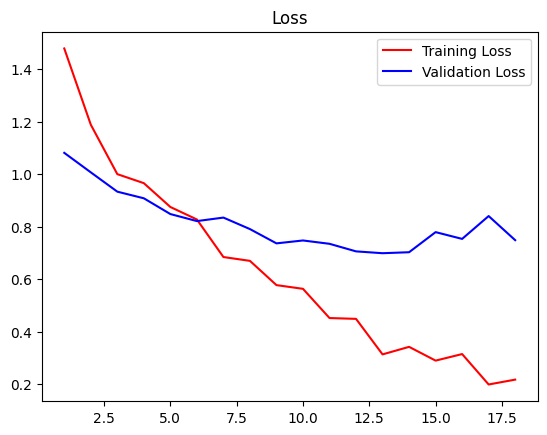

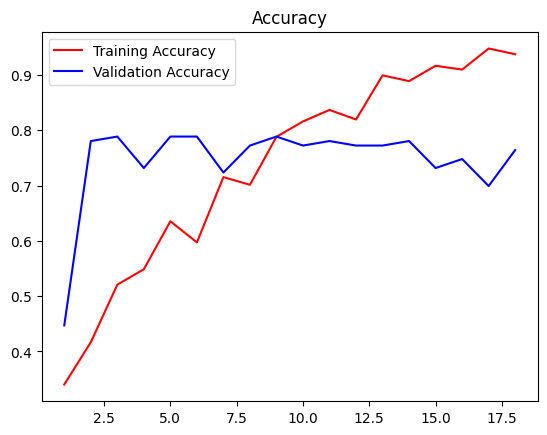

4/4 - 0s - loss: 0.6985 - accuracy: 0.7724 - 267ms/epoch - 67ms/step
Test Accuracy for LSTM is 77.24%
4/4 [==============================] - 2s 66ms/step
Confusion Matrix
              precision    recall  f1-score   support

           1       0.79      0.98      0.87        97
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         9

    accuracy                           0.77       123
   macro avg       0.26      0.33      0.29       123
weighted avg       0.62      0.77      0.69       123



In [ ]:

#Build Model
model_lstm = Sequential()
# Add embedding layer
model_lstm.add(embedding_layer_new)
# Add first LSTM layer with return_sequences=True
model_lstm.add(LSTM(30, dropout=0.1, return_sequences=True))
# Add second LSTM layer with more units
model_lstm.add(LSTM(50, dropout=0.1))
# Add Batch Normalization
model_lstm.add(BatchNormalization())
# Add Dropout for regularization
model_lstm.add(Dropout(0.2))
# Add Dense layer
model_lstm.add(Dense(5, activation='softmax'))
# Compile model with Adam optimizer and sparse categorical crossentropy loss
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
#Make all layers as trainable
for layer in model_lstm.layers:
  layer.trainable == True
# Print model summary
print(model_lstm.summary())
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
from keras.utils.vis_utils import plot_model

plot_model(model_lstm, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

history_lstm = model_lstm.fit(X_trainToken, np.array(y_trainToken_cat), batch_size=16, epochs=100, validation_data=(X_testToken, np.array(y_testToken_cat)), verbose=2, callbacks=[early_stopping])
plotLossChart(history_lstm)
plotAccuracyChart(history_lstm)

accuracy_lstm = round(getAccuracy(model_lstm, X_testToken, np.array(y_testToken_cat)), 2)
print('Test Accuracy for LSTM is {}%'.format(accuracy_lstm))
predLstm = model_lstm.predict(X_testToken)
y_testToken_class = convertIntToCategoriesList(y_testToken_cat)
y_predLstm_class = convertIntToCategoriesList(convertPredictProbaToActualPrediction(predLstm))
con_matrix(y_testToken_class, y_predLstm_class)
mat = classification_report(y_testToken_class, y_predLstm_class);
print(mat)

# ***RNN with Glove and padding***

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 73, 300)           705000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 73, 30)            9930      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                4050      
                                                                 
 batch_normalization_3 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 255       
                                                      

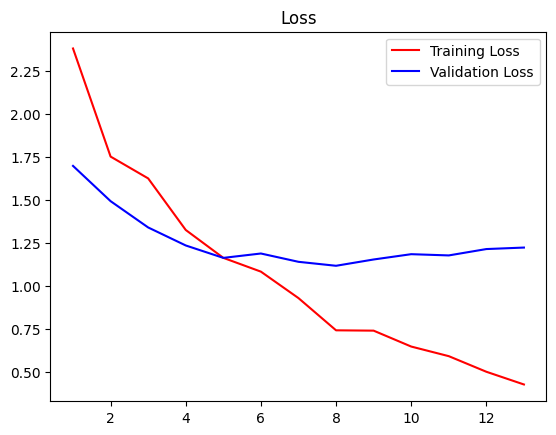

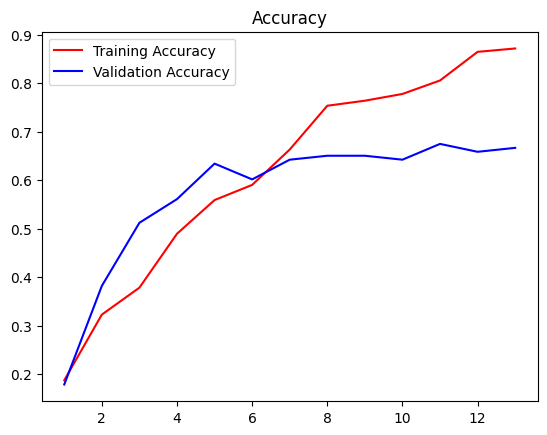

4/4 - 0s - loss: 1.1174 - accuracy: 0.6504 - 64ms/epoch - 16ms/step
Test Accuracy for SimpleRNN is 65.04%
4/4 [==============================] - 0s 13ms/step
Confusion Matrix
              precision    recall  f1-score   support

           1       0.76      0.84      0.80        93
           2       0.08      0.05      0.06        19
           3       0.11      0.09      0.10        11

    accuracy                           0.65       123
   macro avg       0.32      0.33      0.32       123
weighted avg       0.60      0.65      0.62       123



In [ ]:
import keras

#Build Model
model_srnn = Sequential()
# Add embedding layer
model_srnn.add(embedding_layer_new)
# Add first Simple RNN layer with return_sequences=True
model_srnn.add(keras.layers.SimpleRNN(30, dropout=0.1, return_sequences=True))
# Add second Simple RNN layer with more units
model_srnn.add(keras.layers.SimpleRNN(50, dropout=0.1))
# Add Batch Normalization
model_srnn.add(BatchNormalization())
# Add Dropout for regularization
model_srnn.add(Dropout(0.2))
# Add Dense layer
model_srnn.add(Dense(5, activation='softmax'))
# Compile model with Adam optimizer and sparse categorical crossentropy loss
model_srnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# Print model summary
print(model_srnn.summary())
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
from keras.utils.vis_utils import plot_model

plot_model(model_srnn, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

history_srnn = model_srnn.fit(X_trainToken, np.array(y_trainToken_cat), batch_size=16, epochs=100, validation_data=(X_testToken, np.array(y_testToken_cat)), verbose=2, callbacks=[early_stopping])
plotLossChart(history_srnn)
plotAccuracyChart(history_srnn)

accuracy_srnn = round(getAccuracy(model_srnn, X_testToken, np.array(y_testToken_cat)), 2)
print('Test Accuracy for SimpleRNN is {}%'.format(accuracy_srnn))
predsrnn = model_srnn.predict(X_testToken)
y_testToken_class = convertIntToCategoriesList(y_testToken_cat)
y_predsrnn_class = convertIntToCategoriesList(convertPredictProbaToActualPrediction(predsrnn))
con_matrix(y_testToken_class, y_predsrnn_class)
mat = classification_report(y_testToken_class, y_predsrnn_class);
print(mat)

#Bi-directional Long-Short Term Memory (Bi-LSTM)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 73, 300)           705000    
                                                                 
 bidirectional_15 (Bidirecti  (None, 128)              186880    
 onal)                                                           
                                                                 
 dropout_53 (Dropout)        (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 5)                 645       
                                                                 
Total params: 892,525
Trainable params: 892,525
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
18/18 - 14s - loss: 1.0077 - accuracy: 0.6562 - val_loss: 0.7567 - val_accuracy: 0.7886 - 14s/ep

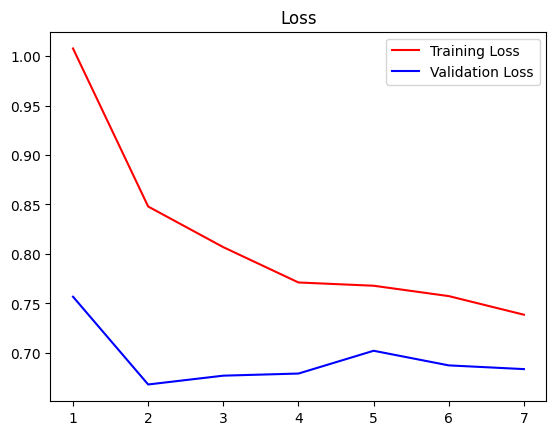

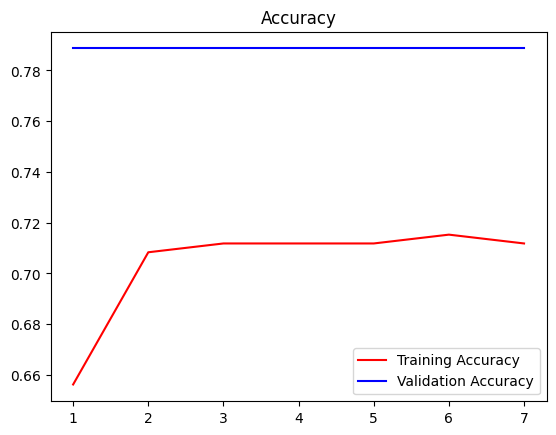

4/4 - 0s - loss: 0.6680 - accuracy: 0.7886 - 360ms/epoch - 90ms/step
Test Accuracy for Bi-LSTM is 78.86%
4/4 [==============================] - 2s 102ms/step
Confusion Matrix
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        97
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         9

    accuracy                           0.79       123
   macro avg       0.26      0.33      0.29       123
weighted avg       0.62      0.79      0.70       123



In [ ]:
#Bi-directional Long-Short Term Memory (Bi-LSTM)

## Creating model
import tensorflow as tf

model_bilstm = Sequential()
model_bilstm.add(embedding_layer_new)
model_bilstm.add(Bidirectional(LSTM(64)))
model_bilstm.add(Dropout(0.3))
model_bilstm.add(Dense(5, activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = tf.keras.optimizers.legacy.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_bilstm.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model_bilstm.summary())

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_bilstm = model_bilstm.fit(X_trainToken, np.array(y_trainToken_cat), batch_size=16, epochs=100, validation_data=(X_testToken, np.array(y_testToken_cat)), verbose=2, callbacks=[early_stopping])
plot_model(model_bilstm, to_file='bi_lstm_model.png', show_shapes=True, show_layer_names=True)
plotLossChart(history_bilstm)
plotAccuracyChart(history_bilstm)


accuracy_bilstm = round(getAccuracy(model_bilstm, X_testToken, np.array(y_testToken_cat)), 2)
print('Test Accuracy for Bi-LSTM is {}%'.format(accuracy_bilstm))
predBilstm = model_bilstm.predict(X_testToken)
y_predBilstm_class = convertIntToCategoriesList(convertPredictProbaToActualPrediction(predBilstm))
con_matrix(y_testToken_class, y_predBilstm_class)

mat = classification_report(y_testToken_class, y_predBilstm_class);
print(mat)


### Bidirectional Encoder Representations from Transformers (BERT)

In [12]:
# remove unwanted columns
df_bal = data[['cleaned_text','Accident Level']]
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cleaned_text    418 non-null    object
 1   Accident Level  418 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 26.0+ KB


In [13]:
df_bal['Accident Level'].value_counts()

1    309
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64

In [14]:
def convertCategoriesToIntforDf(df):
    df['AL_toCategory'] = df['Accident Level'].apply(lambda x: ('1' if x == 1 else ('2' if x == 2 else ('2' if x == 3 else ('3' if x == 4 else '3')))))
    return df

In [15]:
# convert the categories to int
df_bal = convertCategoriesToIntforDf(df_bal)

In [16]:
data_shuffle = df_bal.sample(frac = 1).reset_index(drop=True)

In [17]:
# Train Test spilt with 70:30 ratio
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(data_shuffle['cleaned_text'], data_shuffle['AL_toCategory'], test_size=0.30, random_state=100)

In [ ]:
!pip install -U tensorflow-text==2.9

In [18]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [19]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [20]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [21]:
e = get_sentence_embeding(["banana", "grapes", "mango", "jeff bezos", "elon musk", "bill gates"])

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [23]:
print(X_train_bert.shape)
print(X_test_bert.shape)
print(y_train_bert.shape)
print(y_test_bert.shape)

(292,)
(126,)
(292,)
(126,)


In [24]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
label_encoder = LabelEncoder()
y_train_bert = label_encoder.fit_transform(y_train_bert)
y_test_bert = label_encoder.transform(y_test_bert)


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
num_classes = len(label_encoder.classes_)
l = tf.keras.layers.Dense(num_classes, activation='softmax', name="output")(outputs['pooled_output'])

# Use inputs and outputs to construct a final model
model_bert = tf.keras.Model(inputs=[text_input], outputs=[l])

model_bert.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model_bert.summary())

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [27]:
history_bert = model_bert.fit(
    X_train_bert, y_train_bert,
    batch_size=16, epochs=100,
    validation_data=(X_test_bert, y_test_bert),
    verbose=2, callbacks=[early_stopping]
)

Epoch 1/100
19/19 - 353s - loss: 0.9151 - accuracy: 0.6575 - val_loss: 0.7981 - val_accuracy: 0.7302 - 353s/epoch - 19s/step
Epoch 2/100
19/19 - 225s - loss: 0.7396 - accuracy: 0.7432 - val_loss: 0.7674 - val_accuracy: 0.7302 - 225s/epoch - 12s/step
Epoch 3/100
19/19 - 220s - loss: 0.7343 - accuracy: 0.7432 - val_loss: 0.7674 - val_accuracy: 0.7302 - 220s/epoch - 12s/step
Epoch 4/100
19/19 - 217s - loss: 0.7122 - accuracy: 0.7432 - val_loss: 0.7640 - val_accuracy: 0.7302 - 217s/epoch - 11s/step
Epoch 5/100
19/19 - 222s - loss: 0.7158 - accuracy: 0.7432 - val_loss: 0.7554 - val_accuracy: 0.7302 - 222s/epoch - 12s/step
Epoch 6/100
19/19 - 219s - loss: 0.7069 - accuracy: 0.7432 - val_loss: 0.7790 - val_accuracy: 0.7302 - 219s/epoch - 12s/step
Epoch 7/100
19/19 - 227s - loss: 0.7179 - accuracy: 0.7432 - val_loss: 0.7575 - val_accuracy: 0.7302 - 227s/epoch - 12s/step
Epoch 8/100
19/19 - 220s - loss: 0.7102 - accuracy: 0.7432 - val_loss: 0.7585 - val_accuracy: 0.7302 - 220s/epoch - 12s/step


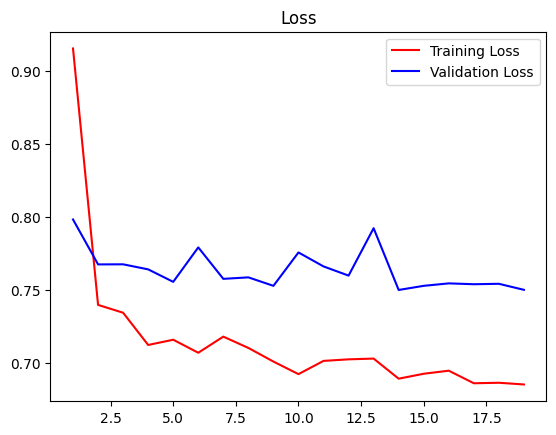

In [30]:
plotLossChart(history_bert)

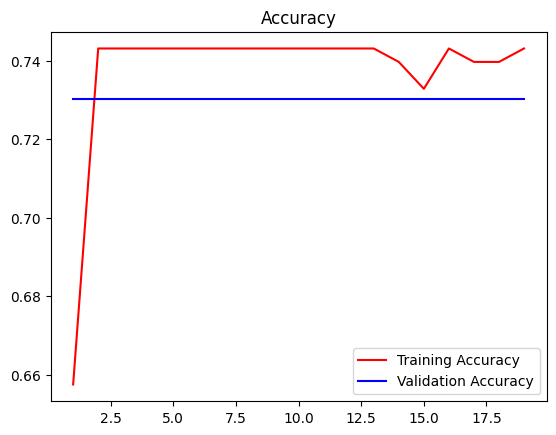

In [31]:
plotAccuracyChart(history_bert)

In [32]:
accuracy_bert = round(getAccuracy(model_bert, X_test_bert, y_test_bert), 2)
print('Test Accuracy for BERT is {}%'.format(accuracy_bert))

4/4 - 99s - loss: 0.7499 - accuracy: 0.7302 - 99s/epoch - 25s/step
Test Accuracy for BERT is 73.02%


In [33]:
y_pred_bert = model_bert.predict(X_test_bert)

4/4 [==============================] - 70s 17s/step


In [34]:
y_testBert_Class = convertIntToCategoriesList(y_test_bert)
y_predBert_Class = convertIntToCategoriesList(convertPredictProbaToActualPrediction(y_pred_bert))

In [37]:
mat = classification_report(y_testBert_Class, y_predBert_Class);
print(mat)

              precision    recall  f1-score   support

           1       0.73      1.00      0.84        92
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        12

    accuracy                           0.73       126
   macro avg       0.24      0.33      0.28       126
weighted avg       0.53      0.73      0.62       126



## Trying training with Transformers

In [ ]:
!pip install transformers
!pip install evaluate
!pip install datasets
!pip install torch
!pip install accelerate -U


In [31]:
from transformers import DataCollatorWithPadding
from transformers import TrainingArguments, Trainer
from datasets import Dataset
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from sklearn import preprocessing
from sklearn.metrics import classification_report
import evaluate
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_path = "Data Set - industrial_safety_and_health_database_with_accidents_description.csv" #@param {type:"string"}
text_column_name = "Description"
label_column_name = "Accident Level"

model_name = "distilbert-base-uncased"
test_size = 0.3
num_labels = 3

In [5]:
hugging_face_Df = pd.read_csv(data_path)

In [6]:
hugging_face_Df['Accident Level'].value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

In [7]:
hugging_face_copy = hugging_face_Df.copy()

In [8]:
hugging_face_copy['Accident Level'].replace('III', 'II', inplace=True)
hugging_face_copy['Accident Level'].replace('IV', 'III', inplace=True)
hugging_face_copy['Accident Level'].replace('V', 'III', inplace=True)

In [9]:
hugging_face_copy['Accident Level'].value_counts()

I      316
II      71
III     38
Name: Accident Level, dtype: int64

In [10]:
le = preprocessing.LabelEncoder()
le.fit(hugging_face_copy[label_column_name].tolist())
hugging_face_copy['label'] = le.transform(hugging_face_copy[label_column_name].tolist())

In [13]:
df_train,df_test = train_test_split(hugging_face_copy,test_size=test_size)

In [14]:
train_dataset = Dataset.from_pandas(df_train)
test_dataset = Dataset.from_pandas(df_test)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def preprocess_function(examples):
    return tokenizer(examples["Description"], truncation=True)
tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/297 [00:00<?, ? examples/s]

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

In [20]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir="results",
    learning_rate=2e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy = "epoch",
    logging_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
    
)
history = trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.739200,0.818808,0.703125
2,0.680300,0.844186,0.703125
3,0.529000,1.097746,0.703125
4,0.280300,1.189497,0.695312
5,0.326000,1.275225,0.710938


In [25]:
preds = trainer.predict(tokenized_train)
preds = np.argmax(preds[:3][0],axis=1)
GT = df_train['label'].tolist()
print(classification_report(GT,preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       226
           1       0.62      0.79      0.70        48
           2       1.00      0.04      0.08        23

    accuracy                           0.89       297
   macro avg       0.86      0.61      0.59       297
weighted avg       0.91      0.89      0.86       297



In [32]:
preds = trainer.predict(tokenized_test)
preds = np.argmax(preds[:3][0],axis=1) #preds[:3][1]
GT = df_test['label'].tolist()
print(classification_report(GT,preds))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        90
           1       0.20      0.04      0.07        23
           2       0.00      0.00      0.00        15

    accuracy                           0.71       128
   macro avg       0.31      0.35      0.31       128
weighted avg       0.55      0.71      0.61       128



In [35]:
trainer.save_model('risk_classification_model')

### Observations

<ul>
    <li>Target variables is regrouped into 3 classes.
</li><li>Model able to predict only two classes due to imbalanced data third class not get predicted.
</li><li>Accuracy, Recall and Precision is good for transformers but it is only for class I.
</li></ul>

## Neural Network Conclusion and Observation:

<ul><li>Except Level 1, Data volume is low for rest of other accident level to predict all class
</li><li>Target variables is regrouped into 3 classes.
</li><li>Accuracy, Recall and Precision is low for most of the models
</li><li>Only Simple RNN predicts all 3 class with considerable recall and precision
</li><li>Resampling techniques: Oversampling minority class
</li><li>Comparatively ML classifier and Deep learning models, Bidirectional LSTM perform better with Glove vectorization and padding for first class of 76% precision (True Negative) and 84% Recall (True positive) compared to RNN, Simple LSTM and ML Classifier. 
</li><li>Bidirectional LSTM and transformer model can be considered to production ready model and predict the accident level.
</ul>